# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 01:12:00.227062: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T01:12:03.799489
2025-04-15 01:12:03.799489


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 01:11:57"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

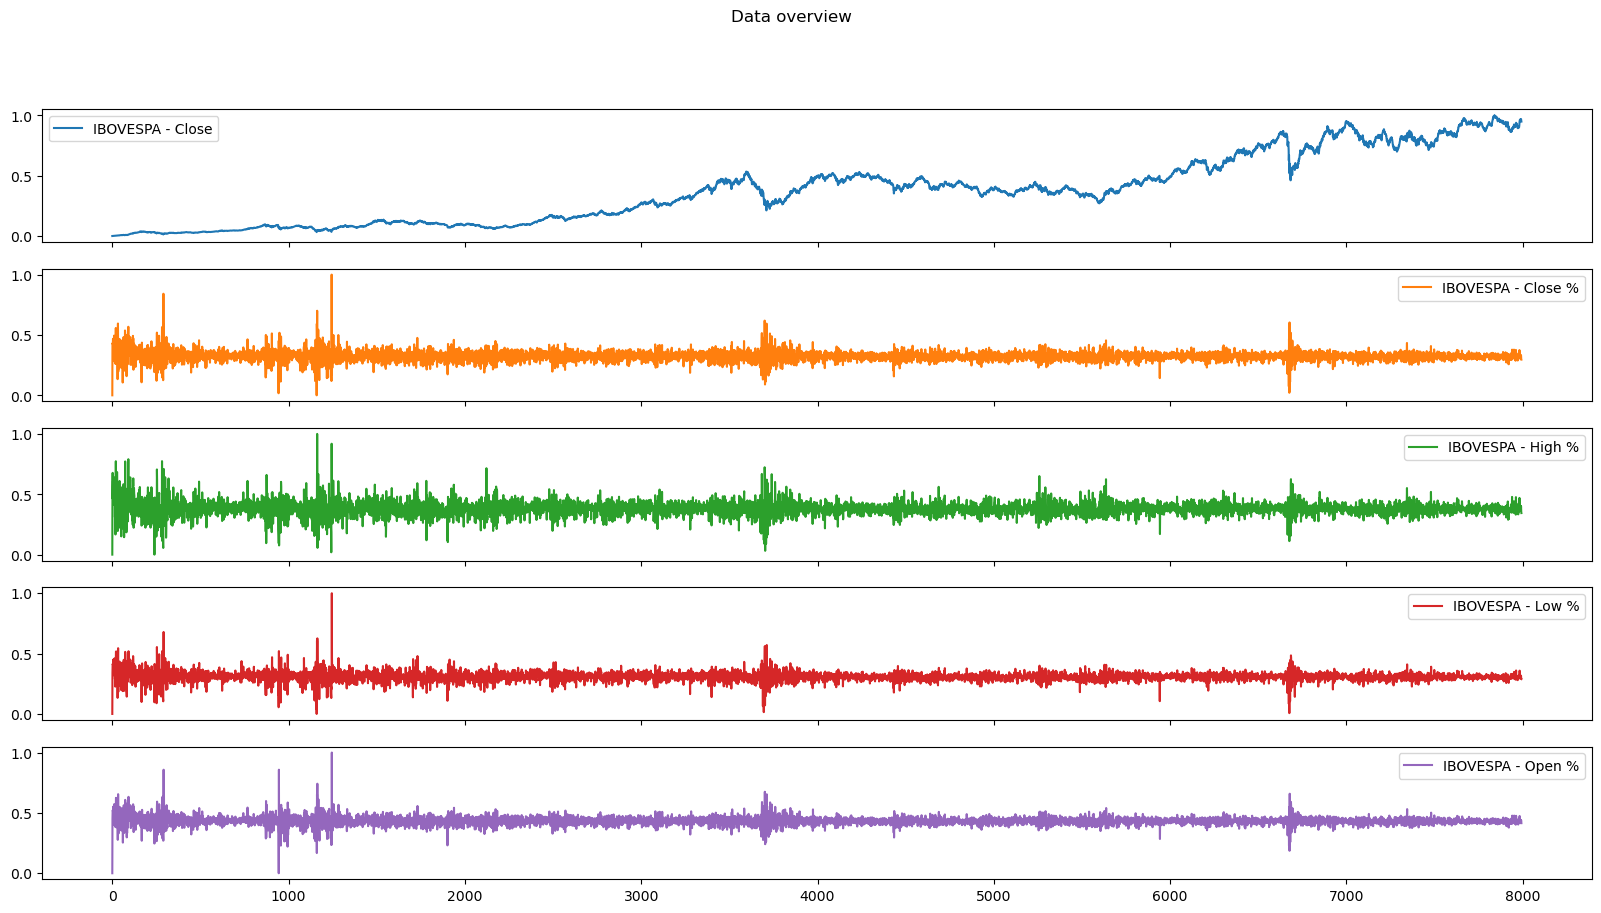

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

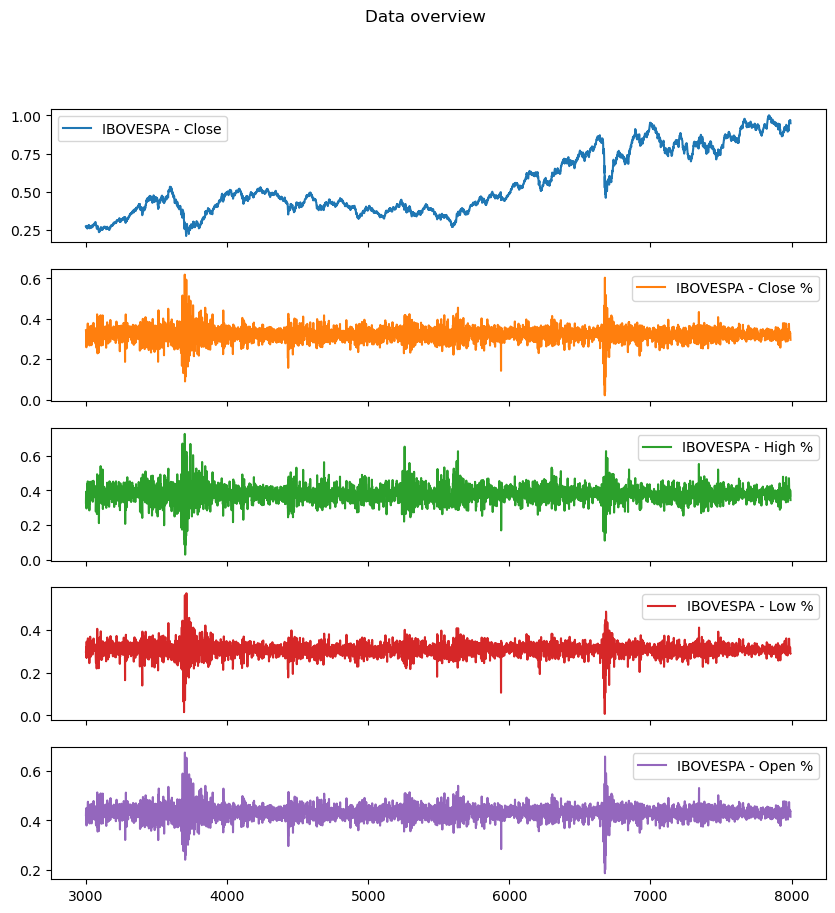

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

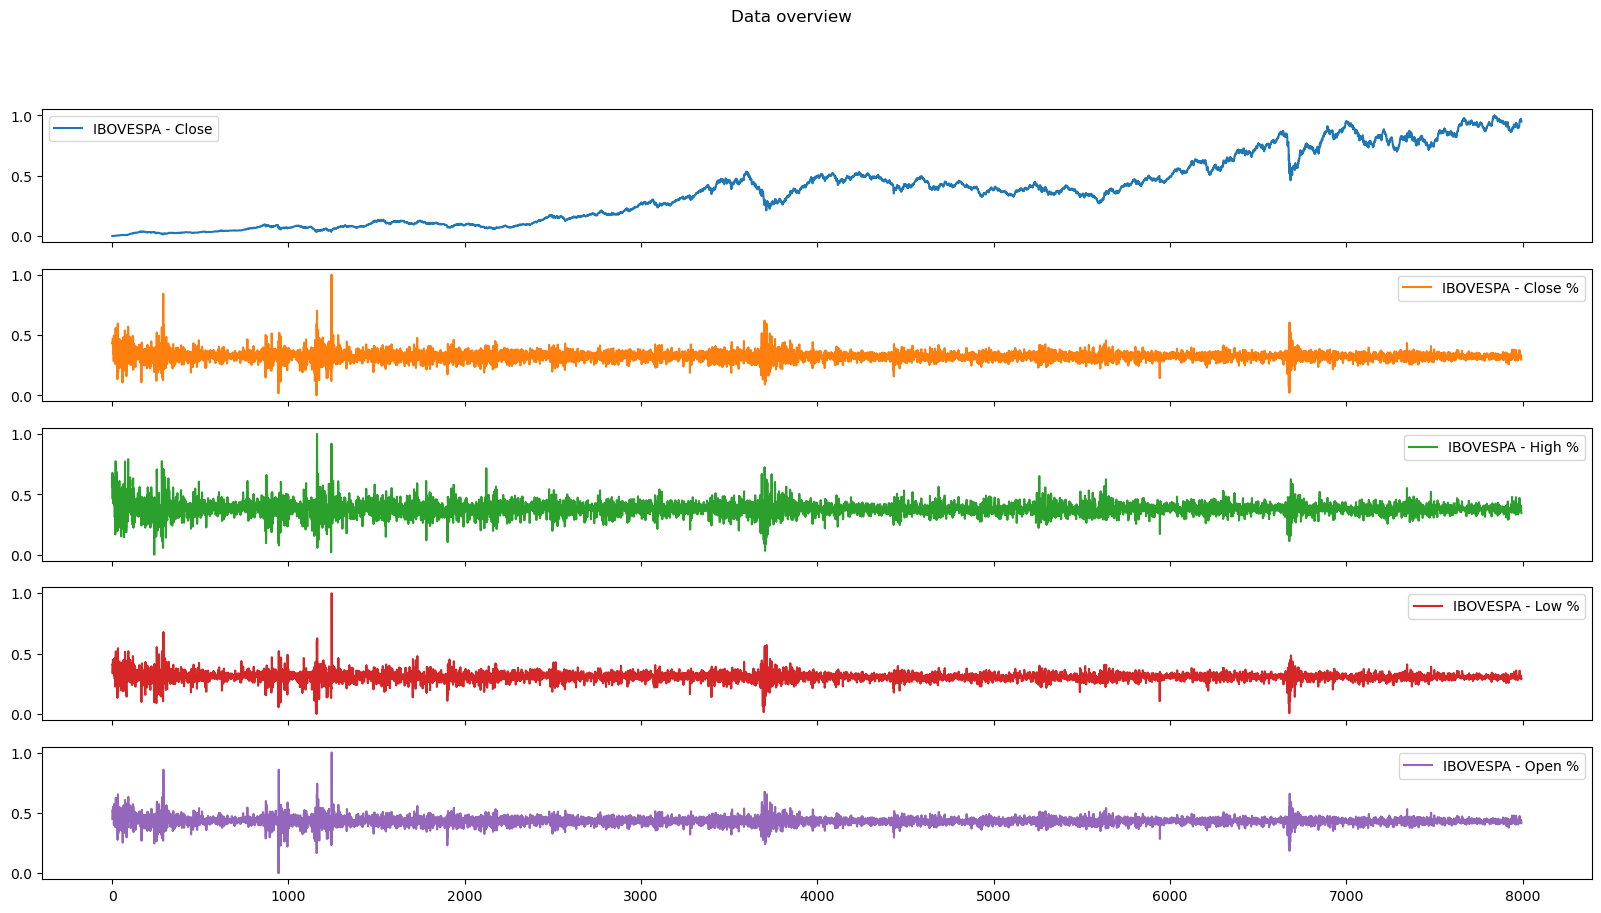

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

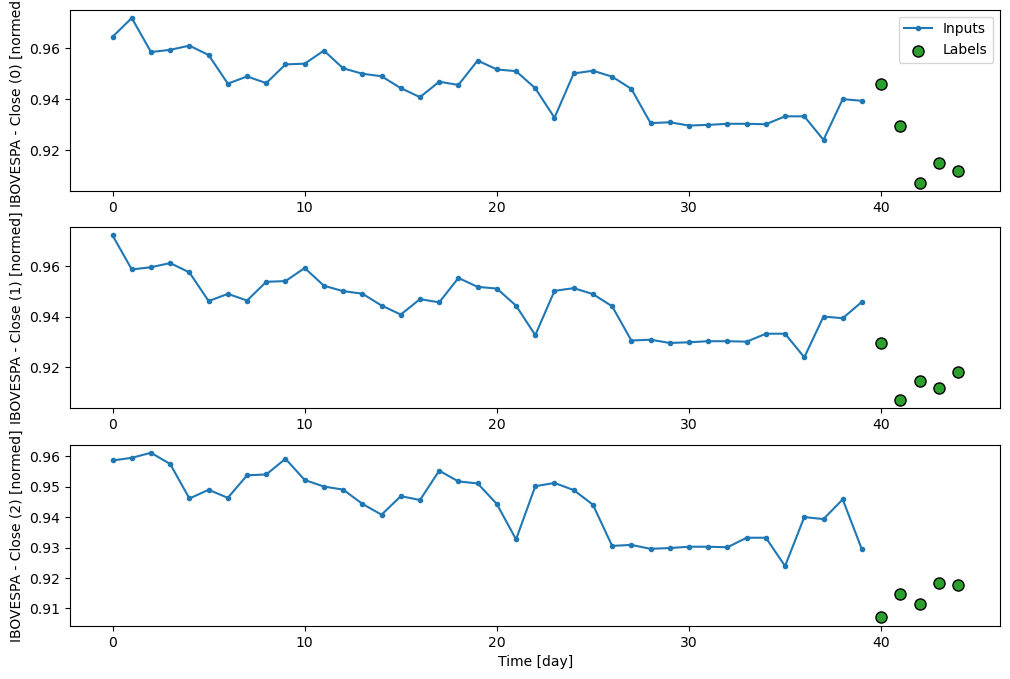

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10:50 3s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 165.1198 - mean_squared_error: 5.0705e-04 - root_mean_squared_error: 0.0205 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 146.3796 - mean_squared_error: 4.7972e-04 - root_mean_squared_error: 0.0207

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 129.1674 - mean_squared_error: 4.3180e-04 - root_mean_squared_error: 0.0198

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 115.9131 - mean_squared_error: 3.8978e-04 - root_mean_squared_error: 0.0189

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 105.5328 - mean_squared_error: 3.5516e-04 - root_mean_squared_error: 0.0180

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 97.1555 - mean_squared_error: 3.2657e-04 - root_mean_squared_error: 0.0172 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 90.2954 - mean_squared_error: 3.0281e-04 - root_mean_squared_error: 0.0166

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 87.3054 - mean_squared_error: 2.9241e-04 - root_mean_squared_error: 0.0163

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 84.5518 - mean_squared_error: 2.8281e-04 - root_mean_squared_error: 0.0160

 18/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 81.9934 - mean_squared_error: 2.7389e-04 - root_mean_squared_error: 0.0157

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 77.3970 - mean_squared_error: 2.5789e-04 - root_mean_squared_error: 0.0152

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 73.3804 - mean_squared_error: 2.4392e-04 - root_mean_squared_error: 0.0147

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 69.8788 - mean_squared_error: 2.3202e-04 - root_mean_squared_error: 0.0143

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 66.7898 - mean_squared_error: 2.2184e-04 - root_mean_squared_error: 0.0140

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 64.0349 - mean_squared_error: 2.1302e-04 - root_mean_squared_error: 0.0137

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 61.5653 - mean_squared_error: 2.0527e-04 - root_mean_squared_error: 0.0135

 32/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 59.3536 - mean_squared_error: 1.9877e-04 - root_mean_squared_error: 0.0132

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 57.3571 - mean_squared_error: 1.9323e-04 - root_mean_squared_error: 0.0131

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 55.6379 - mean_squared_error: 1.8971e-04 - root_mean_squared_error: 0.0130

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 54.1001 - mean_squared_error: 1.8691e-04 - root_mean_squared_error: 0.0129

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 52.7303 - mean_squared_error: 1.8570e-04 - root_mean_squared_error: 0.0129

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 51.5246 - mean_squared_error: 1.8687e-04 - root_mean_squared_error: 0.0130

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 50.4067 - mean_squared_error: 1.8799e-04 - root_mean_squared_error: 0.0130

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 49.3450 - mean_squared_error: 1.8871e-04 - root_mean_squared_error: 0.0131

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 48.3569 - mean_squared_error: 1.9019e-04 - root_mean_squared_error: 0.0132

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 47.4460 - mean_squared_error: 1.9278e-04 - root_mean_squared_error: 0.0133

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 46.6071 - mean_squared_error: 1.9661e-04 - root_mean_squared_error: 0.0134

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 45.8064 - mean_squared_error: 1.9990e-04 - root_mean_squared_error: 0.0136

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 45.0502 - mean_squared_error: 2.0299e-04 - root_mean_squared_error: 0.0137

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.3248 - mean_squared_error: 2.0562e-04 - root_mean_squared_error: 0.0138

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.6337 - mean_squared_error: 2.0789e-04 - root_mean_squared_error: 0.0139

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.9813 - mean_squared_error: 2.1007e-04 - root_mean_squared_error: 0.0140

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.3589 - mean_squared_error: 2.1202e-04 - root_mean_squared_error: 0.0140

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.7822 - mean_squared_error: 2.1420e-04 - root_mean_squared_error: 0.0141

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.2559 - mean_squared_error: 2.1675e-04 - root_mean_squared_error: 0.0142

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.7488 - mean_squared_error: 2.1900e-04 - root_mean_squared_error: 0.0143

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.2659 - mean_squared_error: 2.2117e-04 - root_mean_squared_error: 0.0144

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.8153 - mean_squared_error: 2.2380e-04 - root_mean_squared_error: 0.0145

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.4015 - mean_squared_error: 2.2828e-04 - root_mean_squared_error: 0.0146

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.0223 - mean_squared_error: 2.3561e-04 - root_mean_squared_error: 0.0148

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 38.6612 - mean_squared_error: 2.4334e-04 - root_mean_squared_error: 0.0150

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 38.3084 - mean_squared_error: 2.5051e-04 - root_mean_squared_error: 0.0152

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 37.9623 - mean_squared_error: 2.5711e-04 - root_mean_squared_error: 0.0154

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 37.6219 - mean_squared_error: 2.6320e-04 - root_mean_squared_error: 0.0156

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 37.2928 - mean_squared_error: 2.6920e-04 - root_mean_squared_error: 0.0158

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 36.9731 - mean_squared_error: 2.7503e-04 - root_mean_squared_error: 0.0159

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 36.6637 - mean_squared_error: 2.8100e-04 - root_mean_squared_error: 0.0161

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 36.3681 - mean_squared_error: 2.8839e-04 - root_mean_squared_error: 0.0163

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 36.0818 - mean_squared_error: 2.9626e-04 - root_mean_squared_error: 0.0165

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 35.8011 - mean_squared_error: 3.0377e-04 - root_mean_squared_error: 0.0167

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 35.5253 - mean_squared_error: 3.1092e-04 - root_mean_squared_error: 0.0169

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 35.2550 - mean_squared_error: 3.1785e-04 - root_mean_squared_error: 0.0170

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 34.9887 - mean_squared_error: 3.2441e-04 - root_mean_squared_error: 0.0172

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 34.7281 - mean_squared_error: 3.3114e-04 - root_mean_squared_error: 0.0174

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 34.4720 - mean_squared_error: 3.3775e-04 - root_mean_squared_error: 0.0175

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 34.2203 - mean_squared_error: 3.4419e-04 - root_mean_squared_error: 0.0177

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 33.9729 - mean_squared_error: 3.5064e-04 - root_mean_squared_error: 0.0178

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 33.7326 - mean_squared_error: 3.5812e-04 - root_mean_squared_error: 0.0180

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 33.5104 - mean_squared_error: 3.7207e-04 - root_mean_squared_error: 0.0183

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 33.2998 - mean_squared_error: 3.8831e-04 - root_mean_squared_error: 0.0186

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 33.0947 - mean_squared_error: 4.0466e-04 - root_mean_squared_error: 0.0189

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 32.8990 - mean_squared_error: 4.2422e-04 - root_mean_squared_error: 0.0193

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 32.7151 - mean_squared_error: 4.5279e-04 - root_mean_squared_error: 0.0197

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 32.5429 - mean_squared_error: 4.9211e-04 - root_mean_squared_error: 0.0202

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 32.3804 - mean_squared_error: 5.3882e-04 - root_mean_squared_error: 0.0209

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 32.2244 - mean_squared_error: 5.8759e-04 - root_mean_squared_error: 0.0215

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 32.0717 - mean_squared_error: 6.3593e-04 - root_mean_squared_error: 0.0221

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 31.9236 - mean_squared_error: 6.8548e-04 - root_mean_squared_error: 0.0227

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 31.7793 - mean_squared_error: 7.3485e-04 - root_mean_squared_error: 0.0233

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 31.6368 - mean_squared_error: 7.8241e-04 - root_mean_squared_error: 0.0239

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 31.4952 - mean_squared_error: 8.2802e-04 - root_mean_squared_error: 0.0244

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 31.3561 - mean_squared_error: 8.7248e-04 - root_mean_squared_error: 0.0250

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 31.2203 - mean_squared_error: 9.1663e-04 - root_mean_squared_error: 0.0255

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 31.0852 - mean_squared_error: 9.5896e-04 - root_mean_squared_error: 0.0260

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 30.9505 - mean_squared_error: 9.9950e-04 - root_mean_squared_error: 0.0265

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 30.8170 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0270    

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 30.6855 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0275

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 30.5572 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 30.4297 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0284

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 30.3025 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0288

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 30.1761 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0292

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 30.0520 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0296

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 29.9305 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0300

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 29.8099 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0304

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 29.6898 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 29.5705 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0311

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 29.4534 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 29.3395 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0318

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 29.2278 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0321

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 29.1169 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0324

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 29.0081 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0327

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 28.9019 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0331

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 28.7982 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 28.6964 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0337

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 28.5964 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 28.4979 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0343

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 28.4005 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 28.3042 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0349

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 28.2099 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0352

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 28.1167 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 28.0239 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 27.9317 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0360

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 27.8399 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0363

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 27.7485 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0365

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 27.6586 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 27.5731 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0371

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 27.4894 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0374

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 27.4065 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0378

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 27.3248 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 27.2446 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 27.1657 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 27.0871 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0391

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 27.0088 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0394

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 26.9309 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0397

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 26.8535 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0400

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 26.7764 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0403

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 26.6995 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0406

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 26.6229 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0409

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 26.5469 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0411

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 26.4720 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0414 - val_loss: 0.1142 - val_mean_absolute_error: 0.1142 - val_mean_absolute_percentage_error: 12.1375 - val_mean_squared_error: 0.0138 - val_root_mean_squared_error: 0.1175 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.7246 - mean_absolute_error: 0.7246 - mean_absolute_percentage_error: 9623.7158 - mean_squared_error: 0.5252 - root_mean_squared_error: 0.7247

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7258 - mean_absolute_error: 0.7258 - mean_absolute_percentage_error: 8041.9790 - mean_squared_error: 0.5268 - root_mean_squared_error: 0.7258 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7214 - mean_absolute_error: 0.7214 - mean_absolute_percentage_error: 6830.6201 - mean_squared_error: 0.5207 - root_mean_squared_error: 0.7215

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7146 - mean_absolute_error: 0.7146 - mean_absolute_percentage_error: 6054.4233 - mean_squared_error: 0.5112 - root_mean_squared_error: 0.7149

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7058 - mean_absolute_error: 0.7058 - mean_absolute_percentage_error: 5553.7402 - mean_squared_error: 0.4994 - root_mean_squared_error: 0.7065

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7006 - mean_absolute_error: 0.7006 - mean_absolute_percentage_error: 5354.7632 - mean_squared_error: 0.4928 - root_mean_squared_error: 0.7016

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6884 - mean_absolute_error: 0.6884 - mean_absolute_percentage_error: 5015.3535 - mean_squared_error: 0.4777 - root_mean_squared_error: 0.6904

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6772 - mean_absolute_error: 0.6772 - mean_absolute_percentage_error: 4740.5161 - mean_squared_error: 0.4668 - root_mean_squared_error: 0.6822

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6670 - mean_absolute_error: 0.6670 - mean_absolute_percentage_error: 4511.5063 - mean_squared_error: 0.4587 - root_mean_squared_error: 0.6761

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6527 - mean_absolute_error: 0.6527 - mean_absolute_percentage_error: 4299.9312 - mean_squared_error: 0.4474 - root_mean_squared_error: 0.6674

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6364 - mean_absolute_error: 0.6364 - mean_absolute_percentage_error: 4105.4561 - mean_squared_error: 0.4348 - root_mean_squared_error: 0.6574

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6195 - mean_absolute_error: 0.6195 - mean_absolute_percentage_error: 3927.5342 - mean_squared_error: 0.4218 - root_mean_squared_error: 0.6467

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6026 - mean_absolute_error: 0.6026 - mean_absolute_percentage_error: 3764.8533 - mean_squared_error: 0.4090 - root_mean_squared_error: 0.6359

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5860 - mean_absolute_error: 0.5860 - mean_absolute_percentage_error: 3615.5535 - mean_squared_error: 0.3965 - root_mean_squared_error: 0.6252

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5700 - mean_absolute_error: 0.5700 - mean_absolute_percentage_error: 3478.3508 - mean_squared_error: 0.3845 - root_mean_squared_error: 0.6147

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5546 - mean_absolute_error: 0.5546 - mean_absolute_percentage_error: 3351.9631 - mean_squared_error: 0.3731 - root_mean_squared_error: 0.6045

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5400 - mean_absolute_error: 0.5400 - mean_absolute_percentage_error: 3235.2778 - mean_squared_error: 0.3623 - root_mean_squared_error: 0.5947

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5260 - mean_absolute_error: 0.5260 - mean_absolute_percentage_error: 3127.2061 - mean_squared_error: 0.3520 - root_mean_squared_error: 0.5852

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5127 - mean_absolute_error: 0.5127 - mean_absolute_percentage_error: 3026.9885 - mean_squared_error: 0.3423 - root_mean_squared_error: 0.5761

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5001 - mean_absolute_error: 0.5001 - mean_absolute_percentage_error: 2933.7761 - mean_squared_error: 0.3332 - root_mean_squared_error: 0.5674

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4882 - mean_absolute_error: 0.4882 - mean_absolute_percentage_error: 2846.8499 - mean_squared_error: 0.3245 - root_mean_squared_error: 0.5590

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4769 - mean_absolute_error: 0.4769 - mean_absolute_percentage_error: 2765.5889 - mean_squared_error: 0.3163 - root_mean_squared_error: 0.5509

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4662 - mean_absolute_error: 0.4662 - mean_absolute_percentage_error: 2689.3816 - mean_squared_error: 0.3085 - root_mean_squared_error: 0.5432

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4559 - mean_absolute_error: 0.4559 - mean_absolute_percentage_error: 2617.7505 - mean_squared_error: 0.3011 - root_mean_squared_error: 0.5358

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4462 - mean_absolute_error: 0.4462 - mean_absolute_percentage_error: 2550.2800 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5287

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4368 - mean_absolute_error: 0.4368 - mean_absolute_percentage_error: 2486.6145 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5218

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 2426.4243 - mean_squared_error: 0.2811 - root_mean_squared_error: 0.5152

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4194 - mean_absolute_error: 0.4194 - mean_absolute_percentage_error: 2369.4292 - mean_squared_error: 0.2751 - root_mean_squared_error: 0.5089

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4113 - mean_absolute_error: 0.4113 - mean_absolute_percentage_error: 2315.3765 - mean_squared_error: 0.2693 - root_mean_squared_error: 0.5027

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4034 - mean_absolute_error: 0.4034 - mean_absolute_percentage_error: 2264.0371 - mean_squared_error: 0.2638 - root_mean_squared_error: 0.4968

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3960 - mean_absolute_error: 0.3960 - mean_absolute_percentage_error: 2215.2119 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4911

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3888 - mean_absolute_error: 0.3888 - mean_absolute_percentage_error: 2168.7324 - mean_squared_error: 0.2535 - root_mean_squared_error: 0.4856

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3820 - mean_absolute_error: 0.3820 - mean_absolute_percentage_error: 2124.4172 - mean_squared_error: 0.2487 - root_mean_squared_error: 0.4803

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 2082.1340 - mean_squared_error: 0.2441 - root_mean_squared_error: 0.4752

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3691 - mean_absolute_error: 0.3691 - mean_absolute_percentage_error: 2041.7478 - mean_squared_error: 0.2397 - root_mean_squared_error: 0.4702

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3630 - mean_absolute_error: 0.3630 - mean_absolute_percentage_error: 2003.1042 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4654

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3572 - mean_absolute_error: 0.3572 - mean_absolute_percentage_error: 1966.0984 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4607

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3516 - mean_absolute_error: 0.3516 - mean_absolute_percentage_error: 1930.6135 - mean_squared_error: 0.2274 - root_mean_squared_error: 0.4562

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3489 - mean_absolute_error: 0.3489 - mean_absolute_percentage_error: 1913.4077 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4540

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3436 - mean_absolute_error: 0.3436 - mean_absolute_percentage_error: 1880.0140 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4497

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 1847.9135 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4455

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1817.0326 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4414

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 1787.2976 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4374

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1758.6475 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4336

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1731.0184 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4298

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - mean_absolute_percentage_error: 1704.3531 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4262

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 1678.5986 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4226

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3071 - mean_absolute_error: 0.3071 - mean_absolute_percentage_error: 1653.7086 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4192

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1629.6394 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4158

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1606.3490 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4125

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1583.7997 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4093

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1561.9520 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4062

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1540.7732 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.4031

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1520.2336 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.4001

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1500.3030 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3972

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 1480.9525 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3944

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1462.1561 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3916

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1443.8901 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3889

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1426.1415 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3862

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 1408.8972 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3837

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1392.1277 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3812

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1375.8026 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3787

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1359.9052 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3763

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1344.4216 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3740

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1329.3361 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3717

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1314.6311 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3695

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1300.2914 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3673

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 1286.3021 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3651

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 1272.6476 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3630

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1259.3157 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3610

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1246.2985 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3590

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1233.5845 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3570

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1221.1603 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3550

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1209.0162 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3531

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1197.1416 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3513

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1185.5258 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3494

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1174.1602 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3476

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1163.0366 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3458

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1152.1470 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3441

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1141.4836 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3424

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1131.0391 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3407

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1120.8066 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3390

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 1110.7803 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3373

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1100.9530 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3357

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1091.3191 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3341

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1081.8721 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3325

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1072.6067 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3310

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1063.5182 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3295

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1054.6019 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3280

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1045.8522 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3265

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1037.2648 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3250

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 1028.8361 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3236

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1020.5616 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3222

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 1012.4368 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3208

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 1004.4570 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3194

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 996.6185 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3181 

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 988.9171 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3167

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 981.3491 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3154

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 973.9094 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3141

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 966.5947 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3129

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 959.4018 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3116

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 952.3275 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3104

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 945.3685 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3091

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 938.5220 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3079

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 931.7855 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3067

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 925.1583 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.3055

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 918.6369 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.3044

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 912.2180 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.3033

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 905.8988 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3021

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 899.6771 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3010

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 893.5508 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.2999

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1871 - mean_absolute_error: 0.1871 - mean_absolute_percentage_error: 887.5172 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.2988

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 881.5740 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.2978

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 875.7191 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.2967

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 869.9505 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.2957

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 864.2662 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2946

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 858.6641 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2936

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 853.1423 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.2926

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 847.6993 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2916

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 842.3363 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.2906

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 839.6882 - mean_squared_error: 0.1033 - root_mean_squared_error: 0.2901 - val_loss: 0.0781 - val_mean_absolute_error: 0.0781 - val_mean_absolute_percentage_error: 8.2903 - val_mean_squared_error: 0.0067 - val_root_mean_squared_error: 0.0818 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.6435 - mean_absolute_error: 0.6435 - mean_absolute_percentage_error: 8546.7949 - mean_squared_error: 0.4142 - root_mean_squared_error: 0.6435

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6431 - mean_absolute_error: 0.6431 - mean_absolute_percentage_error: 7133.4043 - mean_squared_error: 0.4137 - root_mean_squared_error: 0.6432 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6400 - mean_absolute_error: 0.6400 - mean_absolute_percentage_error: 6060.1816 - mean_squared_error: 0.4098 - root_mean_squared_error: 0.6401

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6360 - mean_absolute_error: 0.6360 - mean_absolute_percentage_error: 5377.9121 - mean_squared_error: 0.4047 - root_mean_squared_error: 0.6361

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6310 - mean_absolute_error: 0.6310 - mean_absolute_percentage_error: 4946.0146 - mean_squared_error: 0.3987 - root_mean_squared_error: 0.6313

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6250 - mean_absolute_error: 0.6250 - mean_absolute_percentage_error: 4627.2891 - mean_squared_error: 0.3915 - root_mean_squared_error: 0.6255

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6177 - mean_absolute_error: 0.6177 - mean_absolute_percentage_error: 4368.7900 - mean_squared_error: 0.3831 - root_mean_squared_error: 0.6186

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6093 - mean_absolute_error: 0.6093 - mean_absolute_percentage_error: 4150.8730 - mean_squared_error: 0.3739 - root_mean_squared_error: 0.6108

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5998 - mean_absolute_error: 0.5998 - mean_absolute_percentage_error: 3959.5037 - mean_squared_error: 0.3641 - root_mean_squared_error: 0.6023

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5892 - mean_absolute_error: 0.5892 - mean_absolute_percentage_error: 3787.2295 - mean_squared_error: 0.3538 - root_mean_squared_error: 0.5932

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5775 - mean_absolute_error: 0.5775 - mean_absolute_percentage_error: 3629.5100 - mean_squared_error: 0.3432 - root_mean_squared_error: 0.5837

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5646 - mean_absolute_error: 0.5646 - mean_absolute_percentage_error: 3483.6147 - mean_squared_error: 0.3326 - root_mean_squared_error: 0.5738

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5520 - mean_absolute_error: 0.5520 - mean_absolute_percentage_error: 3349.8462 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5642

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5399 - mean_absolute_error: 0.5399 - mean_absolute_percentage_error: 3226.8069 - mean_squared_error: 0.3128 - root_mean_squared_error: 0.5549

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5279 - mean_absolute_error: 0.5279 - mean_absolute_percentage_error: 3112.9827 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5457

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5160 - mean_absolute_error: 0.5160 - mean_absolute_percentage_error: 3007.3274 - mean_squared_error: 0.2947 - root_mean_squared_error: 0.5369

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5044 - mean_absolute_error: 0.5044 - mean_absolute_percentage_error: 2909.1609 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5284

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4932 - mean_absolute_error: 0.4932 - mean_absolute_percentage_error: 2817.8152 - mean_squared_error: 0.2785 - root_mean_squared_error: 0.5202

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4823 - mean_absolute_error: 0.4823 - mean_absolute_percentage_error: 2732.6382 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.5123

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4719 - mean_absolute_error: 0.4719 - mean_absolute_percentage_error: 2653.0232 - mean_squared_error: 0.2639 - root_mean_squared_error: 0.5047

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4620 - mean_absolute_error: 0.4620 - mean_absolute_percentage_error: 2578.4729 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.4974

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4524 - mean_absolute_error: 0.4524 - mean_absolute_percentage_error: 2508.4736 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4904

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4432 - mean_absolute_error: 0.4432 - mean_absolute_percentage_error: 2442.5742 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4837

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4343 - mean_absolute_error: 0.4343 - mean_absolute_percentage_error: 2380.4199 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4772

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - mean_absolute_percentage_error: 2321.7056 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4176 - mean_absolute_error: 0.4176 - mean_absolute_percentage_error: 2266.1426 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4650

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4098 - mean_absolute_error: 0.4098 - mean_absolute_percentage_error: 2213.4817 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4592

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4022 - mean_absolute_error: 0.4022 - mean_absolute_percentage_error: 2163.4978 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4537

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3949 - mean_absolute_error: 0.3949 - mean_absolute_percentage_error: 2115.9910 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4483

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3879 - mean_absolute_error: 0.3879 - mean_absolute_percentage_error: 2070.7773 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4431

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3812 - mean_absolute_error: 0.3812 - mean_absolute_percentage_error: 2027.6982 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4382

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 1986.6049 - mean_squared_error: 0.2019 - root_mean_squared_error: 0.4333

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3685 - mean_absolute_error: 0.3685 - mean_absolute_percentage_error: 1947.3534 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4287

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3625 - mean_absolute_error: 0.3625 - mean_absolute_percentage_error: 1909.8353 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4241

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 1873.9232 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4198

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 1839.5100 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4155

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3458 - mean_absolute_error: 0.3458 - mean_absolute_percentage_error: 1806.5035 - mean_squared_error: 0.1845 - root_mean_squared_error: 0.4114

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3406 - mean_absolute_error: 0.3406 - mean_absolute_percentage_error: 1774.8081 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.4075

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1744.3418 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.4036

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3308 - mean_absolute_error: 0.3308 - mean_absolute_percentage_error: 1715.0365 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3999

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1686.8287 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3962

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 1659.6488 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3927

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1633.4424 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3892

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1608.1567 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3859

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1583.7380 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3826

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_absolute_percentage_error: 1560.1409 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3794

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1537.3230 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3763

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1515.2454 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3733

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 1493.8730 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3704

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1473.1719 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3675

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2865 - mean_absolute_error: 0.2865 - mean_absolute_percentage_error: 1453.1067 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3647

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1433.6484 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3620

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1414.7708 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3593

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1396.4474 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3567

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1378.6530 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3541

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1361.3621 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3516

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1344.5535 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3492

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1328.2140 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3468

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1312.3323 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3445

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1304.5562 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3434

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 1296.8854 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3423

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1289.3169 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3412

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1274.4766 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3390

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1260.0161 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3369

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1245.9213 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3348

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1232.1779 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3327

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1218.7715 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3307

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1205.6898 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3288

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1192.9197 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3268

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1180.4506 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3249

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1168.2734 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3231

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1156.3784 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3213

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1144.7535 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3195

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1133.3881 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3177

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1122.2733 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3160

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1111.4008 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3143

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1100.7627 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3126

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1090.3507 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3110

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2234 - mean_absolute_error: 0.2234 - mean_absolute_percentage_error: 1080.1581 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3093

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1070.1772 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3078

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2200 - mean_absolute_error: 0.2200 - mean_absolute_percentage_error: 1060.4012 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3062

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1050.8239 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.3047

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1041.4390 - mean_squared_error: 0.1087 - root_mean_squared_error: 0.3031

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1032.2408 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3016

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 1023.2232 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.3002

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 1014.3802 - mean_squared_error: 0.1059 - root_mean_squared_error: 0.2987

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1005.7069 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.2973

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 997.1989 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2959 

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 988.8519 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.2945

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 980.6608 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.2932

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 972.6204 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2918

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 964.7272 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2905

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 956.9772 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2892

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 949.3665 - mean_squared_error: 0.0994 - root_mean_squared_error: 0.2879

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1996 - mean_absolute_error: 0.1996 - mean_absolute_percentage_error: 941.8903 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2867

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 934.5451 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2854

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 927.3270 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2842

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 920.2325 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2830

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 913.2590 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.2818

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 906.4036 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2806

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1923 - mean_absolute_error: 0.1923 - mean_absolute_percentage_error: 899.6625 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2794

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 893.0327 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2783

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 886.5115 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2771

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 880.0961 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2760

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 873.7838 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2749

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 867.5724 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2738

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 861.4614 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2728

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 855.4470 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2717

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 849.5263 - mean_squared_error: 0.0893 - root_mean_squared_error: 0.2707

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1827 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 843.6965 - mean_squared_error: 0.0887 - root_mean_squared_error: 0.2697

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 837.9557 - mean_squared_error: 0.0881 - root_mean_squared_error: 0.2687

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 832.3016 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2677

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 826.7325 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2667

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 821.2462 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2657

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 818.5334 - mean_squared_error: 0.0861 - root_mean_squared_error: 0.2652

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1781 - mean_absolute_error: 0.1781 - mean_absolute_percentage_error: 815.8405 - mean_squared_error: 0.0859 - root_mean_squared_error: 0.2648

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 813.1674 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2643

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 810.5139 - mean_squared_error: 0.0853 - root_mean_squared_error: 0.2638

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 807.8796 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2633

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 805.2645 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2629

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 800.0906 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2619

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1745 - mean_absolute_error: 0.1745 - mean_absolute_percentage_error: 794.9903 - mean_squared_error: 0.0838 - root_mean_squared_error: 0.2610

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 789.9620 - mean_squared_error: 0.0832 - root_mean_squared_error: 0.2601

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 785.0134 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2592 - val_loss: 0.0190 - val_mean_absolute_error: 0.0190 - val_mean_absolute_percentage_error: 2.0040 - val_mean_squared_error: 5.6446e-04 - val_root_mean_squared_error: 0.0238 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.3965 - mean_absolute_error: 0.3965 - mean_absolute_percentage_error: 5267.9395 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3968

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3961 - mean_absolute_error: 0.3961 - mean_absolute_percentage_error: 4394.7725 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3963 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3920 - mean_absolute_error: 0.3920 - mean_absolute_percentage_error: 3726.4456 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3924

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3869 - mean_absolute_error: 0.3869 - mean_absolute_percentage_error: 3297.1243 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3873

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.3806 - mean_absolute_error: 0.3806 - mean_absolute_percentage_error: 3016.7993 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3813

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 2804.1353 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3744

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3638 - mean_absolute_error: 0.3638 - mean_absolute_percentage_error: 2627.2732 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3664

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 2472.8960 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3579

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3415 - mean_absolute_error: 0.3415 - mean_absolute_percentage_error: 2335.8296 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3491

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 2215.9136 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3409

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 2110.0583 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3331

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 2015.0046 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.3257

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1928.7518 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.3187

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1850.3668 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.3121

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1778.9008 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.3059

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1713.4141 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.3000

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1653.0889 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2944

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1597.4266 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2891

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1545.9369 - mean_squared_error: 0.0853 - root_mean_squared_error: 0.2841

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1498.1188 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2793

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1453.5264 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2748

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1411.8322 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2705

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1372.7571 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2664

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 1336.0542 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2625

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1301.5060 - mean_squared_error: 0.0724 - root_mean_squared_error: 0.2587

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1268.9226 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2552

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1238.1334 - mean_squared_error: 0.0690 - root_mean_squared_error: 0.2517

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 1208.9967 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2484

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 1181.3723 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2453

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 1155.1483 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2422

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 1130.2147 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2393

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 1106.4718 - mean_squared_error: 0.0619 - root_mean_squared_error: 0.2365

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 1083.8331 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2337

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 1062.2261 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2311

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1861 - mean_absolute_error: 0.1861 - mean_absolute_percentage_error: 1041.5750 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2286

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 1021.8139 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2261

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1802 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 1002.8821 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2238

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 984.7258 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2215 

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 967.2962 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2193

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 958.8406 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2182

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 942.4232 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2161

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 926.6283 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2140

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 911.4211 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2120

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 896.7665 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2101

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 882.6351 - mean_squared_error: 0.0497 - root_mean_squared_error: 0.2082

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 868.9973 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.2064

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 855.8270 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2046

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1551 - mean_absolute_error: 0.1551 - mean_absolute_percentage_error: 843.0996 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.2029

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1532 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 830.7921 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.2012

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 818.8848 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.1995

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1494 - mean_absolute_error: 0.1494 - mean_absolute_percentage_error: 807.3560 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.1979

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 796.1870 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1964

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 785.3612 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1948

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 774.8619 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1934

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 764.6736 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1919

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 754.7830 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1905

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 745.1761 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1891

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 735.8411 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1878

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 726.7683 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1864

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 717.9442 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1851

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 709.3594 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1839

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 701.0056 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1827

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 692.8732 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1815

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 684.9526 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1803

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 677.2333 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1792

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 669.7072 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1780

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1263 - mean_absolute_error: 0.1263 - mean_absolute_percentage_error: 662.3669 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1769

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 655.2055 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1759

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 648.2157 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1748

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 641.3911 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1738

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 634.7259 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1728

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 628.2153 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1718

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 621.8538 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1708

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 615.6351 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1698

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 609.5541 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1689

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 603.6062 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1679

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 597.7874 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1670

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 592.0938 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1661

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 586.5204 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1653

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 581.0633 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1644

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 575.7187 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1636

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 570.4837 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1627

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 565.3547 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1619

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 560.3281 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1611

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 555.4007 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1603

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 550.5693 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1595

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 545.8314 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1587

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 541.1841 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1580

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 536.6250 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1572

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 532.1522 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1565

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 527.7635 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1558

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 523.4565 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1551

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 519.2286 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1544

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 515.0768 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1537

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 510.9987 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1530

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 506.9922 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1523

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 503.0551 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1517

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 499.1862 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1510

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 497.2768 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1507

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 495.3837 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1504

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 491.6455 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1498

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 487.9700 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1491

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 484.3557 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1485

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 480.8009 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1479

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 479.0453 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1476

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 475.5765 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1471

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 472.1651 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1465

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 468.8091 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1459

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 465.5066 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1454

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 462.2558 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1448

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 459.0555 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1443

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 455.9047 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1438

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 452.8018 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1433

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 449.7461 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1427

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 446.7361 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1422

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 443.7708 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1417

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 440.8492 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1412

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 437.9705 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1408

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 435.1333 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1403

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 432.3369 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1398

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 429.5817 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1393

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 428.2213 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1391 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 1.3754 - val_mean_squared_error: 2.7538e-04 - val_root_mean_squared_error: 0.0166 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.2918 - mean_absolute_error: 0.2918 - mean_absolute_percentage_error: 3875.1829 - mean_squared_error: 0.0853 - root_mean_squared_error: 0.2920

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 3223.2393 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2903 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 2726.5457 - mean_squared_error: 0.0817 - root_mean_squared_error: 0.2857

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 2404.8342 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2802

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 2188.9973 - mean_squared_error: 0.0752 - root_mean_squared_error: 0.2738

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 2021.3634 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2666

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1879.2783 - mean_squared_error: 0.0677 - root_mean_squared_error: 0.2588

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1757.5060 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2512

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1654.7899 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2442

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1566.6404 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2380

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1489.0275 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2321

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 1419.3774 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2266

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 1356.7725 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2215

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 1300.2318 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2167

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 1248.8606 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2122

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 1201.8812 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2079

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 1158.7574 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.2039

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 1119.0574 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.2002

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 1082.3751 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1966

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 1048.3624 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1932

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 1016.6943 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1900

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 987.1182 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1870 

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 959.4385 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1841

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1569 - mean_absolute_error: 0.1569 - mean_absolute_percentage_error: 933.4594 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1813

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 909.0333 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1787

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1505 - mean_absolute_error: 0.1505 - mean_absolute_percentage_error: 886.0098 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1762

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 864.2707 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1738

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 843.7071 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1714

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 824.2237 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1692

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 805.7331 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1671

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 788.1650 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1650

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 771.4446 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1631

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 755.5182 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1612

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 740.3256 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1593

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 725.8182 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1576

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 711.9454 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1559

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 698.6637 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1542

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 685.9344 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1526

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 673.7193 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1511

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 661.9866 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1496

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 650.7061 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1481

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 639.8506 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1467

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 629.3961 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1453

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 619.3198 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1440

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 609.6011 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1427

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 600.2204 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1415

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 591.1595 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1402

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 582.4017 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1391

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 573.9328 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1379

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 565.7371 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1368

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 557.8010 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1357

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 550.1121 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1346

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 542.6584 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1336

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 535.4285 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1326

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 528.4126 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1316

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 521.6008 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1306

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 514.9839 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1296

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 508.5545 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1287

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 502.3052 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1278

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 496.2268 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1269

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 490.3135 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1261

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 484.5588 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1252

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 478.9558 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1244

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 473.4971 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1236

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 468.1767 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1229

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 462.9898 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1221

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 457.9310 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1213

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 452.9947 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1206

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 448.1763 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1199

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 443.4716 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1192

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 438.8766 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1185

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 434.3880 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1178

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 430.0013 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1171

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 425.7130 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1165

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 421.5194 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1159

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 417.4173 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1152

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 413.4038 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1146

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 409.4760 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1140

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 405.6311 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1134

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 401.8662 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1128

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 398.1789 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1122

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 394.5666 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1117

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 391.0273 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1111

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 387.5592 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1105

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 384.1595 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1100

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 380.8261 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1095

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 377.5569 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1089

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 374.3500 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1084

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 371.2045 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1079

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 368.1187 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1074

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 365.0910 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1069

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 362.1192 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1064

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 359.2012 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1060

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 356.3354 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1055

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 353.5201 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1050

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 350.7542 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1046

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 348.0362 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1041

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 345.3652 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1037

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 342.7397 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1033

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 340.1585 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1028

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 337.6206 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1024

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 335.1248 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1020

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 332.6697 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1016

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 330.2544 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1012

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 327.8790 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1008

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 325.5417 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1004

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 323.2414 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1000

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 320.9776 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.0997

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 318.7494 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0993

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 316.5558 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0989

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 314.3959 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0986

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 312.2693 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0982

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 310.1749 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0979

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 308.1119 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0976

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 306.0794 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0972

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 304.0771 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0969

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 302.1039 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0966

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 300.1593 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0963

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 297.2974 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0958 - val_loss: 0.0209 - val_mean_absolute_error: 0.0209 - val_mean_absolute_percentage_error: 2.2643 - val_mean_squared_error: 5.9220e-04 - val_root_mean_squared_error: 0.0243 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 3038.3960 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2293

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 2532.9873 - mean_squared_error: 0.0523 - root_mean_squared_error: 0.2287 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 2142.9067 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2250

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1888.4653 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2202

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1714.7048 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.2144

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 1577.5208 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.2079

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 1461.1089 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.2012

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 1364.3529 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1950

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 1283.5006 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1894

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 1214.0782 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1844

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 1152.7211 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1797

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 1097.9821 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1753

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 1049.0898 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1712

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 1005.0816 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1675

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 965.1569 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1640 

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 928.6725 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1607

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 895.2378 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1576

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 864.4988 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1547

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 836.1039 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1519

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 809.7919 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1493

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 785.3170 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1469

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 762.4658 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1445

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 741.0996 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1423

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 721.0551 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1402

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 702.2051 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1381

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 684.4416 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1362

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 667.6699 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1343

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 651.8090 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1325

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 636.7796 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1308

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 622.5206 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1292

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 608.9688 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1276

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 596.0695 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1261

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 583.7754 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1246

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 572.0447 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1232

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 560.8375 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1218

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 550.1180 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1205

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 539.8519 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1192

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 530.0098 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1180

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 520.5651 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1168

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 511.4937 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1157

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 502.7735 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1145

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 494.3826 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1134

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 486.3019 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1124

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 478.5140 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1114

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 471.0029 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1104

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 463.7533 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1094

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 456.7511 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1085

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 449.9833 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1075

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 443.4381 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1066

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 437.1040 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1058

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 430.9703 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1049

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 425.0274 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1041

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 419.2661 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1033

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 413.6781 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1025

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 408.2555 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1017

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 402.9906 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1010

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 397.8765 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1003

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 392.9075 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0995

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 388.0774 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0989

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 383.3795 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0982

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 378.8086 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0975

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 374.3590 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0969

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 370.0254 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0962

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 365.8034 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0956

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 361.6888 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0950

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 357.6769 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0944

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 353.7637 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0938

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 349.9456 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0932

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 346.2188 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0927

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 342.5805 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0921

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 339.0272 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0916

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 335.5558 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0911

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 332.1633 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0905

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 328.8469 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0900

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 325.6038 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0895

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 322.4315 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0890

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 319.3277 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0885

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 316.2903 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0881

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 313.3170 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0876

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 310.4056 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0871

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 307.5541 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0867

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 304.7607 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0862

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 302.0237 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0858

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 299.3413 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0854

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 296.7117 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0850

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 294.1333 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0845

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 291.6046 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0841

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 289.1242 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0837

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 286.6909 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0833

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 284.3031 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0829

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 281.9594 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0826

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 279.6587 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0822

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 277.3997 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0818

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 275.1812 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0814

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 273.0021 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0811

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 270.8615 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0807

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 268.7581 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0804

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 266.6913 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0800

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 264.6598 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0797

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 262.6627 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0793

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 260.6990 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0790

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 258.7678 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0787

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 256.8683 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0784

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 254.9997 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0780

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 253.1616 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0777

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 251.3530 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0774

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 249.5730 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0771

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 247.8211 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0768

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 246.0965 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0765

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 244.3984 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0762

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 242.7263 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0760

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 241.0796 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0757

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 239.4578 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0754

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 237.8602 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0751

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 236.2862 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0749

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 234.7353 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0746

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 233.2070 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0743

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 231.7009 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0741

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 230.2172 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0738

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 229.4846 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0737 - val_loss: 0.0193 - val_mean_absolute_error: 0.0193 - val_mean_absolute_percentage_error: 2.0429 - val_mean_squared_error: 5.0349e-04 - val_root_mean_squared_error: 0.0224 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 1326.6887 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1034

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 1104.4254 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1029 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 924.5503 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 800.7358 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 713.8393 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 650.4186 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0852

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 601.3433 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0822

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 560.5453 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0794

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 525.8633 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0769

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 496.2880 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0747

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 470.4354 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0726

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 447.5543 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0707

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 427.2231 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0690

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 408.9063 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0674

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 392.3054 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0660

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 377.1863 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0646

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 363.3241 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0633

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 350.5768 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0621

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 338.8228 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0609

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 327.9403 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0598

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 317.8239 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0588

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 308.3960 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0578

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 299.5858 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0569

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 291.3369 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0560

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 283.5948 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0552

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 276.3142 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 269.4482 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 262.9643 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 256.8286 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 251.0131 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 245.4951 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 240.2495 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 235.2585 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 230.5051 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 225.9721 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 221.6426 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 217.4986 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 213.5281 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 209.7206 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 206.0654 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 202.5556 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 199.1800 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 195.9310 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 192.8011 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 189.7837 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 186.8725 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 184.0614 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 181.3453 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 178.7192 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 176.1787 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 173.7189 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 171.3359 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 169.0261 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 166.7861 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 164.6128 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 162.5030 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 160.4538 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 158.4632 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 156.5289 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 154.6479 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 152.8176 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 151.0358 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 149.3004 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 147.6096 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 145.9617 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 144.3548 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 142.7875 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 141.2581 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 139.7652 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 138.3077 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 136.8844 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 135.4937 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 134.1348 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 132.8063 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 131.5073 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 130.2366 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 128.9934 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 127.7768 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 126.5858 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 125.4196 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 124.2773 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 123.1584 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 122.0621 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 120.9877 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 119.9344 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 118.9017 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 117.8889 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 116.8956 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 115.9211 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 114.9649 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 114.0263 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 113.1050 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 112.2003 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 111.3118 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 110.4390 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 109.5815 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 108.7390 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 107.9110 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 107.0972 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 106.2973 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 105.5108 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 104.7373 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 103.9765 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 103.2281 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 102.4921 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 101.7680 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 101.0553 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 100.3538 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 99.6633 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314 

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 98.9834 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 98.3139 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 97.6546 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 97.0053 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 96.3657 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 95.7355 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 95.1146 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 94.5027 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 93.8996 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 93.3055 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 93.0122 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0829 - val_mean_squared_error: 1.5883e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 851.7987 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0676

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 694.8353 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0653 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 572.9178 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0609

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 490.8268 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 438.0754 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 400.7595 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0520

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 370.7057 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 345.7119 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 324.8927 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 306.8427 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0457

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 291.0232 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 277.0457 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 264.5363 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 253.2979 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 243.1113 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 233.8619 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 225.4058 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 217.6395 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 210.4942 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 203.8833 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 197.7359 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 194.8240 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 189.2862 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 184.1005 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 179.2315 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 174.6491 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 170.3261 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 166.2423 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 162.3773 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 158.7121 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 155.2332 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 151.9252 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 148.7744 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 145.7706 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 142.9034 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 140.1628 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 137.5401 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 135.0273 - mean_squared_error: 9.9393e-04 - root_mean_squared_error: 0.0294

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 132.6170 - mean_squared_error: 9.7644e-04 - root_mean_squared_error: 0.0291

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 130.3038 - mean_squared_error: 9.5967e-04 - root_mean_squared_error: 0.0288

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 128.0823 - mean_squared_error: 9.4357e-04 - root_mean_squared_error: 0.0285

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 125.9458 - mean_squared_error: 9.2809e-04 - root_mean_squared_error: 0.0282

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 123.8891 - mean_squared_error: 9.1317e-04 - root_mean_squared_error: 0.0280

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 121.9078 - mean_squared_error: 8.9881e-04 - root_mean_squared_error: 0.0277

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 119.9978 - mean_squared_error: 8.8496e-04 - root_mean_squared_error: 0.0275

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 118.1555 - mean_squared_error: 8.7160e-04 - root_mean_squared_error: 0.0273

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 116.3767 - mean_squared_error: 8.5872e-04 - root_mean_squared_error: 0.0270

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 114.6580 - mean_squared_error: 8.4627e-04 - root_mean_squared_error: 0.0268

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 112.9965 - mean_squared_error: 8.3427e-04 - root_mean_squared_error: 0.0266

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 111.3892 - mean_squared_error: 8.2266e-04 - root_mean_squared_error: 0.0264

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 109.8333 - mean_squared_error: 8.1144e-04 - root_mean_squared_error: 0.0262

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 108.3260 - mean_squared_error: 8.0058e-04 - root_mean_squared_error: 0.0260

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 106.8652 - mean_squared_error: 7.9006e-04 - root_mean_squared_error: 0.0258

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 105.4487 - mean_squared_error: 7.7990e-04 - root_mean_squared_error: 0.0256

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 104.0745 - mean_squared_error: 7.7009e-04 - root_mean_squared_error: 0.0254

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 102.7409 - mean_squared_error: 7.6065e-04 - root_mean_squared_error: 0.0252

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 101.4458 - mean_squared_error: 7.5151e-04 - root_mean_squared_error: 0.0251

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 100.1879 - mean_squared_error: 7.4273e-04 - root_mean_squared_error: 0.0249

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 98.9666 - mean_squared_error: 7.3439e-04 - root_mean_squared_error: 0.0248 

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 97.7793 - mean_squared_error: 7.2631e-04 - root_mean_squared_error: 0.0246

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 96.6249 - mean_squared_error: 7.1853e-04 - root_mean_squared_error: 0.0245

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 95.5017 - mean_squared_error: 7.1102e-04 - root_mean_squared_error: 0.0243

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 94.4079 - mean_squared_error: 7.0373e-04 - root_mean_squared_error: 0.0242

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 93.3425 - mean_squared_error: 6.9667e-04 - root_mean_squared_error: 0.0241

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 92.3046 - mean_squared_error: 6.8986e-04 - root_mean_squared_error: 0.0239

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 91.2926 - mean_squared_error: 6.8323e-04 - root_mean_squared_error: 0.0238

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 90.3058 - mean_squared_error: 6.7680e-04 - root_mean_squared_error: 0.0237

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 89.3431 - mean_squared_error: 6.7053e-04 - root_mean_squared_error: 0.0236

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 88.4034 - mean_squared_error: 6.6442e-04 - root_mean_squared_error: 0.0235

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 87.4864 - mean_squared_error: 6.5849e-04 - root_mean_squared_error: 0.0234

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 86.5911 - mean_squared_error: 6.5275e-04 - root_mean_squared_error: 0.0233

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.7167 - mean_squared_error: 6.4717e-04 - root_mean_squared_error: 0.0232

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 84.8625 - mean_squared_error: 6.4176e-04 - root_mean_squared_error: 0.0231

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 84.0276 - mean_squared_error: 6.3648e-04 - root_mean_squared_error: 0.0230

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 83.2112 - mean_squared_error: 6.3131e-04 - root_mean_squared_error: 0.0229

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 82.4126 - mean_squared_error: 6.2624e-04 - root_mean_squared_error: 0.0228

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.6313 - mean_squared_error: 6.2127e-04 - root_mean_squared_error: 0.0227

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 80.8668 - mean_squared_error: 6.1641e-04 - root_mean_squared_error: 0.0226

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 80.1185 - mean_squared_error: 6.1166e-04 - root_mean_squared_error: 0.0225

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 79.3858 - mean_squared_error: 6.0700e-04 - root_mean_squared_error: 0.0224

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 78.6683 - mean_squared_error: 6.0243e-04 - root_mean_squared_error: 0.0223

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 77.9654 - mean_squared_error: 5.9794e-04 - root_mean_squared_error: 0.0222

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.2767 - mean_squared_error: 5.9356e-04 - root_mean_squared_error: 0.0222

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.6020 - mean_squared_error: 5.8927e-04 - root_mean_squared_error: 0.0221

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 75.9406 - mean_squared_error: 5.8507e-04 - root_mean_squared_error: 0.0220

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.2921 - mean_squared_error: 5.8094e-04 - root_mean_squared_error: 0.0219

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.6562 - mean_squared_error: 5.7689e-04 - root_mean_squared_error: 0.0218

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.0325 - mean_squared_error: 5.7291e-04 - root_mean_squared_error: 0.0218

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.4208 - mean_squared_error: 5.6904e-04 - root_mean_squared_error: 0.0217

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.8208 - mean_squared_error: 5.6525e-04 - root_mean_squared_error: 0.0216

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.2320 - mean_squared_error: 5.6155e-04 - root_mean_squared_error: 0.0216

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.6541 - mean_squared_error: 5.5793e-04 - root_mean_squared_error: 0.0215

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.0867 - mean_squared_error: 5.5439e-04 - root_mean_squared_error: 0.0214

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.5297 - mean_squared_error: 5.5093e-04 - root_mean_squared_error: 0.0213

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.9825 - mean_squared_error: 5.4755e-04 - root_mean_squared_error: 0.0213

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.4452 - mean_squared_error: 5.4426e-04 - root_mean_squared_error: 0.0212

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.9172 - mean_squared_error: 5.4105e-04 - root_mean_squared_error: 0.0212

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.3986 - mean_squared_error: 5.3794e-04 - root_mean_squared_error: 0.0211

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.8890 - mean_squared_error: 5.3494e-04 - root_mean_squared_error: 0.0210

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.3880 - mean_squared_error: 5.3201e-04 - root_mean_squared_error: 0.0210

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.8954 - mean_squared_error: 5.2915e-04 - root_mean_squared_error: 0.0209

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.4111 - mean_squared_error: 5.2636e-04 - root_mean_squared_error: 0.0209

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.9346 - mean_squared_error: 5.2362e-04 - root_mean_squared_error: 0.0208

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.4659 - mean_squared_error: 5.2094e-04 - root_mean_squared_error: 0.0208

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.0049 - mean_squared_error: 5.1842e-04 - root_mean_squared_error: 0.0207

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.5515 - mean_squared_error: 5.1608e-04 - root_mean_squared_error: 0.0207

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.1053 - mean_squared_error: 5.1379e-04 - root_mean_squared_error: 0.0207

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.6661 - mean_squared_error: 5.1157e-04 - root_mean_squared_error: 0.0206

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.2338 - mean_squared_error: 5.0941e-04 - root_mean_squared_error: 0.0206

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.8082 - mean_squared_error: 5.0731e-04 - root_mean_squared_error: 0.0206

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.3891 - mean_squared_error: 5.0525e-04 - root_mean_squared_error: 0.0205

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.9763 - mean_squared_error: 5.0324e-04 - root_mean_squared_error: 0.0205

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.5698 - mean_squared_error: 5.0132e-04 - root_mean_squared_error: 0.0205

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.1695 - mean_squared_error: 4.9945e-04 - root_mean_squared_error: 0.0204

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.7750 - mean_squared_error: 4.9763e-04 - root_mean_squared_error: 0.0204

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 60.3864 - mean_squared_error: 4.9587e-04 - root_mean_squared_error: 0.0204

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 60.0034 - mean_squared_error: 4.9413e-04 - root_mean_squared_error: 0.0203

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.6260 - mean_squared_error: 4.9244e-04 - root_mean_squared_error: 0.0203

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.2540 - mean_squared_error: 4.9080e-04 - root_mean_squared_error: 0.0203

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 58.8879 - mean_squared_error: 4.8918e-04 - root_mean_squared_error: 0.0203 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1146 - val_mean_squared_error: 1.6879e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 1287.3152 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0978

  2/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 1177.1018 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0973

  3/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 1061.1764 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958

  5/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 886.7750 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0916 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 766.7678 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

  8/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 719.8120 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

  9/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 680.3202 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0820

 10/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 646.8652 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 11/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 618.2519 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 12/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 593.2094 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 13/237 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 570.9165 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 15/237 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 532.0605 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0731

 17/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 499.0055 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0708

 18/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 484.4308 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0698

 20/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 458.4335 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

 22/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 435.6517 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0661

 23/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 425.1978 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0653

 25/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 405.9827 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0638

 27/237 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 388.6989 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0623

 29/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 373.0160 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0610

 31/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 358.7601 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0598

 33/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 345.7136 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0586

 34/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 339.5921 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0581

 36/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 328.0955 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0570

 38/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 317.4833 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0560

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 307.6395 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0550 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 302.9820 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0546

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 294.1386 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0537

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 285.8794 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0529

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 281.9471 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

 48/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 274.4439 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0517

 49/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 270.8617 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0514

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 264.0075 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 53/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 257.5398 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 254.4403 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

 55/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 251.4252 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0493

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 248.4910 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 57/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 245.6341 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0487

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 240.1397 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 234.9214 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 229.9555 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0469

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 225.2244 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

 67/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 220.7125 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 69/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 216.4030 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

 71/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 212.2819 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 73/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 208.3360 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 204.5532 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 200.9232 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 197.4375 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 194.0868 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 82/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 192.4595 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 190.8628 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 189.2959 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 187.7580 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 86/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 186.2482 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 87/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 184.7659 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 88/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 183.3101 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 90/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 180.4756 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

 92/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 177.7389 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 94/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 175.0948 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 172.5386 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 170.0659 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 167.6721 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 165.3534 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 163.1061 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 160.9272 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 158.8133 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 156.7618 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 154.7694 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 152.8341 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 150.9543 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 149.1267 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 148.2319 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 146.4783 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 144.7713 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 143.9346 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 143.1089 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 141.4892 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 140.6949 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 139.9106 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

130/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 139.1361 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

132/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 137.6161 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 136.8700 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 136.1331 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 134.6858 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 133.2732 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 131.8939 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 131.2163 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 130.5468 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 129.2307 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 128.5838 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 127.9443 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 127.3119 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 126.0682 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 124.8515 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

153/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 123.6611 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 122.4962 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 121.3559 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 120.2393 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 119.1457 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 118.0743 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 117.0247 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 115.9960 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 114.9876 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 113.9988 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 113.0291 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 112.0780 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 111.1451 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 110.2298 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 109.3314 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 108.4495 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 107.5837 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 106.7334 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 105.8982 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 105.0778 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 104.2717 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 103.4796 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 102.7011 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 101.9358 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 101.1833 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 100.4432 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 99.7152 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300 

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 98.9991 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 98.2948 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 97.6018 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 96.9198 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 96.2485 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 95.5876 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 94.9369 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 94.2961 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 93.6651 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 93.0436 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 92.4314 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 91.8283 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 91.2340 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 90.6483 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 90.0711 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 89.5024 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 89.2216 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0514 - val_mean_squared_error: 1.5041e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 1094.7318 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0838

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 897.3660 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0813  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 747.0641 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0772

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 643.2540 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0726

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 570.7234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 519.4456 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 480.0775 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 447.2854 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 419.4895 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 395.7349 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 374.9128 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 356.5514 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 340.2176 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0533

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 325.5082 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0520

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 312.2291 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0509

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 300.1665 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0499

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 289.1275 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0489

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 278.9960 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0479

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 269.6557 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0471

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 261.0115 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 252.9747 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 245.4824 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 238.4792 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 231.9186 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 225.7597 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 219.9641 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 214.4988 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 209.3353 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 204.4482 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 199.8149 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 195.4165 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 191.2337 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 187.2504 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 183.4534 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 179.8287 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 176.3642 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 173.0484 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 169.8715 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 166.8245 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 163.9004 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 161.0911 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 158.3891 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 155.7881 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 153.2827 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 150.8674 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 149.6920 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 148.5374 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 147.4027 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 146.2876 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 144.1140 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 142.0128 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 139.9800 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 138.0121 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 136.1060 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 134.2586 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 132.4674 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 130.7298 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 129.0434 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 127.4057 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 125.8156 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 124.2709 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 122.7691 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 121.3086 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 119.8871 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 118.5030 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 117.1548 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 115.8412 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 114.5605 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 113.3117 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 112.0932 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 110.9042 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 109.7438 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 108.6107 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 107.5042 - mean_squared_error: 9.9133e-04 - root_mean_squared_error: 0.0284

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 106.4229 - mean_squared_error: 9.8230e-04 - root_mean_squared_error: 0.0283

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 105.3661 - mean_squared_error: 9.7347e-04 - root_mean_squared_error: 0.0281

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 104.3328 - mean_squared_error: 9.6483e-04 - root_mean_squared_error: 0.0280

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 103.3221 - mean_squared_error: 9.5637e-04 - root_mean_squared_error: 0.0279

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 102.3333 - mean_squared_error: 9.4810e-04 - root_mean_squared_error: 0.0277

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 101.3659 - mean_squared_error: 9.4000e-04 - root_mean_squared_error: 0.0276

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 100.4189 - mean_squared_error: 9.3207e-04 - root_mean_squared_error: 0.0275

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 99.4918 - mean_squared_error: 9.2430e-04 - root_mean_squared_error: 0.0273 

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 98.5839 - mean_squared_error: 9.1669e-04 - root_mean_squared_error: 0.0272

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 97.6945 - mean_squared_error: 9.0923e-04 - root_mean_squared_error: 0.0271

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 96.8233 - mean_squared_error: 9.0194e-04 - root_mean_squared_error: 0.0270

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 95.9696 - mean_squared_error: 8.9480e-04 - root_mean_squared_error: 0.0269

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 95.1328 - mean_squared_error: 8.8779e-04 - root_mean_squared_error: 0.0268

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 94.3123 - mean_squared_error: 8.8092e-04 - root_mean_squared_error: 0.0267

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 93.5078 - mean_squared_error: 8.7418e-04 - root_mean_squared_error: 0.0265

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 92.7188 - mean_squared_error: 8.6757e-04 - root_mean_squared_error: 0.0264

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 91.9450 - mean_squared_error: 8.6111e-04 - root_mean_squared_error: 0.0263

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 91.1859 - mean_squared_error: 8.5479e-04 - root_mean_squared_error: 0.0262

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 90.4408 - mean_squared_error: 8.4859e-04 - root_mean_squared_error: 0.0261

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 89.7096 - mean_squared_error: 8.4252e-04 - root_mean_squared_error: 0.0260

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 88.9917 - mean_squared_error: 8.3658e-04 - root_mean_squared_error: 0.0259

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 88.2868 - mean_squared_error: 8.3075e-04 - root_mean_squared_error: 0.0258

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 87.5945 - mean_squared_error: 8.2505e-04 - root_mean_squared_error: 0.0258

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 86.9146 - mean_squared_error: 8.1948e-04 - root_mean_squared_error: 0.0257

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 86.2465 - mean_squared_error: 8.1402e-04 - root_mean_squared_error: 0.0256

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 85.5902 - mean_squared_error: 8.0872e-04 - root_mean_squared_error: 0.0255

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 84.9451 - mean_squared_error: 8.0352e-04 - root_mean_squared_error: 0.0254

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 84.3111 - mean_squared_error: 7.9844e-04 - root_mean_squared_error: 0.0253

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 83.6877 - mean_squared_error: 7.9347e-04 - root_mean_squared_error: 0.0252

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 83.0747 - mean_squared_error: 7.8859e-04 - root_mean_squared_error: 0.0252

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.4717 - mean_squared_error: 7.8380e-04 - root_mean_squared_error: 0.0251

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 81.8786 - mean_squared_error: 7.7910e-04 - root_mean_squared_error: 0.0250

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 81.2954 - mean_squared_error: 7.7471e-04 - root_mean_squared_error: 0.0249

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 80.7215 - mean_squared_error: 7.7040e-04 - root_mean_squared_error: 0.0249

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 80.1568 - mean_squared_error: 7.6617e-04 - root_mean_squared_error: 0.0248

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 79.6010 - mean_squared_error: 7.6204e-04 - root_mean_squared_error: 0.0247

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 79.0539 - mean_squared_error: 7.5800e-04 - root_mean_squared_error: 0.0247

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 78.5152 - mean_squared_error: 7.5403e-04 - root_mean_squared_error: 0.0246

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 77.9848 - mean_squared_error: 7.5013e-04 - root_mean_squared_error: 0.0246

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 77.7226 - mean_squared_error: 7.4820e-04 - root_mean_squared_error: 0.0245

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 77.2043 - mean_squared_error: 7.4444e-04 - root_mean_squared_error: 0.0245

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 76.6937 - mean_squared_error: 7.4075e-04 - root_mean_squared_error: 0.0244

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 76.1908 - mean_squared_error: 7.3714e-04 - root_mean_squared_error: 0.0244

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 75.6953 - mean_squared_error: 7.3360e-04 - root_mean_squared_error: 0.0243

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 75.2071 - mean_squared_error: 7.3011e-04 - root_mean_squared_error: 0.0243

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 74.7260 - mean_squared_error: 7.2669e-04 - root_mean_squared_error: 0.0242

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 74.2518 - mean_squared_error: 7.2334e-04 - root_mean_squared_error: 0.0242

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 73.7851 - mean_squared_error: 7.2004e-04 - root_mean_squared_error: 0.0241 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0521 - val_mean_squared_error: 1.5056e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 1116.6597 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0849

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 915.8879 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0825  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 763.1649 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0784

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 657.6752 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0738

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 583.2377 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 530.5169 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 490.2394 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 456.8856 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 428.6178 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 404.7385 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 384.1227 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0572

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 365.8160 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 349.4578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 334.7422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0534

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 321.3828 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0523

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 309.2382 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0513

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 298.1314 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0504

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 287.9007 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0494

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 278.4794 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0486

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 269.7525 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 261.6359 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0470

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 254.0655 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 246.9846 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0456

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 240.3415 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0449

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 234.0980 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 228.2127 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 222.6562 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 217.4009 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 212.4222 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 207.6973 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 203.2081 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 198.9352 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 194.8632 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 190.9791 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 187.2683 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 183.7192 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 180.3207 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 177.0621 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 173.9347 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 170.9313 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 168.0438 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 165.2650 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 162.5886 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 160.0093 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 157.5215 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 155.1206 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 152.8013 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 150.5596 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 148.3920 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 146.2942 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 144.2629 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 143.2712 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 141.3332 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 139.4541 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 138.5357 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 136.7397 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 134.9960 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 133.3022 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 131.6571 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 130.0589 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 128.5046 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 126.9928 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 125.5215 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 124.0887 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.6927 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 121.3325 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.0063 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 118.7125 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 117.4500 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 116.2175 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 115.0144 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 113.8392 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 112.6912 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 111.5691 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 110.4721 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 109.3992 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 108.3496 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 107.3226 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 106.3175 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 105.3335 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 104.3700 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.4261 - mean_squared_error: 9.9682e-04 - root_mean_squared_error: 0.0287

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.5015 - mean_squared_error: 9.8886e-04 - root_mean_squared_error: 0.0285

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 101.5955 - mean_squared_error: 9.8108e-04 - root_mean_squared_error: 0.0284

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 100.7077 - mean_squared_error: 9.7345e-04 - root_mean_squared_error: 0.0283

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 99.8373 - mean_squared_error: 9.6596e-04 - root_mean_squared_error: 0.0282 

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 98.9838 - mean_squared_error: 9.5861e-04 - root_mean_squared_error: 0.0281

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 98.1467 - mean_squared_error: 9.5140e-04 - root_mean_squared_error: 0.0280

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 97.3256 - mean_squared_error: 9.4433e-04 - root_mean_squared_error: 0.0278

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.5202 - mean_squared_error: 9.3742e-04 - root_mean_squared_error: 0.0277

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 95.7298 - mean_squared_error: 9.3064e-04 - root_mean_squared_error: 0.0276

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.9541 - mean_squared_error: 9.2399e-04 - root_mean_squared_error: 0.0275

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 94.1926 - mean_squared_error: 9.1747e-04 - root_mean_squared_error: 0.0274

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.4448 - mean_squared_error: 9.1107e-04 - root_mean_squared_error: 0.0273

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.7104 - mean_squared_error: 9.0479e-04 - root_mean_squared_error: 0.0272

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.9890 - mean_squared_error: 8.9864e-04 - root_mean_squared_error: 0.0271

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.2803 - mean_squared_error: 8.9261e-04 - root_mean_squared_error: 0.0270

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 90.5839 - mean_squared_error: 8.8669e-04 - root_mean_squared_error: 0.0269

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.8997 - mean_squared_error: 8.8093e-04 - root_mean_squared_error: 0.0268

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 89.2270 - mean_squared_error: 8.7527e-04 - root_mean_squared_error: 0.0267

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 88.5658 - mean_squared_error: 8.6974e-04 - root_mean_squared_error: 0.0267

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 87.9156 - mean_squared_error: 8.6433e-04 - root_mean_squared_error: 0.0266

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 87.2762 - mean_squared_error: 8.5901e-04 - root_mean_squared_error: 0.0265

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 86.6472 - mean_squared_error: 8.5379e-04 - root_mean_squared_error: 0.0264

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 86.0283 - mean_squared_error: 8.4867e-04 - root_mean_squared_error: 0.0263

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 85.4197 - mean_squared_error: 8.4386e-04 - root_mean_squared_error: 0.0263

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 84.8209 - mean_squared_error: 8.3913e-04 - root_mean_squared_error: 0.0262

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 84.2315 - mean_squared_error: 8.3449e-04 - root_mean_squared_error: 0.0261

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 83.6514 - mean_squared_error: 8.2997e-04 - root_mean_squared_error: 0.0260

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 83.0803 - mean_squared_error: 8.2553e-04 - root_mean_squared_error: 0.0260

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 82.5179 - mean_squared_error: 8.2116e-04 - root_mean_squared_error: 0.0259

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 81.9641 - mean_squared_error: 8.1688e-04 - root_mean_squared_error: 0.0258

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 81.4187 - mean_squared_error: 8.1268e-04 - root_mean_squared_error: 0.0258

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 80.8815 - mean_squared_error: 8.0860e-04 - root_mean_squared_error: 0.0257

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 80.3523 - mean_squared_error: 8.0458e-04 - root_mean_squared_error: 0.0256

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 79.8310 - mean_squared_error: 8.0064e-04 - root_mean_squared_error: 0.0256

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 79.3172 - mean_squared_error: 7.9678e-04 - root_mean_squared_error: 0.0255

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 78.8109 - mean_squared_error: 7.9297e-04 - root_mean_squared_error: 0.0255

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 78.3120 - mean_squared_error: 7.8925e-04 - root_mean_squared_error: 0.0254

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 77.8203 - mean_squared_error: 7.8559e-04 - root_mean_squared_error: 0.0254

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 77.5776 - mean_squared_error: 7.8378e-04 - root_mean_squared_error: 0.0253 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0376 - val_mean_squared_error: 1.4849e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 984.1881 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0755

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 805.5173 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0731 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 669.6070 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0692

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 575.6750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 510.9026 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 465.2137 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 429.9452 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 400.4514 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 375.7026 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0531

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 354.6903 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0516

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 336.3135 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0502

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 320.0596 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0490

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 305.6066 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0478

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 292.5843 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0467

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 280.7964 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 270.0848 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 260.2659 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 251.2447 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 242.9209 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 235.2165 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 228.0487 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 221.3633 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 215.1101 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 209.2494 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 203.7452 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 198.5635 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 193.6747 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 189.0540 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 184.6788 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 180.5293 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 176.5890 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 172.8404 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 169.2694 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 165.8640 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 162.6120 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 159.5026 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 156.5258 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 153.6729 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 150.9359 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 148.3087 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 145.7842 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 143.3556 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 141.0172 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 138.7644 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 136.5923 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 134.4965 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 132.4725 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 130.5168 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 128.6260 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 126.7964 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 125.0251 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 123.3090 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 122.4708 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 120.8330 - mean_squared_error: 9.9110e-04 - root_mean_squared_error: 0.0288

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 119.2443 - mean_squared_error: 9.7845e-04 - root_mean_squared_error: 0.0286

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 117.7027 - mean_squared_error: 9.6623e-04 - root_mean_squared_error: 0.0284

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 116.2058 - mean_squared_error: 9.5442e-04 - root_mean_squared_error: 0.0282

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 114.7520 - mean_squared_error: 9.4302e-04 - root_mean_squared_error: 0.0280

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 113.3405 - mean_squared_error: 9.3213e-04 - root_mean_squared_error: 0.0278

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 111.9684 - mean_squared_error: 9.2157e-04 - root_mean_squared_error: 0.0276

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 110.6341 - mean_squared_error: 9.1136e-04 - root_mean_squared_error: 0.0275

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 109.9806 - mean_squared_error: 9.0638e-04 - root_mean_squared_error: 0.0274

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 108.6998 - mean_squared_error: 8.9664e-04 - root_mean_squared_error: 0.0272

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 108.0721 - mean_squared_error: 8.9188e-04 - root_mean_squared_error: 0.0272

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 106.8411 - mean_squared_error: 8.8256e-04 - root_mean_squared_error: 0.0270

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.6418 - mean_squared_error: 8.7354e-04 - root_mean_squared_error: 0.0269

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 104.4728 - mean_squared_error: 8.6476e-04 - root_mean_squared_error: 0.0267

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 103.3328 - mean_squared_error: 8.5622e-04 - root_mean_squared_error: 0.0266

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 102.2208 - mean_squared_error: 8.4789e-04 - root_mean_squared_error: 0.0264

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 101.1355 - mean_squared_error: 8.3976e-04 - root_mean_squared_error: 0.0263

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 100.0764 - mean_squared_error: 8.3186e-04 - root_mean_squared_error: 0.0262

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 99.0424 - mean_squared_error: 8.2417e-04 - root_mean_squared_error: 0.0260 

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 98.0325 - mean_squared_error: 8.1669e-04 - root_mean_squared_error: 0.0259

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 97.0460 - mean_squared_error: 8.0939e-04 - root_mean_squared_error: 0.0258

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.0817 - mean_squared_error: 8.0227e-04 - root_mean_squared_error: 0.0257

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.1390 - mean_squared_error: 7.9530e-04 - root_mean_squared_error: 0.0255

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.2170 - mean_squared_error: 7.8848e-04 - root_mean_squared_error: 0.0254

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.3150 - mean_squared_error: 7.8180e-04 - root_mean_squared_error: 0.0253

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.4324 - mean_squared_error: 7.7527e-04 - root_mean_squared_error: 0.0252

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.5687 - mean_squared_error: 7.6887e-04 - root_mean_squared_error: 0.0251

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.7231 - mean_squared_error: 7.6260e-04 - root_mean_squared_error: 0.0250

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.8950 - mean_squared_error: 7.5646e-04 - root_mean_squared_error: 0.0249

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 89.0839 - mean_squared_error: 7.5043e-04 - root_mean_squared_error: 0.0248

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.2893 - mean_squared_error: 7.4454e-04 - root_mean_squared_error: 0.0247

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.5108 - mean_squared_error: 7.3878e-04 - root_mean_squared_error: 0.0246

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 86.7477 - mean_squared_error: 7.3312e-04 - root_mean_squared_error: 0.0245

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 85.9996 - mean_squared_error: 7.2758e-04 - root_mean_squared_error: 0.0244

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 85.2661 - mean_squared_error: 7.2214e-04 - root_mean_squared_error: 0.0243

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.5466 - mean_squared_error: 7.1680e-04 - root_mean_squared_error: 0.0242

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.8411 - mean_squared_error: 7.1158e-04 - root_mean_squared_error: 0.0241

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.1489 - mean_squared_error: 7.0648e-04 - root_mean_squared_error: 0.0240

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.4697 - mean_squared_error: 7.0147e-04 - root_mean_squared_error: 0.0239

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.8031 - mean_squared_error: 6.9657e-04 - root_mean_squared_error: 0.0238

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.1486 - mean_squared_error: 6.9176e-04 - root_mean_squared_error: 0.0237

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.5060 - mean_squared_error: 6.8706e-04 - root_mean_squared_error: 0.0237

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.8749 - mean_squared_error: 6.8244e-04 - root_mean_squared_error: 0.0236

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.2550 - mean_squared_error: 6.7793e-04 - root_mean_squared_error: 0.0235

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.6459 - mean_squared_error: 6.7350e-04 - root_mean_squared_error: 0.0234

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.0475 - mean_squared_error: 6.6919e-04 - root_mean_squared_error: 0.0233

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.4595 - mean_squared_error: 6.6498e-04 - root_mean_squared_error: 0.0233

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.8815 - mean_squared_error: 6.6086e-04 - root_mean_squared_error: 0.0232

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.3133 - mean_squared_error: 6.5685e-04 - root_mean_squared_error: 0.0231

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.7545 - mean_squared_error: 6.5292e-04 - root_mean_squared_error: 0.0230

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.2050 - mean_squared_error: 6.4907e-04 - root_mean_squared_error: 0.0230

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.6644 - mean_squared_error: 6.4528e-04 - root_mean_squared_error: 0.0229

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.1327 - mean_squared_error: 6.4168e-04 - root_mean_squared_error: 0.0228

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.6098 - mean_squared_error: 6.3825e-04 - root_mean_squared_error: 0.0228

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.0951 - mean_squared_error: 6.3489e-04 - root_mean_squared_error: 0.0227

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.5887 - mean_squared_error: 6.3160e-04 - root_mean_squared_error: 0.0227

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.0901 - mean_squared_error: 6.2840e-04 - root_mean_squared_error: 0.0226

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.5993 - mean_squared_error: 6.2525e-04 - root_mean_squared_error: 0.0226

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.1160 - mean_squared_error: 6.2217e-04 - root_mean_squared_error: 0.0225

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.6400 - mean_squared_error: 6.1914e-04 - root_mean_squared_error: 0.0225

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.1714 - mean_squared_error: 6.1621e-04 - root_mean_squared_error: 0.0224

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.7097 - mean_squared_error: 6.1333e-04 - root_mean_squared_error: 0.0224

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.2549 - mean_squared_error: 6.1052e-04 - root_mean_squared_error: 0.0223

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 68.8069 - mean_squared_error: 6.0777e-04 - root_mean_squared_error: 0.0223

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.3654 - mean_squared_error: 6.0507e-04 - root_mean_squared_error: 0.0222

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.9302 - mean_squared_error: 6.0242e-04 - root_mean_squared_error: 0.0222

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.5014 - mean_squared_error: 5.9983e-04 - root_mean_squared_error: 0.0222

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.0794 - mean_squared_error: 5.9727e-04 - root_mean_squared_error: 0.0221 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0346 - val_mean_squared_error: 1.4827e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 981.7887 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0749

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 803.5175 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0725 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 668.2652 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0686

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 574.6548 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0644

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 509.7366 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 463.9786 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 428.7954 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 399.4507 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 374.6661 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0527

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 353.5347 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0512

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 335.0211 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0498

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 318.6668 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0485

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 304.1111 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 291.0023 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 279.1663 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 268.4197 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 258.5800 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 249.5482 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0426

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 241.2215 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 233.5199 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 226.3594 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 219.6850 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 213.4454 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 207.6000 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 202.1127 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 196.9476 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 192.0754 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 187.4720 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 183.1143 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 178.9825 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 175.0596 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 171.3281 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 167.7745 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 164.3864 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 161.1514 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 158.0587 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 155.0986 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 152.2619 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 149.5408 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 146.9293 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 144.4200 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 142.0065 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 139.6829 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 137.4447 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 135.2870 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 133.2055 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 131.1955 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 129.2535 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 127.3764 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 125.5604 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 123.8024 - mean_squared_error: 9.9688e-04 - root_mean_squared_error: 0.0289

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 122.0994 - mean_squared_error: 9.8348e-04 - root_mean_squared_error: 0.0287

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 120.4489 - mean_squared_error: 9.7053e-04 - root_mean_squared_error: 0.0284

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 118.8486 - mean_squared_error: 9.5801e-04 - root_mean_squared_error: 0.0282

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 117.2960 - mean_squared_error: 9.4592e-04 - root_mean_squared_error: 0.0280

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 115.7891 - mean_squared_error: 9.3424e-04 - root_mean_squared_error: 0.0278

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 114.3256 - mean_squared_error: 9.2295e-04 - root_mean_squared_error: 0.0277

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 112.9046 - mean_squared_error: 9.1212e-04 - root_mean_squared_error: 0.0275

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 111.5244 - mean_squared_error: 9.0171e-04 - root_mean_squared_error: 0.0273

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 110.1825 - mean_squared_error: 8.9161e-04 - root_mean_squared_error: 0.0271

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.8774 - mean_squared_error: 8.8187e-04 - root_mean_squared_error: 0.0270

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 107.6075 - mean_squared_error: 8.7245e-04 - root_mean_squared_error: 0.0268

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 106.3708 - mean_squared_error: 8.6331e-04 - root_mean_squared_error: 0.0267

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 105.1663 - mean_squared_error: 8.5444e-04 - root_mean_squared_error: 0.0265

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 103.9928 - mean_squared_error: 8.4588e-04 - root_mean_squared_error: 0.0264

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 102.8487 - mean_squared_error: 8.3755e-04 - root_mean_squared_error: 0.0262

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 102.2873 - mean_squared_error: 8.3346e-04 - root_mean_squared_error: 0.0262

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 101.7328 - mean_squared_error: 8.2943e-04 - root_mean_squared_error: 0.0261

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.6442 - mean_squared_error: 8.2152e-04 - root_mean_squared_error: 0.0260

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 99.5817 - mean_squared_error: 8.1380e-04 - root_mean_squared_error: 0.0258 

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.5447 - mean_squared_error: 8.0631e-04 - root_mean_squared_error: 0.0257

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 97.5320 - mean_squared_error: 7.9900e-04 - root_mean_squared_error: 0.0256

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 96.5428 - mean_squared_error: 7.9187e-04 - root_mean_squared_error: 0.0255

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 95.5762 - mean_squared_error: 7.8491e-04 - root_mean_squared_error: 0.0254

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 94.6313 - mean_squared_error: 7.7811e-04 - root_mean_squared_error: 0.0252

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 93.7073 - mean_squared_error: 7.7144e-04 - root_mean_squared_error: 0.0251

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 92.8035 - mean_squared_error: 7.6492e-04 - root_mean_squared_error: 0.0250

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 91.9193 - mean_squared_error: 7.5853e-04 - root_mean_squared_error: 0.0249

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 91.0540 - mean_squared_error: 7.5228e-04 - root_mean_squared_error: 0.0248

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 90.2071 - mean_squared_error: 7.4615e-04 - root_mean_squared_error: 0.0247

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 89.3778 - mean_squared_error: 7.4015e-04 - root_mean_squared_error: 0.0246

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 88.5656 - mean_squared_error: 7.3426e-04 - root_mean_squared_error: 0.0245

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.7700 - mean_squared_error: 7.2849e-04 - root_mean_squared_error: 0.0244

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 86.9906 - mean_squared_error: 7.2286e-04 - root_mean_squared_error: 0.0243

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 86.2270 - mean_squared_error: 7.1734e-04 - root_mean_squared_error: 0.0242

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.4783 - mean_squared_error: 7.1193e-04 - root_mean_squared_error: 0.0241

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.7443 - mean_squared_error: 7.0662e-04 - root_mean_squared_error: 0.0240

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.0246 - mean_squared_error: 7.0141e-04 - root_mean_squared_error: 0.0239

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 83.3187 - mean_squared_error: 6.9630e-04 - root_mean_squared_error: 0.0238

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 82.6263 - mean_squared_error: 6.9131e-04 - root_mean_squared_error: 0.0237

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.9469 - mean_squared_error: 6.8642e-04 - root_mean_squared_error: 0.0236

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.2802 - mean_squared_error: 6.8162e-04 - root_mean_squared_error: 0.0236

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.6258 - mean_squared_error: 6.7692e-04 - root_mean_squared_error: 0.0235

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.9832 - mean_squared_error: 6.7231e-04 - root_mean_squared_error: 0.0234

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.3522 - mean_squared_error: 6.6779e-04 - root_mean_squared_error: 0.0233

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.7324 - mean_squared_error: 6.6336e-04 - root_mean_squared_error: 0.0232

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.1236 - mean_squared_error: 6.5902e-04 - root_mean_squared_error: 0.0232

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.5253 - mean_squared_error: 6.5477e-04 - root_mean_squared_error: 0.0231

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.9376 - mean_squared_error: 6.5063e-04 - root_mean_squared_error: 0.0230

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.3599 - mean_squared_error: 6.4657e-04 - root_mean_squared_error: 0.0229

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.7921 - mean_squared_error: 6.4263e-04 - root_mean_squared_error: 0.0229

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 75.2338 - mean_squared_error: 6.3877e-04 - root_mean_squared_error: 0.0228

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.6847 - mean_squared_error: 6.3498e-04 - root_mean_squared_error: 0.0227

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.1447 - mean_squared_error: 6.3126e-04 - root_mean_squared_error: 0.0227

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.6134 - mean_squared_error: 6.2762e-04 - root_mean_squared_error: 0.0226

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 73.0911 - mean_squared_error: 6.2426e-04 - root_mean_squared_error: 0.0225

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.5771 - mean_squared_error: 6.2096e-04 - root_mean_squared_error: 0.0225

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 72.0713 - mean_squared_error: 6.1773e-04 - root_mean_squared_error: 0.0224

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.5735 - mean_squared_error: 6.1459e-04 - root_mean_squared_error: 0.0224

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.0835 - mean_squared_error: 6.1151e-04 - root_mean_squared_error: 0.0223

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.6010 - mean_squared_error: 6.0849e-04 - root_mean_squared_error: 0.0223

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 70.1259 - mean_squared_error: 6.0554e-04 - root_mean_squared_error: 0.0222

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.6580 - mean_squared_error: 6.0265e-04 - root_mean_squared_error: 0.0222

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.1972 - mean_squared_error: 5.9984e-04 - root_mean_squared_error: 0.0221

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.7433 - mean_squared_error: 5.9709e-04 - root_mean_squared_error: 0.0221

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.2962 - mean_squared_error: 5.9440e-04 - root_mean_squared_error: 0.0220

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.8556 - mean_squared_error: 5.9176e-04 - root_mean_squared_error: 0.0220

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 67.4214 - mean_squared_error: 5.8917e-04 - root_mean_squared_error: 0.0219

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 66.9936 - mean_squared_error: 5.8664e-04 - root_mean_squared_error: 0.0219

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 66.3639 - mean_squared_error: 5.8293e-04 - root_mean_squared_error: 0.0218 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0436 - val_mean_squared_error: 1.4969e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 909.5588 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0697

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 743.0379 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0673 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 617.1407 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0636

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 530.0930 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0596

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 470.4940 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 428.6520 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 396.3582 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0522

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 369.3075 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 346.6275 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0489

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 327.3842 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 310.5465 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 295.6278 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 282.3422 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 270.3612 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 259.5162 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 249.6573 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 240.6188 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 232.3167 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 224.6567 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 217.5670 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 210.9706 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 204.8168 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 199.0602 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 193.6643 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 188.5965 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 183.8240 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 179.3200 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 175.0627 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 171.0310 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 169.0937 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 167.2068 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 165.3677 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 163.5747 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 161.8255 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 158.4527 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 155.2387 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 152.1717 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 150.6900 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 149.2409 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 146.4369 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 143.7505 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 141.1740 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 138.7010 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 136.3255 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 134.0412 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 132.9313 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 131.8421 - mean_squared_error: 9.9457e-04 - root_mean_squared_error: 0.0292

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 129.7239 - mean_squared_error: 9.7889e-04 - root_mean_squared_error: 0.0290

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 128.6938 - mean_squared_error: 9.7126e-04 - root_mean_squared_error: 0.0288

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 126.6886 - mean_squared_error: 9.5642e-04 - root_mean_squared_error: 0.0286

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 124.7537 - mean_squared_error: 9.4210e-04 - root_mean_squared_error: 0.0283

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 123.8112 - mean_squared_error: 9.3512e-04 - root_mean_squared_error: 0.0282

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 122.8848 - mean_squared_error: 9.2826e-04 - root_mean_squared_error: 0.0281

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 121.0787 - mean_squared_error: 9.1491e-04 - root_mean_squared_error: 0.0279

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 119.3325 - mean_squared_error: 9.0202e-04 - root_mean_squared_error: 0.0276

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 118.4808 - mean_squared_error: 8.9573e-04 - root_mean_squared_error: 0.0275

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 117.6427 - mean_squared_error: 8.8955e-04 - root_mean_squared_error: 0.0274

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 116.0065 - mean_squared_error: 8.7748e-04 - root_mean_squared_error: 0.0272

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 115.2077 - mean_squared_error: 8.7160e-04 - root_mean_squared_error: 0.0271

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.6470 - mean_squared_error: 8.6010e-04 - root_mean_squared_error: 0.0269

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 112.1339 - mean_squared_error: 8.4900e-04 - root_mean_squared_error: 0.0267

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 111.3944 - mean_squared_error: 8.4359e-04 - root_mean_squared_error: 0.0266

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 109.9485 - mean_squared_error: 8.3305e-04 - root_mean_squared_error: 0.0264

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 108.5448 - mean_squared_error: 8.2288e-04 - root_mean_squared_error: 0.0262

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 107.8582 - mean_squared_error: 8.1792e-04 - root_mean_squared_error: 0.0262

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 107.1816 - mean_squared_error: 8.1305e-04 - root_mean_squared_error: 0.0261

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 105.8578 - mean_squared_error: 8.0364e-04 - root_mean_squared_error: 0.0259

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 104.5718 - mean_squared_error: 7.9460e-04 - root_mean_squared_error: 0.0257

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 103.3214 - mean_squared_error: 7.8584e-04 - root_mean_squared_error: 0.0256

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 102.1051 - mean_squared_error: 7.7737e-04 - root_mean_squared_error: 0.0254

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 100.9213 - mean_squared_error: 7.6918e-04 - root_mean_squared_error: 0.0253

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 99.7684 - mean_squared_error: 7.6122e-04 - root_mean_squared_error: 0.0252 

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 99.2031 - mean_squared_error: 7.5733e-04 - root_mean_squared_error: 0.0251

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 98.6452 - mean_squared_error: 7.5351e-04 - root_mean_squared_error: 0.0250

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.5508 - mean_squared_error: 7.4605e-04 - root_mean_squared_error: 0.0249

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 96.4836 - mean_squared_error: 7.3878e-04 - root_mean_squared_error: 0.0248

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 95.4427 - mean_squared_error: 7.3169e-04 - root_mean_squared_error: 0.0246

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 94.9317 - mean_squared_error: 7.2822e-04 - root_mean_squared_error: 0.0246

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.9282 - mean_squared_error: 7.2139e-04 - root_mean_squared_error: 0.0244

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.9488 - mean_squared_error: 7.1475e-04 - root_mean_squared_error: 0.0243

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 91.9925 - mean_squared_error: 7.0830e-04 - root_mean_squared_error: 0.0242

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.5227 - mean_squared_error: 7.0513e-04 - root_mean_squared_error: 0.0242

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.0585 - mean_squared_error: 7.0201e-04 - root_mean_squared_error: 0.0241

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.5996 - mean_squared_error: 6.9892e-04 - root_mean_squared_error: 0.0240

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.1459 - mean_squared_error: 6.9587e-04 - root_mean_squared_error: 0.0240

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 89.2539 - mean_squared_error: 6.8988e-04 - root_mean_squared_error: 0.0239

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.3818 - mean_squared_error: 6.8402e-04 - root_mean_squared_error: 0.0238

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.5287 - mean_squared_error: 6.7828e-04 - root_mean_squared_error: 0.0237

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.6942 - mean_squared_error: 6.7266e-04 - root_mean_squared_error: 0.0236

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 85.8776 - mean_squared_error: 6.6716e-04 - root_mean_squared_error: 0.0235

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.0784 - mean_squared_error: 6.6178e-04 - root_mean_squared_error: 0.0234

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.2958 - mean_squared_error: 6.5650e-04 - root_mean_squared_error: 0.0233

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.5295 - mean_squared_error: 6.5132e-04 - root_mean_squared_error: 0.0232

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.7788 - mean_squared_error: 6.4625e-04 - root_mean_squared_error: 0.0231

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.0434 - mean_squared_error: 6.4128e-04 - root_mean_squared_error: 0.0230

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 81.3229 - mean_squared_error: 6.3643e-04 - root_mean_squared_error: 0.0229

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.6166 - mean_squared_error: 6.3168e-04 - root_mean_squared_error: 0.0228

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.9242 - mean_squared_error: 6.2701e-04 - root_mean_squared_error: 0.0227

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.2452 - mean_squared_error: 6.2243e-04 - root_mean_squared_error: 0.0226

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.5792 - mean_squared_error: 6.1794e-04 - root_mean_squared_error: 0.0225

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.9261 - mean_squared_error: 6.1355e-04 - root_mean_squared_error: 0.0225

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.2853 - mean_squared_error: 6.0925e-04 - root_mean_squared_error: 0.0224

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.6565 - mean_squared_error: 6.0504e-04 - root_mean_squared_error: 0.0223

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.3465 - mean_squared_error: 6.0296e-04 - root_mean_squared_error: 0.0223

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.0393 - mean_squared_error: 6.0091e-04 - root_mean_squared_error: 0.0222

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.4333 - mean_squared_error: 5.9686e-04 - root_mean_squared_error: 0.0221

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.1344 - mean_squared_error: 5.9487e-04 - root_mean_squared_error: 0.0221

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.8382 - mean_squared_error: 5.9290e-04 - root_mean_squared_error: 0.0221

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.5447 - mean_squared_error: 5.9095e-04 - root_mean_squared_error: 0.0220

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.2538 - mean_squared_error: 5.8901e-04 - root_mean_squared_error: 0.0220

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.6797 - mean_squared_error: 5.8521e-04 - root_mean_squared_error: 0.0219

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.1156 - mean_squared_error: 5.8147e-04 - root_mean_squared_error: 0.0218

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.5614 - mean_squared_error: 5.7785e-04 - root_mean_squared_error: 0.0218

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.2879 - mean_squared_error: 5.7607e-04 - root_mean_squared_error: 0.0217

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.7480 - mean_squared_error: 5.7256e-04 - root_mean_squared_error: 0.0217

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.4814 - mean_squared_error: 5.7084e-04 - root_mean_squared_error: 0.0216

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.2172 - mean_squared_error: 5.6915e-04 - root_mean_squared_error: 0.0216

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.9551 - mean_squared_error: 5.6747e-04 - root_mean_squared_error: 0.0216

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.4376 - mean_squared_error: 5.6417e-04 - root_mean_squared_error: 0.0215

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.9285 - mean_squared_error: 5.6094e-04 - root_mean_squared_error: 0.0215

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.6771 - mean_squared_error: 5.5935e-04 - root_mean_squared_error: 0.0214

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.4277 - mean_squared_error: 5.5777e-04 - root_mean_squared_error: 0.0214

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.9352 - mean_squared_error: 5.5476e-04 - root_mean_squared_error: 0.0213

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.6920 - mean_squared_error: 5.5334e-04 - root_mean_squared_error: 0.0213

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.4508 - mean_squared_error: 5.5193e-04 - root_mean_squared_error: 0.0213

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.9741 - mean_squared_error: 5.4914e-04 - root_mean_squared_error: 0.0212

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.5049 - mean_squared_error: 5.4643e-04 - root_mean_squared_error: 0.0212

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.0430 - mean_squared_error: 5.4378e-04 - root_mean_squared_error: 0.0212

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.5883 - mean_squared_error: 5.4118e-04 - root_mean_squared_error: 0.0211

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.1405 - mean_squared_error: 5.3863e-04 - root_mean_squared_error: 0.0211

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.6995 - mean_squared_error: 5.3614e-04 - root_mean_squared_error: 0.0210

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.2652 - mean_squared_error: 5.3372e-04 - root_mean_squared_error: 0.0210

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.8375 - mean_squared_error: 5.3136e-04 - root_mean_squared_error: 0.0209

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.4161 - mean_squared_error: 5.2905e-04 - root_mean_squared_error: 0.0209

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.0009 - mean_squared_error: 5.2680e-04 - root_mean_squared_error: 0.0209

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.5918 - mean_squared_error: 5.2458e-04 - root_mean_squared_error: 0.0208

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.1886 - mean_squared_error: 5.2242e-04 - root_mean_squared_error: 0.0208

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.7912 - mean_squared_error: 5.2030e-04 - root_mean_squared_error: 0.0207

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.4001 - mean_squared_error: 5.1821e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0094 - val_mean_squared_error: 1.4393e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 900.3892 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0689

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 735.4333 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0665 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 610.7875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0628

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 524.5988 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0589

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 465.5042 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 424.0699 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 392.2039 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0515

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 365.5591 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0498

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 353.8318 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0491

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 333.1314 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 315.2393 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 299.4186 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 285.4133 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 272.8557 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 261.5132 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 251.2601 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 241.8948 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 233.3100 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 225.4091 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 218.1133 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 211.3502 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 205.0497 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 199.1702 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 193.6643 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 188.5029 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 183.6484 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 179.0722 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 174.7513 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 170.6644 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 166.7908 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 163.1160 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 159.6226 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 156.2982 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 154.6951 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 151.6022 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 148.6497 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 145.8287 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 143.1278 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 140.5405 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 138.0579 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 135.6760 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 133.3872 - mean_squared_error: 9.8948e-04 - root_mean_squared_error: 0.0292

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 131.1859 - mean_squared_error: 9.7353e-04 - root_mean_squared_error: 0.0289

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 129.0668 - mean_squared_error: 9.5818e-04 - root_mean_squared_error: 0.0287

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 127.0250 - mean_squared_error: 9.4339e-04 - root_mean_squared_error: 0.0284

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 125.0564 - mean_squared_error: 9.2914e-04 - root_mean_squared_error: 0.0282

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 123.1563 - mean_squared_error: 9.1538e-04 - root_mean_squared_error: 0.0279

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 121.3212 - mean_squared_error: 9.0210e-04 - root_mean_squared_error: 0.0277

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 119.5475 - mean_squared_error: 8.8928e-04 - root_mean_squared_error: 0.0275

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 117.8328 - mean_squared_error: 8.7692e-04 - root_mean_squared_error: 0.0273

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 116.1733 - mean_squared_error: 8.6497e-04 - root_mean_squared_error: 0.0271

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 114.5663 - mean_squared_error: 8.5340e-04 - root_mean_squared_error: 0.0268

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.0093 - mean_squared_error: 8.4221e-04 - root_mean_squared_error: 0.0266

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 111.4998 - mean_squared_error: 8.3138e-04 - root_mean_squared_error: 0.0265

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 110.0357 - mean_squared_error: 8.2091e-04 - root_mean_squared_error: 0.0263

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.6151 - mean_squared_error: 8.1084e-04 - root_mean_squared_error: 0.0261

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 107.2360 - mean_squared_error: 8.0111e-04 - root_mean_squared_error: 0.0259

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 105.8962 - mean_squared_error: 7.9171e-04 - root_mean_squared_error: 0.0257

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 104.5951 - mean_squared_error: 7.8271e-04 - root_mean_squared_error: 0.0256

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.3310 - mean_squared_error: 7.7405e-04 - root_mean_squared_error: 0.0254

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 102.1017 - mean_squared_error: 7.6566e-04 - root_mean_squared_error: 0.0253

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.9059 - mean_squared_error: 7.5757e-04 - root_mean_squared_error: 0.0251

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 99.7421 - mean_squared_error: 7.4976e-04 - root_mean_squared_error: 0.0250 

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.6085 - mean_squared_error: 7.4217e-04 - root_mean_squared_error: 0.0249

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 97.5042 - mean_squared_error: 7.3482e-04 - root_mean_squared_error: 0.0247

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 96.4281 - mean_squared_error: 7.2773e-04 - root_mean_squared_error: 0.0246

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 95.3787 - mean_squared_error: 7.2083e-04 - root_mean_squared_error: 0.0245

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 94.3551 - mean_squared_error: 7.1411e-04 - root_mean_squared_error: 0.0244

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 93.3562 - mean_squared_error: 7.0755e-04 - root_mean_squared_error: 0.0243

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 92.3810 - mean_squared_error: 7.0114e-04 - root_mean_squared_error: 0.0241

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 91.4292 - mean_squared_error: 6.9493e-04 - root_mean_squared_error: 0.0240

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 90.4995 - mean_squared_error: 6.8888e-04 - root_mean_squared_error: 0.0239

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 89.5912 - mean_squared_error: 6.8298e-04 - root_mean_squared_error: 0.0238

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 88.7035 - mean_squared_error: 6.7721e-04 - root_mean_squared_error: 0.0237

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.8356 - mean_squared_error: 6.7158e-04 - root_mean_squared_error: 0.0236

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 86.9868 - mean_squared_error: 6.6605e-04 - root_mean_squared_error: 0.0235

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 86.1564 - mean_squared_error: 6.6064e-04 - root_mean_squared_error: 0.0234

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.3439 - mean_squared_error: 6.5534e-04 - root_mean_squared_error: 0.0233

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.5487 - mean_squared_error: 6.5016e-04 - root_mean_squared_error: 0.0232

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.7702 - mean_squared_error: 6.4508e-04 - root_mean_squared_error: 0.0231

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 83.0078 - mean_squared_error: 6.4009e-04 - root_mean_squared_error: 0.0230

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 82.2610 - mean_squared_error: 6.3520e-04 - root_mean_squared_error: 0.0229

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.5294 - mean_squared_error: 6.3041e-04 - root_mean_squared_error: 0.0229

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.8127 - mean_squared_error: 6.2573e-04 - root_mean_squared_error: 0.0228

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.1103 - mean_squared_error: 6.2115e-04 - root_mean_squared_error: 0.0227

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.4217 - mean_squared_error: 6.1666e-04 - root_mean_squared_error: 0.0226

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.7464 - mean_squared_error: 6.1225e-04 - root_mean_squared_error: 0.0225

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.0841 - mean_squared_error: 6.0792e-04 - root_mean_squared_error: 0.0224

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.4346 - mean_squared_error: 6.0368e-04 - root_mean_squared_error: 0.0223

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.7974 - mean_squared_error: 5.9953e-04 - root_mean_squared_error: 0.0223

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.1722 - mean_squared_error: 5.9549e-04 - root_mean_squared_error: 0.0222

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.5586 - mean_squared_error: 5.9152e-04 - root_mean_squared_error: 0.0221

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.9563 - mean_squared_error: 5.8763e-04 - root_mean_squared_error: 0.0220

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.3649 - mean_squared_error: 5.8382e-04 - root_mean_squared_error: 0.0220

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.7840 - mean_squared_error: 5.8009e-04 - root_mean_squared_error: 0.0219

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.2134 - mean_squared_error: 5.7644e-04 - root_mean_squared_error: 0.0218

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.6529 - mean_squared_error: 5.7287e-04 - root_mean_squared_error: 0.0218

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.1022 - mean_squared_error: 5.6938e-04 - root_mean_squared_error: 0.0217

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.5610 - mean_squared_error: 5.6599e-04 - root_mean_squared_error: 0.0216

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.0291 - mean_squared_error: 5.6268e-04 - root_mean_squared_error: 0.0216

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.5061 - mean_squared_error: 5.5944e-04 - root_mean_squared_error: 0.0215

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.9919 - mean_squared_error: 5.5627e-04 - root_mean_squared_error: 0.0214

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.4861 - mean_squared_error: 5.5317e-04 - root_mean_squared_error: 0.0214

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.9886 - mean_squared_error: 5.5013e-04 - root_mean_squared_error: 0.0213

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.4990 - mean_squared_error: 5.4714e-04 - root_mean_squared_error: 0.0213

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.0177 - mean_squared_error: 5.4442e-04 - root_mean_squared_error: 0.0212

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 67.5441 - mean_squared_error: 5.4176e-04 - root_mean_squared_error: 0.0212

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 67.0779 - mean_squared_error: 5.3916e-04 - root_mean_squared_error: 0.0211

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 66.6191 - mean_squared_error: 5.3663e-04 - root_mean_squared_error: 0.0211

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 66.1674 - mean_squared_error: 5.3416e-04 - root_mean_squared_error: 0.0210

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 65.7226 - mean_squared_error: 5.3174e-04 - root_mean_squared_error: 0.0210

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 65.2846 - mean_squared_error: 5.2937e-04 - root_mean_squared_error: 0.0210

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.8532 - mean_squared_error: 5.2706e-04 - root_mean_squared_error: 0.0209

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.4283 - mean_squared_error: 5.2482e-04 - root_mean_squared_error: 0.0209

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 64.0097 - mean_squared_error: 5.2263e-04 - root_mean_squared_error: 0.0208

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.5973 - mean_squared_error: 5.2049e-04 - root_mean_squared_error: 0.0208

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.1910 - mean_squared_error: 5.1840e-04 - root_mean_squared_error: 0.0208

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.7905 - mean_squared_error: 5.1634e-04 - root_mean_squared_error: 0.0207

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.3958 - mean_squared_error: 5.1434e-04 - root_mean_squared_error: 0.0207

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 61.8149 - mean_squared_error: 5.1140e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0404 - val_mean_squared_error: 1.4938e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 1041.8647 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0793

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 854.8655 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0770  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 713.6147 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0736

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 616.8447 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0696

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 546.7404 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 496.2830 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 457.8070 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 426.3514 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 399.5750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 376.7607 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 356.9507 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0534

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 339.3865 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0520

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 323.7387 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0507

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 309.6600 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0496

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 296.9256 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0484

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 285.3483 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 274.7518 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 265.0226 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0455

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 256.0694 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 247.7897 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 240.0983 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 232.9347 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 226.2421 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 219.9758 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 214.0962 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 208.5639 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 203.3484 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 198.4226 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 193.7619 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 189.3442 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 185.1516 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 181.1654 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 177.3708 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 173.7545 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 170.3031 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 167.0046 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 163.8485 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 160.8250 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 157.9255 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 155.1434 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 152.4709 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 149.9010 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 147.4275 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 145.0453 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 142.7492 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 140.5344 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 138.3963 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 136.3309 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 134.3346 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 132.4036 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 130.5346 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 128.7244 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 126.9703 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 125.2698 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 123.6203 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 122.0196 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 120.4653 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 118.9563 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 117.4907 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 116.0658 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 114.6799 - mean_squared_error: 9.9490e-04 - root_mean_squared_error: 0.0285

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 113.3312 - mean_squared_error: 9.8390e-04 - root_mean_squared_error: 0.0283

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 112.0180 - mean_squared_error: 9.7320e-04 - root_mean_squared_error: 0.0282

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 110.7390 - mean_squared_error: 9.6281e-04 - root_mean_squared_error: 0.0280

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 109.4928 - mean_squared_error: 9.5272e-04 - root_mean_squared_error: 0.0278

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 108.2780 - mean_squared_error: 9.4289e-04 - root_mean_squared_error: 0.0277

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 107.0933 - mean_squared_error: 9.3332e-04 - root_mean_squared_error: 0.0275

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 105.9375 - mean_squared_error: 9.2397e-04 - root_mean_squared_error: 0.0274

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 104.8096 - mean_squared_error: 9.1486e-04 - root_mean_squared_error: 0.0272

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 103.7089 - mean_squared_error: 9.0600e-04 - root_mean_squared_error: 0.0271

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 102.6341 - mean_squared_error: 8.9737e-04 - root_mean_squared_error: 0.0269

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 101.5845 - mean_squared_error: 8.8896e-04 - root_mean_squared_error: 0.0268

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.5589 - mean_squared_error: 8.8075e-04 - root_mean_squared_error: 0.0267

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 99.5565 - mean_squared_error: 8.7272e-04 - root_mean_squared_error: 0.0265 

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.5765 - mean_squared_error: 8.6488e-04 - root_mean_squared_error: 0.0264

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 97.6181 - mean_squared_error: 8.5720e-04 - root_mean_squared_error: 0.0263

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 96.6805 - mean_squared_error: 8.4969e-04 - root_mean_squared_error: 0.0262

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 95.7631 - mean_squared_error: 8.4234e-04 - root_mean_squared_error: 0.0260

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 94.8652 - mean_squared_error: 8.3514e-04 - root_mean_squared_error: 0.0259

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 93.9861 - mean_squared_error: 8.2809e-04 - root_mean_squared_error: 0.0258

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.1253 - mean_squared_error: 8.2118e-04 - root_mean_squared_error: 0.0257

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.2822 - mean_squared_error: 8.1442e-04 - root_mean_squared_error: 0.0256

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 91.4563 - mean_squared_error: 8.0781e-04 - root_mean_squared_error: 0.0255

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 90.6471 - mean_squared_error: 8.0134e-04 - root_mean_squared_error: 0.0254

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 89.8540 - mean_squared_error: 7.9499e-04 - root_mean_squared_error: 0.0252

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.0764 - mean_squared_error: 7.8877e-04 - root_mean_squared_error: 0.0251

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 88.3139 - mean_squared_error: 7.8267e-04 - root_mean_squared_error: 0.0250

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.5662 - mean_squared_error: 7.7669e-04 - root_mean_squared_error: 0.0249

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 86.8329 - mean_squared_error: 7.7084e-04 - root_mean_squared_error: 0.0248

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.1135 - mean_squared_error: 7.6511e-04 - root_mean_squared_error: 0.0247

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 85.4074 - mean_squared_error: 7.5949e-04 - root_mean_squared_error: 0.0246

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.7144 - mean_squared_error: 7.5399e-04 - root_mean_squared_error: 0.0245

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.0341 - mean_squared_error: 7.4859e-04 - root_mean_squared_error: 0.0245

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.3660 - mean_squared_error: 7.4329e-04 - root_mean_squared_error: 0.0244

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.7098 - mean_squared_error: 7.3810e-04 - root_mean_squared_error: 0.0243

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.0653 - mean_squared_error: 7.3300e-04 - root_mean_squared_error: 0.0242

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.4320 - mean_squared_error: 7.2802e-04 - root_mean_squared_error: 0.0241

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.8099 - mean_squared_error: 7.2315e-04 - root_mean_squared_error: 0.0240

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.1984 - mean_squared_error: 7.1838e-04 - root_mean_squared_error: 0.0239

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 79.5974 - mean_squared_error: 7.1372e-04 - root_mean_squared_error: 0.0239

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.0066 - mean_squared_error: 7.0917e-04 - root_mean_squared_error: 0.0238

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.4256 - mean_squared_error: 7.0470e-04 - root_mean_squared_error: 0.0237

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 77.8541 - mean_squared_error: 7.0032e-04 - root_mean_squared_error: 0.0236

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.2920 - mean_squared_error: 6.9601e-04 - root_mean_squared_error: 0.0235

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.7393 - mean_squared_error: 6.9200e-04 - root_mean_squared_error: 0.0235

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.1956 - mean_squared_error: 6.8806e-04 - root_mean_squared_error: 0.0234

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 75.6605 - mean_squared_error: 6.8419e-04 - root_mean_squared_error: 0.0234

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.1339 - mean_squared_error: 6.8042e-04 - root_mean_squared_error: 0.0233

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.6155 - mean_squared_error: 6.7673e-04 - root_mean_squared_error: 0.0232

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.1052 - mean_squared_error: 6.7310e-04 - root_mean_squared_error: 0.0232

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 73.6026 - mean_squared_error: 6.6955e-04 - root_mean_squared_error: 0.0231

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.1078 - mean_squared_error: 6.6607e-04 - root_mean_squared_error: 0.0231

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 72.6206 - mean_squared_error: 6.6268e-04 - root_mean_squared_error: 0.0230

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.1406 - mean_squared_error: 6.5936e-04 - root_mean_squared_error: 0.0229

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.6678 - mean_squared_error: 6.5610e-04 - root_mean_squared_error: 0.0229

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.2020 - mean_squared_error: 6.5291e-04 - root_mean_squared_error: 0.0228

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 70.7429 - mean_squared_error: 6.4978e-04 - root_mean_squared_error: 0.0228

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 70.2906 - mean_squared_error: 6.4672e-04 - root_mean_squared_error: 0.0227

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 69.6250 - mean_squared_error: 6.4221e-04 - root_mean_squared_error: 0.0227 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0215 - val_mean_squared_error: 1.4522e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 832.1070 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0639

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 678.9407 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0616 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 563.7957 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0582

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 484.3438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 429.7993 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 391.4128 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 361.8022 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 337.0335 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0461

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 316.2418 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 298.5748 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 283.1086 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 269.4296 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 257.2443 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 246.2589 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 236.3283 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 227.3022 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 219.0314 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 211.4349 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 204.4307 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 197.9502 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 191.9221 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 186.3011 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 181.0451 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 176.1204 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 171.4977 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 167.1441 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 163.0365 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 159.1546 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 155.4793 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 151.9937 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 148.6837 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 145.5351 - mean_squared_error: 9.9876e-04 - root_mean_squared_error: 0.0296

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 142.5363 - mean_squared_error: 9.7864e-04 - root_mean_squared_error: 0.0293

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 139.6776 - mean_squared_error: 9.5943e-04 - root_mean_squared_error: 0.0290

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 136.9481 - mean_squared_error: 9.4106e-04 - root_mean_squared_error: 0.0286

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 134.3385 - mean_squared_error: 9.2347e-04 - root_mean_squared_error: 0.0283

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 131.8405 - mean_squared_error: 9.0662e-04 - root_mean_squared_error: 0.0280

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 129.4462 - mean_squared_error: 8.9044e-04 - root_mean_squared_error: 0.0278

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 127.1490 - mean_squared_error: 8.7492e-04 - root_mean_squared_error: 0.0275

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 124.9438 - mean_squared_error: 8.6002e-04 - root_mean_squared_error: 0.0272

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 122.8245 - mean_squared_error: 8.4570e-04 - root_mean_squared_error: 0.0270

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 121.7953 - mean_squared_error: 8.3874e-04 - root_mean_squared_error: 0.0268

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 119.7948 - mean_squared_error: 8.2521e-04 - root_mean_squared_error: 0.0266

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 117.8680 - mean_squared_error: 8.1218e-04 - root_mean_squared_error: 0.0263

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 116.0108 - mean_squared_error: 7.9961e-04 - root_mean_squared_error: 0.0261

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 114.2195 - mean_squared_error: 7.8750e-04 - root_mean_squared_error: 0.0259

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 112.4903 - mean_squared_error: 7.7581e-04 - root_mean_squared_error: 0.0257

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 110.8197 - mean_squared_error: 7.6452e-04 - root_mean_squared_error: 0.0255

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 109.2051 - mean_squared_error: 7.5363e-04 - root_mean_squared_error: 0.0252

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 107.6435 - mean_squared_error: 7.4312e-04 - root_mean_squared_error: 0.0250

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 106.1319 - mean_squared_error: 7.3295e-04 - root_mean_squared_error: 0.0248

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 104.6680 - mean_squared_error: 7.2312e-04 - root_mean_squared_error: 0.0247

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 103.2492 - mean_squared_error: 7.1359e-04 - root_mean_squared_error: 0.0245

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 101.8738 - mean_squared_error: 7.0441e-04 - root_mean_squared_error: 0.0243

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 100.5397 - mean_squared_error: 6.9553e-04 - root_mean_squared_error: 0.0241

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 99.2451 - mean_squared_error: 6.8699e-04 - root_mean_squared_error: 0.0240 

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 98.6120 - mean_squared_error: 6.8283e-04 - root_mean_squared_error: 0.0239

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 97.3731 - mean_squared_error: 6.7473e-04 - root_mean_squared_error: 0.0237

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 96.1703 - mean_squared_error: 6.6700e-04 - root_mean_squared_error: 0.0236

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 95.0019 - mean_squared_error: 6.5959e-04 - root_mean_squared_error: 0.0234

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 93.8659 - mean_squared_error: 6.5240e-04 - root_mean_squared_error: 0.0233

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 92.7609 - mean_squared_error: 6.4547e-04 - root_mean_squared_error: 0.0232

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 91.6854 - mean_squared_error: 6.3876e-04 - root_mean_squared_error: 0.0230

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 90.6381 - mean_squared_error: 6.3225e-04 - root_mean_squared_error: 0.0229

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 89.6179 - mean_squared_error: 6.2594e-04 - root_mean_squared_error: 0.0228

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 88.6237 - mean_squared_error: 6.1984e-04 - root_mean_squared_error: 0.0227

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 87.6543 - mean_squared_error: 6.1391e-04 - root_mean_squared_error: 0.0226

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 86.7088 - mean_squared_error: 6.0812e-04 - root_mean_squared_error: 0.0224

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 85.7862 - mean_squared_error: 6.0248e-04 - root_mean_squared_error: 0.0223

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 84.8857 - mean_squared_error: 5.9698e-04 - root_mean_squared_error: 0.0222

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.0068 - mean_squared_error: 5.9165e-04 - root_mean_squared_error: 0.0221

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.1485 - mean_squared_error: 5.8646e-04 - root_mean_squared_error: 0.0220

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.3101 - mean_squared_error: 5.8140e-04 - root_mean_squared_error: 0.0219

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 81.4907 - mean_squared_error: 5.7646e-04 - root_mean_squared_error: 0.0218

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 80.6897 - mean_squared_error: 5.7163e-04 - root_mean_squared_error: 0.0217

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 79.9065 - mean_squared_error: 5.6691e-04 - root_mean_squared_error: 0.0216

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.1402 - mean_squared_error: 5.6228e-04 - root_mean_squared_error: 0.0216

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.3906 - mean_squared_error: 5.5775e-04 - root_mean_squared_error: 0.0215

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.6570 - mean_squared_error: 5.5332e-04 - root_mean_squared_error: 0.0214

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 76.9389 - mean_squared_error: 5.4897e-04 - root_mean_squared_error: 0.0213

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.2357 - mean_squared_error: 5.4471e-04 - root_mean_squared_error: 0.0212

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.5470 - mean_squared_error: 5.4054e-04 - root_mean_squared_error: 0.0211

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.8723 - mean_squared_error: 5.3645e-04 - root_mean_squared_error: 0.0210

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.2114 - mean_squared_error: 5.3246e-04 - root_mean_squared_error: 0.0210

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.5638 - mean_squared_error: 5.2855e-04 - root_mean_squared_error: 0.0209

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.9289 - mean_squared_error: 5.2472e-04 - root_mean_squared_error: 0.0208

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.3064 - mean_squared_error: 5.2095e-04 - root_mean_squared_error: 0.0207

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.6959 - mean_squared_error: 5.1726e-04 - root_mean_squared_error: 0.0206

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.3951 - mean_squared_error: 5.1545e-04 - root_mean_squared_error: 0.0206

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.8022 - mean_squared_error: 5.1188e-04 - root_mean_squared_error: 0.0205

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.2205 - mean_squared_error: 5.0838e-04 - root_mean_squared_error: 0.0205

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.6496 - mean_squared_error: 5.0496e-04 - root_mean_squared_error: 0.0204

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.0893 - mean_squared_error: 5.0161e-04 - root_mean_squared_error: 0.0203

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.5392 - mean_squared_error: 4.9832e-04 - root_mean_squared_error: 0.0203

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.9991 - mean_squared_error: 4.9511e-04 - root_mean_squared_error: 0.0202

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.4686 - mean_squared_error: 4.9196e-04 - root_mean_squared_error: 0.0201

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.9475 - mean_squared_error: 4.8887e-04 - root_mean_squared_error: 0.0201

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.4354 - mean_squared_error: 4.8584e-04 - root_mean_squared_error: 0.0200

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.9324 - mean_squared_error: 4.8290e-04 - root_mean_squared_error: 0.0199

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.4380 - mean_squared_error: 4.8003e-04 - root_mean_squared_error: 0.0199

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.9520 - mean_squared_error: 4.7723e-04 - root_mean_squared_error: 0.0198

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.4743 - mean_squared_error: 4.7451e-04 - root_mean_squared_error: 0.0198

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.0045 - mean_squared_error: 4.7184e-04 - root_mean_squared_error: 0.0197

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.5424 - mean_squared_error: 4.6923e-04 - root_mean_squared_error: 0.0197

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.0878 - mean_squared_error: 4.6666e-04 - root_mean_squared_error: 0.0196

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.6408 - mean_squared_error: 4.6426e-04 - root_mean_squared_error: 0.0196

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.2011 - mean_squared_error: 4.6201e-04 - root_mean_squared_error: 0.0195

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.7684 - mean_squared_error: 4.5980e-04 - root_mean_squared_error: 0.0195

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.3425 - mean_squared_error: 4.5765e-04 - root_mean_squared_error: 0.0194

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.9233 - mean_squared_error: 4.5556e-04 - root_mean_squared_error: 0.0194

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.5106 - mean_squared_error: 4.5351e-04 - root_mean_squared_error: 0.0194

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.1042 - mean_squared_error: 4.5151e-04 - root_mean_squared_error: 0.0193

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.7040 - mean_squared_error: 4.4955e-04 - root_mean_squared_error: 0.0193

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.3099 - mean_squared_error: 4.4766e-04 - root_mean_squared_error: 0.0193

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.9217 - mean_squared_error: 4.4582e-04 - root_mean_squared_error: 0.0192

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.5393 - mean_squared_error: 4.4402e-04 - root_mean_squared_error: 0.0192

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.1625 - mean_squared_error: 4.4228e-04 - root_mean_squared_error: 0.0192

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.7913 - mean_squared_error: 4.4057e-04 - root_mean_squared_error: 0.0191

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.4254 - mean_squared_error: 4.3890e-04 - root_mean_squared_error: 0.0191

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.0648 - mean_squared_error: 4.3727e-04 - root_mean_squared_error: 0.0191

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 56.7099 - mean_squared_error: 4.3567e-04 - root_mean_squared_error: 0.0190 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0139 - val_mean_squared_error: 1.4281e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 846.4004 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0646

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 691.3856 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0623 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 574.8215 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0590

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 494.2434 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0554

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 438.5195 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0524

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 399.4454 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 369.5459 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 344.6342 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 323.5007 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 305.5227 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 289.8172 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 275.8994 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 263.5300 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 252.3864 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 242.2764 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 233.0867 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 224.6561 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 216.9099 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 209.7713 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 203.1650 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 197.0257 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 191.2997 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 185.9519 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 180.9384 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 176.2321 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 171.7977 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 167.6140 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 163.6593 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 159.9141 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 156.3615 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 152.9904 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 149.7834 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 146.7322 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 143.8233 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 141.0484 - mean_squared_error: 9.8901e-04 - root_mean_squared_error: 0.0295

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 138.3945 - mean_squared_error: 9.7091e-04 - root_mean_squared_error: 0.0292

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 135.8546 - mean_squared_error: 9.5357e-04 - root_mean_squared_error: 0.0289

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 133.4197 - mean_squared_error: 9.3693e-04 - root_mean_squared_error: 0.0286

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 131.0830 - mean_squared_error: 9.2094e-04 - root_mean_squared_error: 0.0283

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 128.8393 - mean_squared_error: 9.0560e-04 - root_mean_squared_error: 0.0280

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 126.6824 - mean_squared_error: 8.9085e-04 - root_mean_squared_error: 0.0278

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 124.6066 - mean_squared_error: 8.7665e-04 - root_mean_squared_error: 0.0275

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 122.6071 - mean_squared_error: 8.6296e-04 - root_mean_squared_error: 0.0273

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 120.6801 - mean_squared_error: 8.4977e-04 - root_mean_squared_error: 0.0271

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 118.8214 - mean_squared_error: 8.3704e-04 - root_mean_squared_error: 0.0268

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 117.0271 - mean_squared_error: 8.2475e-04 - root_mean_squared_error: 0.0266

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 115.2936 - mean_squared_error: 8.1288e-04 - root_mean_squared_error: 0.0264

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 113.6178 - mean_squared_error: 8.0141e-04 - root_mean_squared_error: 0.0262

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 111.9973 - mean_squared_error: 7.9036e-04 - root_mean_squared_error: 0.0260

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 110.4287 - mean_squared_error: 7.7966e-04 - root_mean_squared_error: 0.0258

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 108.9093 - mean_squared_error: 7.6930e-04 - root_mean_squared_error: 0.0256

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 107.4369 - mean_squared_error: 7.5928e-04 - root_mean_squared_error: 0.0254

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 106.0093 - mean_squared_error: 7.4958e-04 - root_mean_squared_error: 0.0252

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 104.6244 - mean_squared_error: 7.4021e-04 - root_mean_squared_error: 0.0250

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.2805 - mean_squared_error: 7.3118e-04 - root_mean_squared_error: 0.0249

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 101.9755 - mean_squared_error: 7.2246e-04 - root_mean_squared_error: 0.0247

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.7079 - mean_squared_error: 7.1404e-04 - root_mean_squared_error: 0.0245

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 99.4766 - mean_squared_error: 7.0599e-04 - root_mean_squared_error: 0.0244 

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 98.2802 - mean_squared_error: 6.9825e-04 - root_mean_squared_error: 0.0242

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 97.1166 - mean_squared_error: 6.9075e-04 - root_mean_squared_error: 0.0241

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 95.9844 - mean_squared_error: 6.8348e-04 - root_mean_squared_error: 0.0240

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 94.8821 - mean_squared_error: 6.7644e-04 - root_mean_squared_error: 0.0238

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 93.8083 - mean_squared_error: 6.6959e-04 - root_mean_squared_error: 0.0237

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 92.7620 - mean_squared_error: 6.6294e-04 - root_mean_squared_error: 0.0236

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 91.7421 - mean_squared_error: 6.5650e-04 - root_mean_squared_error: 0.0235

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 90.7475 - mean_squared_error: 6.5023e-04 - root_mean_squared_error: 0.0233

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.7771 - mean_squared_error: 6.4411e-04 - root_mean_squared_error: 0.0232

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 88.8301 - mean_squared_error: 6.3814e-04 - root_mean_squared_error: 0.0231

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.9056 - mean_squared_error: 6.3231e-04 - root_mean_squared_error: 0.0230

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.0030 - mean_squared_error: 6.2666e-04 - root_mean_squared_error: 0.0229

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.1213 - mean_squared_error: 6.2115e-04 - root_mean_squared_error: 0.0228

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 85.2600 - mean_squared_error: 6.1578e-04 - root_mean_squared_error: 0.0227

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.4181 - mean_squared_error: 6.1054e-04 - root_mean_squared_error: 0.0226

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.5950 - mean_squared_error: 6.0541e-04 - root_mean_squared_error: 0.0225

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.7899 - mean_squared_error: 6.0040e-04 - root_mean_squared_error: 0.0224

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.0022 - mean_squared_error: 5.9548e-04 - root_mean_squared_error: 0.0223

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.2315 - mean_squared_error: 5.9068e-04 - root_mean_squared_error: 0.0222

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.4771 - mean_squared_error: 5.8597e-04 - root_mean_squared_error: 0.0221

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 79.7386 - mean_squared_error: 5.8135e-04 - root_mean_squared_error: 0.0220

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.0153 - mean_squared_error: 5.7683e-04 - root_mean_squared_error: 0.0219

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.3068 - mean_squared_error: 5.7239e-04 - root_mean_squared_error: 0.0218

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 77.6126 - mean_squared_error: 5.6805e-04 - root_mean_squared_error: 0.0217

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.9325 - mean_squared_error: 5.6381e-04 - root_mean_squared_error: 0.0217

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.2660 - mean_squared_error: 5.5966e-04 - root_mean_squared_error: 0.0216

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.6125 - mean_squared_error: 5.5558e-04 - root_mean_squared_error: 0.0215

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.9716 - mean_squared_error: 5.5158e-04 - root_mean_squared_error: 0.0214

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.3431 - mean_squared_error: 5.4766e-04 - root_mean_squared_error: 0.0213

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.7266 - mean_squared_error: 5.4382e-04 - root_mean_squared_error: 0.0213

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.1217 - mean_squared_error: 5.4006e-04 - root_mean_squared_error: 0.0212

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.5283 - mean_squared_error: 5.3638e-04 - root_mean_squared_error: 0.0211

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.9457 - mean_squared_error: 5.3278e-04 - root_mean_squared_error: 0.0210

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.3737 - mean_squared_error: 5.2924e-04 - root_mean_squared_error: 0.0210

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.8121 - mean_squared_error: 5.2578e-04 - root_mean_squared_error: 0.0209

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.5350 - mean_squared_error: 5.2407e-04 - root_mean_squared_error: 0.0209

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.9883 - mean_squared_error: 5.2071e-04 - root_mean_squared_error: 0.0208

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.4512 - mean_squared_error: 5.1741e-04 - root_mean_squared_error: 0.0207

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.9234 - mean_squared_error: 5.1418e-04 - root_mean_squared_error: 0.0207

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.4047 - mean_squared_error: 5.1104e-04 - root_mean_squared_error: 0.0206

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.8950 - mean_squared_error: 5.0797e-04 - root_mean_squared_error: 0.0205

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.3939 - mean_squared_error: 5.0497e-04 - root_mean_squared_error: 0.0205

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.9012 - mean_squared_error: 5.0205e-04 - root_mean_squared_error: 0.0204

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.4167 - mean_squared_error: 4.9919e-04 - root_mean_squared_error: 0.0204

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.9401 - mean_squared_error: 4.9639e-04 - root_mean_squared_error: 0.0203

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.4711 - mean_squared_error: 4.9363e-04 - root_mean_squared_error: 0.0202

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.0099 - mean_squared_error: 4.9104e-04 - root_mean_squared_error: 0.0202

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.5563 - mean_squared_error: 4.8861e-04 - root_mean_squared_error: 0.0201

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.1098 - mean_squared_error: 4.8622e-04 - root_mean_squared_error: 0.0201

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.6703 - mean_squared_error: 4.8390e-04 - root_mean_squared_error: 0.0201

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.2377 - mean_squared_error: 4.8163e-04 - root_mean_squared_error: 0.0200

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.8117 - mean_squared_error: 4.7941e-04 - root_mean_squared_error: 0.0200

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.3922 - mean_squared_error: 4.7724e-04 - root_mean_squared_error: 0.0199

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.9791 - mean_squared_error: 4.7511e-04 - root_mean_squared_error: 0.0199

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.5722 - mean_squared_error: 4.7305e-04 - root_mean_squared_error: 0.0199

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.1714 - mean_squared_error: 4.7104e-04 - root_mean_squared_error: 0.0198

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.7765 - mean_squared_error: 4.6907e-04 - root_mean_squared_error: 0.0198

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.3874 - mean_squared_error: 4.6716e-04 - root_mean_squared_error: 0.0197

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.0040 - mean_squared_error: 4.6528e-04 - root_mean_squared_error: 0.0197

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 59.6261 - mean_squared_error: 4.6345e-04 - root_mean_squared_error: 0.0197

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 59.2536 - mean_squared_error: 4.6166e-04 - root_mean_squared_error: 0.0196

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 58.8870 - mean_squared_error: 4.5989e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0219 - val_mean_squared_error: 1.4574e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 828.4385 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0632

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 676.7427 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0610 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 562.7879 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0578

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 484.1056 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0543

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 429.3825 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 390.9711 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0492

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 361.6680 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 337.3501 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 316.7230 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 299.2850 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 284.1994 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 270.7718 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 258.7845 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 247.9902 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 238.1796 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 229.2568 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 221.0819 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 213.5547 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 206.6306 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 200.2175 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 194.2512 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 188.6855 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 183.4774 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 178.5898 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 173.9937 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 169.6594 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 165.5661 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 161.6941 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 158.0242 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 154.5407 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 151.2319 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 148.0821 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 145.0824 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 142.2214 - mean_squared_error: 9.8862e-04 - root_mean_squared_error: 0.0296

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 139.4901 - mean_squared_error: 9.7028e-04 - root_mean_squared_error: 0.0293

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 136.8770 - mean_squared_error: 9.5271e-04 - root_mean_squared_error: 0.0290

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 134.3740 - mean_squared_error: 9.3584e-04 - root_mean_squared_error: 0.0287

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 131.9743 - mean_squared_error: 9.1964e-04 - root_mean_squared_error: 0.0284

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 129.6708 - mean_squared_error: 9.0408e-04 - root_mean_squared_error: 0.0282

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 127.4593 - mean_squared_error: 8.8916e-04 - root_mean_squared_error: 0.0279

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 125.3333 - mean_squared_error: 8.7482e-04 - root_mean_squared_error: 0.0276

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 123.2873 - mean_squared_error: 8.6100e-04 - root_mean_squared_error: 0.0274

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 121.3167 - mean_squared_error: 8.4769e-04 - root_mean_squared_error: 0.0271

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 119.4172 - mean_squared_error: 8.3486e-04 - root_mean_squared_error: 0.0269

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 117.5851 - mean_squared_error: 8.2249e-04 - root_mean_squared_error: 0.0267

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 115.8162 - mean_squared_error: 8.1053e-04 - root_mean_squared_error: 0.0265

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 114.1071 - mean_squared_error: 7.9898e-04 - root_mean_squared_error: 0.0263

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 112.4548 - mean_squared_error: 7.8782e-04 - root_mean_squared_error: 0.0260

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 110.8568 - mean_squared_error: 7.7707e-04 - root_mean_squared_error: 0.0258

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 109.3099 - mean_squared_error: 7.6666e-04 - root_mean_squared_error: 0.0257

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 107.8115 - mean_squared_error: 7.5658e-04 - root_mean_squared_error: 0.0255

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 106.3593 - mean_squared_error: 7.4682e-04 - root_mean_squared_error: 0.0253

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 104.9511 - mean_squared_error: 7.3738e-04 - root_mean_squared_error: 0.0251

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 103.5849 - mean_squared_error: 7.2826e-04 - root_mean_squared_error: 0.0249

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 102.2591 - mean_squared_error: 7.1947e-04 - root_mean_squared_error: 0.0248

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 100.9716 - mean_squared_error: 7.1099e-04 - root_mean_squared_error: 0.0246

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 99.7208 - mean_squared_error: 7.0280e-04 - root_mean_squared_error: 0.0244 

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 98.5058 - mean_squared_error: 6.9496e-04 - root_mean_squared_error: 0.0243

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 97.3251 - mean_squared_error: 6.8742e-04 - root_mean_squared_error: 0.0241

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.1768 - mean_squared_error: 6.8012e-04 - root_mean_squared_error: 0.0240

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.0593 - mean_squared_error: 6.7305e-04 - root_mean_squared_error: 0.0239

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.9714 - mean_squared_error: 6.6620e-04 - root_mean_squared_error: 0.0237

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.9116 - mean_squared_error: 6.5955e-04 - root_mean_squared_error: 0.0236

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.8788 - mean_squared_error: 6.5310e-04 - root_mean_squared_error: 0.0235

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.8722 - mean_squared_error: 6.4685e-04 - root_mean_squared_error: 0.0234

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.8903 - mean_squared_error: 6.4077e-04 - root_mean_squared_error: 0.0233

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.9324 - mean_squared_error: 6.3484e-04 - root_mean_squared_error: 0.0231

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.9975 - mean_squared_error: 6.2905e-04 - root_mean_squared_error: 0.0230

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.0847 - mean_squared_error: 6.2340e-04 - root_mean_squared_error: 0.0229

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 86.1936 - mean_squared_error: 6.1792e-04 - root_mean_squared_error: 0.0228

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.3231 - mean_squared_error: 6.1258e-04 - root_mean_squared_error: 0.0227

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.4726 - mean_squared_error: 6.0737e-04 - root_mean_squared_error: 0.0226

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.6412 - mean_squared_error: 6.0228e-04 - root_mean_squared_error: 0.0225

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.8283 - mean_squared_error: 5.9731e-04 - root_mean_squared_error: 0.0224

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.0331 - mean_squared_error: 5.9243e-04 - root_mean_squared_error: 0.0223

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.2552 - mean_squared_error: 5.8766e-04 - root_mean_squared_error: 0.0222

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.4939 - mean_squared_error: 5.8298e-04 - root_mean_squared_error: 0.0221

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.7487 - mean_squared_error: 5.7841e-04 - root_mean_squared_error: 0.0220

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.0191 - mean_squared_error: 5.7393e-04 - root_mean_squared_error: 0.0220

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.3046 - mean_squared_error: 5.6953e-04 - root_mean_squared_error: 0.0219

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.6046 - mean_squared_error: 5.6521e-04 - root_mean_squared_error: 0.0218

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.9187 - mean_squared_error: 5.6099e-04 - root_mean_squared_error: 0.0217

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.2468 - mean_squared_error: 5.5686e-04 - root_mean_squared_error: 0.0216

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.5882 - mean_squared_error: 5.5282e-04 - root_mean_squared_error: 0.0215

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.9425 - mean_squared_error: 5.4886e-04 - root_mean_squared_error: 0.0215

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.3092 - mean_squared_error: 5.4497e-04 - root_mean_squared_error: 0.0214

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.6881 - mean_squared_error: 5.4115e-04 - root_mean_squared_error: 0.0213

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 73.0788 - mean_squared_error: 5.3741e-04 - root_mean_squared_error: 0.0212

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.4811 - mean_squared_error: 5.3376e-04 - root_mean_squared_error: 0.0211

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.8946 - mean_squared_error: 5.3018e-04 - root_mean_squared_error: 0.0211

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.3189 - mean_squared_error: 5.2668e-04 - root_mean_squared_error: 0.0210

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.7537 - mean_squared_error: 5.2324e-04 - root_mean_squared_error: 0.0209

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 70.1986 - mean_squared_error: 5.1987e-04 - root_mean_squared_error: 0.0209

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.6534 - mean_squared_error: 5.1657e-04 - root_mean_squared_error: 0.0208

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 69.1178 - mean_squared_error: 5.1333e-04 - root_mean_squared_error: 0.0207

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.5915 - mean_squared_error: 5.1016e-04 - root_mean_squared_error: 0.0207

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.0743 - mean_squared_error: 5.0706e-04 - root_mean_squared_error: 0.0206

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.5660 - mean_squared_error: 5.0403e-04 - root_mean_squared_error: 0.0205

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.0664 - mean_squared_error: 5.0107e-04 - root_mean_squared_error: 0.0205

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 66.5752 - mean_squared_error: 4.9819e-04 - root_mean_squared_error: 0.0204

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 66.0922 - mean_squared_error: 4.9537e-04 - root_mean_squared_error: 0.0204

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 65.6170 - mean_squared_error: 4.9261e-04 - root_mean_squared_error: 0.0203

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 65.1496 - mean_squared_error: 4.8990e-04 - root_mean_squared_error: 0.0202

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 64.6897 - mean_squared_error: 4.8725e-04 - root_mean_squared_error: 0.0202

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 64.2375 - mean_squared_error: 4.8485e-04 - root_mean_squared_error: 0.0201

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 63.7924 - mean_squared_error: 4.8250e-04 - root_mean_squared_error: 0.0201

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 63.3544 - mean_squared_error: 4.8021e-04 - root_mean_squared_error: 0.0201

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 62.9232 - mean_squared_error: 4.7798e-04 - root_mean_squared_error: 0.0200

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 62.4987 - mean_squared_error: 4.7581e-04 - root_mean_squared_error: 0.0200

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 62.0807 - mean_squared_error: 4.7367e-04 - root_mean_squared_error: 0.0199

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 61.6689 - mean_squared_error: 4.7159e-04 - root_mean_squared_error: 0.0199

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 61.2635 - mean_squared_error: 4.6955e-04 - root_mean_squared_error: 0.0199

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 60.8641 - mean_squared_error: 4.6759e-04 - root_mean_squared_error: 0.0198

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 60.4706 - mean_squared_error: 4.6566e-04 - root_mean_squared_error: 0.0198

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 60.0829 - mean_squared_error: 4.6378e-04 - root_mean_squared_error: 0.0198

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 59.7009 - mean_squared_error: 4.6195e-04 - root_mean_squared_error: 0.0197

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 59.3244 - mean_squared_error: 4.6015e-04 - root_mean_squared_error: 0.0197

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 58.9533 - mean_squared_error: 4.5841e-04 - root_mean_squared_error: 0.0197

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 58.5877 - mean_squared_error: 4.5670e-04 - root_mean_squared_error: 0.0196

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 58.4072 - mean_squared_error: 4.5585e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0180 - val_mean_squared_error: 1.4768e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 840.6603 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0642

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 688.1087 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0621 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 573.0076 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0590

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 493.7675 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0555

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 437.7285 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 397.9961 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0503

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 367.6932 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 342.7033 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 321.5417 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 303.6853 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 288.2914 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 274.6207 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 262.3933 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 251.3881 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 241.3949 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 232.3022 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 223.9815 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 216.3198 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 209.2730 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 202.7518 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 196.6862 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 191.0333 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 185.7433 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 180.7813 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 176.1140 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 171.7144 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 167.5603 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 163.6322 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 159.9097 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 156.3778 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 153.0217 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 149.8271 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 146.7829 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 143.8786 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 141.1046 - mean_squared_error: 9.9835e-04 - root_mean_squared_error: 0.0297

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 138.4515 - mean_squared_error: 9.8014e-04 - root_mean_squared_error: 0.0294

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 135.9101 - mean_squared_error: 9.6267e-04 - root_mean_squared_error: 0.0291

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 133.4738 - mean_squared_error: 9.4589e-04 - root_mean_squared_error: 0.0288

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 131.1352 - mean_squared_error: 9.2977e-04 - root_mean_squared_error: 0.0285

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 128.8899 - mean_squared_error: 9.1431e-04 - root_mean_squared_error: 0.0282

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 126.7311 - mean_squared_error: 8.9944e-04 - root_mean_squared_error: 0.0280

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 124.6536 - mean_squared_error: 8.8511e-04 - root_mean_squared_error: 0.0277

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 122.6524 - mean_squared_error: 8.7130e-04 - root_mean_squared_error: 0.0275

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 120.7239 - mean_squared_error: 8.5800e-04 - root_mean_squared_error: 0.0272

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 118.8638 - mean_squared_error: 8.4516e-04 - root_mean_squared_error: 0.0270

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 117.0683 - mean_squared_error: 8.3277e-04 - root_mean_squared_error: 0.0268

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 115.3337 - mean_squared_error: 8.2081e-04 - root_mean_squared_error: 0.0266

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 113.6569 - mean_squared_error: 8.0925e-04 - root_mean_squared_error: 0.0263

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 112.0354 - mean_squared_error: 7.9810e-04 - root_mean_squared_error: 0.0261

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 110.4659 - mean_squared_error: 7.8732e-04 - root_mean_squared_error: 0.0259

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 108.9456 - mean_squared_error: 7.7687e-04 - root_mean_squared_error: 0.0257

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 107.4724 - mean_squared_error: 7.6676e-04 - root_mean_squared_error: 0.0256

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 106.0439 - mean_squared_error: 7.5698e-04 - root_mean_squared_error: 0.0254

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 104.6583 - mean_squared_error: 7.4753e-04 - root_mean_squared_error: 0.0252

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 103.3137 - mean_squared_error: 7.3843e-04 - root_mean_squared_error: 0.0250

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 102.0080 - mean_squared_error: 7.2963e-04 - root_mean_squared_error: 0.0249

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 100.7397 - mean_squared_error: 7.2114e-04 - root_mean_squared_error: 0.0247

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 99.5078 - mean_squared_error: 7.1301e-04 - root_mean_squared_error: 0.0245 

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 98.3108 - mean_squared_error: 7.0520e-04 - root_mean_squared_error: 0.0244

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 97.1466 - mean_squared_error: 6.9763e-04 - root_mean_squared_error: 0.0243

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.0137 - mean_squared_error: 6.9029e-04 - root_mean_squared_error: 0.0241

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.9107 - mean_squared_error: 6.8316e-04 - root_mean_squared_error: 0.0240

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.8364 - mean_squared_error: 6.7624e-04 - root_mean_squared_error: 0.0239

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.7895 - mean_squared_error: 6.6953e-04 - root_mean_squared_error: 0.0237

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.7690 - mean_squared_error: 6.6301e-04 - root_mean_squared_error: 0.0236

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.7738 - mean_squared_error: 6.5666e-04 - root_mean_squared_error: 0.0235

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 89.8029 - mean_squared_error: 6.5047e-04 - root_mean_squared_error: 0.0234

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.8553 - mean_squared_error: 6.4442e-04 - root_mean_squared_error: 0.0233

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.9302 - mean_squared_error: 6.3852e-04 - root_mean_squared_error: 0.0231

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.0270 - mean_squared_error: 6.3280e-04 - root_mean_squared_error: 0.0230

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 86.1449 - mean_squared_error: 6.2721e-04 - root_mean_squared_error: 0.0229

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.2830 - mean_squared_error: 6.2177e-04 - root_mean_squared_error: 0.0228

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.4405 - mean_squared_error: 6.1645e-04 - root_mean_squared_error: 0.0227

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.6168 - mean_squared_error: 6.1125e-04 - root_mean_squared_error: 0.0226

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.8112 - mean_squared_error: 6.0616e-04 - root_mean_squared_error: 0.0225

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 82.0230 - mean_squared_error: 6.0118e-04 - root_mean_squared_error: 0.0224

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.2518 - mean_squared_error: 5.9630e-04 - root_mean_squared_error: 0.0223

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.4969 - mean_squared_error: 5.9153e-04 - root_mean_squared_error: 0.0222

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.1255 - mean_squared_error: 5.8918e-04 - root_mean_squared_error: 0.0222

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.7579 - mean_squared_error: 5.8685e-04 - root_mean_squared_error: 0.0221

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.3941 - mean_squared_error: 5.8454e-04 - root_mean_squared_error: 0.0221

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.0341 - mean_squared_error: 5.8226e-04 - root_mean_squared_error: 0.0220

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.3252 - mean_squared_error: 5.7776e-04 - root_mean_squared_error: 0.0220

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.6306 - mean_squared_error: 5.7336e-04 - root_mean_squared_error: 0.0219

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.2886 - mean_squared_error: 5.7119e-04 - root_mean_squared_error: 0.0218

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.9501 - mean_squared_error: 5.6906e-04 - root_mean_squared_error: 0.0218

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.6149 - mean_squared_error: 5.6694e-04 - root_mean_squared_error: 0.0217

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.2831 - mean_squared_error: 5.6485e-04 - root_mean_squared_error: 0.0217

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.9546 - mean_squared_error: 5.6277e-04 - root_mean_squared_error: 0.0217

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.3070 - mean_squared_error: 5.5868e-04 - root_mean_squared_error: 0.0216

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.6720 - mean_squared_error: 5.5466e-04 - root_mean_squared_error: 0.0215

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.3591 - mean_squared_error: 5.5268e-04 - root_mean_squared_error: 0.0215

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.7422 - mean_squared_error: 5.4878e-04 - root_mean_squared_error: 0.0214

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 73.1370 - mean_squared_error: 5.4498e-04 - root_mean_squared_error: 0.0213

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.8387 - mean_squared_error: 5.4310e-04 - root_mean_squared_error: 0.0213

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 72.2503 - mean_squared_error: 5.3941e-04 - root_mean_squared_error: 0.0212

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.9602 - mean_squared_error: 5.3759e-04 - root_mean_squared_error: 0.0211

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.6727 - mean_squared_error: 5.3578e-04 - root_mean_squared_error: 0.0211

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.1056 - mean_squared_error: 5.3223e-04 - root_mean_squared_error: 0.0210

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 70.5486 - mean_squared_error: 5.2875e-04 - root_mean_squared_error: 0.0210

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.0015 - mean_squared_error: 5.2533e-04 - root_mean_squared_error: 0.0209

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 69.4640 - mean_squared_error: 5.2197e-04 - root_mean_squared_error: 0.0208

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.9358 - mean_squared_error: 5.1868e-04 - root_mean_squared_error: 0.0208

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.4168 - mean_squared_error: 5.1548e-04 - root_mean_squared_error: 0.0207

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.1606 - mean_squared_error: 5.1391e-04 - root_mean_squared_error: 0.0207

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.9066 - mean_squared_error: 5.1235e-04 - root_mean_squared_error: 0.0206

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.4051 - mean_squared_error: 5.0929e-04 - root_mean_squared_error: 0.0206

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 66.9120 - mean_squared_error: 5.0630e-04 - root_mean_squared_error: 0.0205

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.4271 - mean_squared_error: 5.0338e-04 - root_mean_squared_error: 0.0204

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 65.9501 - mean_squared_error: 5.0052e-04 - root_mean_squared_error: 0.0204

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.4808 - mean_squared_error: 4.9770e-04 - root_mean_squared_error: 0.0203

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.0192 - mean_squared_error: 4.9505e-04 - root_mean_squared_error: 0.0203

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 64.5652 - mean_squared_error: 4.9255e-04 - root_mean_squared_error: 0.0202

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.1183 - mean_squared_error: 4.9010e-04 - root_mean_squared_error: 0.0202

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 63.6785 - mean_squared_error: 4.8771e-04 - root_mean_squared_error: 0.0201

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.4612 - mean_squared_error: 4.8653e-04 - root_mean_squared_error: 0.0201

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.2455 - mean_squared_error: 4.8538e-04 - root_mean_squared_error: 0.0201

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 62.8192 - mean_squared_error: 4.8309e-04 - root_mean_squared_error: 0.0201

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.3994 - mean_squared_error: 4.8085e-04 - root_mean_squared_error: 0.0200

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 61.9859 - mean_squared_error: 4.7866e-04 - root_mean_squared_error: 0.0200

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 61.5787 - mean_squared_error: 4.7654e-04 - root_mean_squared_error: 0.0199

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.1776 - mean_squared_error: 4.7447e-04 - root_mean_squared_error: 0.0199

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 60.7824 - mean_squared_error: 4.7244e-04 - root_mean_squared_error: 0.0199

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 60.3930 - mean_squared_error: 4.7047e-04 - root_mean_squared_error: 0.0198

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.0092 - mean_squared_error: 4.6854e-04 - root_mean_squared_error: 0.0198

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 59.6311 - mean_squared_error: 4.6665e-04 - root_mean_squared_error: 0.0197

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 59.4440 - mean_squared_error: 4.6573e-04 - root_mean_squared_error: 0.0197

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 59.2583 - mean_squared_error: 4.6481e-04 - root_mean_squared_error: 0.0197

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 58.8915 - mean_squared_error: 4.6301e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0136 - val_mean_squared_error: 1.4419e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 780.9199 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0597

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 637.7287 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0576  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 530.4044 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 456.4724 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 404.7643 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 368.2953 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 340.4418 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 317.3484 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 307.1453 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 297.8047 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 289.2222 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 273.9266 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 21/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 267.0142 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 22/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 260.4771 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 254.3056 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 242.9655 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 237.7332 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 232.7507 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 223.4696 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 215.0270 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 211.0749 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 203.6539 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 196.8351 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 190.5448 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 184.7100 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 181.9499 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 176.7089 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 174.2177 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 169.4731 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 165.0167 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 160.8212 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 156.8623 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 153.1229 - mean_squared_error: 9.9558e-04 - root_mean_squared_error: 0.0299

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 149.5826 - mean_squared_error: 9.7347e-04 - root_mean_squared_error: 0.0295

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 146.2251 - mean_squared_error: 9.5244e-04 - root_mean_squared_error: 0.0292

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 143.0381 - mean_squared_error: 9.3243e-04 - root_mean_squared_error: 0.0288

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 140.0075 - mean_squared_error: 9.1337e-04 - root_mean_squared_error: 0.0285

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 137.1218 - mean_squared_error: 8.9518e-04 - root_mean_squared_error: 0.0282

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 134.3708 - mean_squared_error: 8.7780e-04 - root_mean_squared_error: 0.0279

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 131.7460 - mean_squared_error: 8.6118e-04 - root_mean_squared_error: 0.0276

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 129.2377 - mean_squared_error: 8.4527e-04 - root_mean_squared_error: 0.0273

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 126.8372 - mean_squared_error: 8.3002e-04 - root_mean_squared_error: 0.0270

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 124.5373 - mean_squared_error: 8.1538e-04 - root_mean_squared_error: 0.0267

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 122.3314 - mean_squared_error: 8.0133e-04 - root_mean_squared_error: 0.0265

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 120.2140 - mean_squared_error: 7.8785e-04 - root_mean_squared_error: 0.0262

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 118.1807 - mean_squared_error: 7.7492e-04 - root_mean_squared_error: 0.0260

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 116.2247 - mean_squared_error: 7.6248e-04 - root_mean_squared_error: 0.0257

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 114.3418 - mean_squared_error: 7.5050e-04 - root_mean_squared_error: 0.0255

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 112.5277 - mean_squared_error: 7.3895e-04 - root_mean_squared_error: 0.0253

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 110.7790 - mean_squared_error: 7.2783e-04 - root_mean_squared_error: 0.0251

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 109.0914 - mean_squared_error: 7.1709e-04 - root_mean_squared_error: 0.0249

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 107.4617 - mean_squared_error: 7.0672e-04 - root_mean_squared_error: 0.0246

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 105.8867 - mean_squared_error: 6.9670e-04 - root_mean_squared_error: 0.0244

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 104.3640 - mean_squared_error: 6.8704e-04 - root_mean_squared_error: 0.0243

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 102.8907 - mean_squared_error: 6.7771e-04 - root_mean_squared_error: 0.0241

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 101.4641 - mean_squared_error: 6.6868e-04 - root_mean_squared_error: 0.0239

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 100.0820 - mean_squared_error: 6.5993e-04 - root_mean_squared_error: 0.0237

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 98.7421 - mean_squared_error: 6.5146e-04 - root_mean_squared_error: 0.0235 

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 97.4428 - mean_squared_error: 6.4330e-04 - root_mean_squared_error: 0.0234

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 96.1821 - mean_squared_error: 6.3541e-04 - root_mean_squared_error: 0.0232

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 94.9585 - mean_squared_error: 6.2783e-04 - root_mean_squared_error: 0.0231

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 93.7700 - mean_squared_error: 6.2050e-04 - root_mean_squared_error: 0.0229

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 92.6153 - mean_squared_error: 6.1345e-04 - root_mean_squared_error: 0.0228

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 91.4942 - mean_squared_error: 6.0676e-04 - root_mean_squared_error: 0.0226

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 90.4041 - mean_squared_error: 6.0028e-04 - root_mean_squared_error: 0.0225

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 89.3436 - mean_squared_error: 5.9400e-04 - root_mean_squared_error: 0.0224

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 88.3113 - mean_squared_error: 5.8790e-04 - root_mean_squared_error: 0.0223

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 87.3060 - mean_squared_error: 5.8199e-04 - root_mean_squared_error: 0.0221

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 86.3266 - mean_squared_error: 5.7625e-04 - root_mean_squared_error: 0.0220

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 85.3721 - mean_squared_error: 5.7068e-04 - root_mean_squared_error: 0.0219

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 84.4414 - mean_squared_error: 5.6527e-04 - root_mean_squared_error: 0.0218

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 83.5335 - mean_squared_error: 5.6000e-04 - root_mean_squared_error: 0.0217

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 82.6477 - mean_squared_error: 5.5485e-04 - root_mean_squared_error: 0.0216

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 81.7829 - mean_squared_error: 5.4982e-04 - root_mean_squared_error: 0.0215

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 80.9387 - mean_squared_error: 5.4494e-04 - root_mean_squared_error: 0.0214

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 80.1143 - mean_squared_error: 5.4019e-04 - root_mean_squared_error: 0.0213

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.3090 - mean_squared_error: 5.3556e-04 - root_mean_squared_error: 0.0212

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 78.5220 - mean_squared_error: 5.3104e-04 - root_mean_squared_error: 0.0211

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 77.7527 - mean_squared_error: 5.2664e-04 - root_mean_squared_error: 0.0210

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.0004 - mean_squared_error: 5.2233e-04 - root_mean_squared_error: 0.0209

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.2644 - mean_squared_error: 5.1810e-04 - root_mean_squared_error: 0.0208

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.5443 - mean_squared_error: 5.1397e-04 - root_mean_squared_error: 0.0208

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 74.8397 - mean_squared_error: 5.0992e-04 - root_mean_squared_error: 0.0207

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.1499 - mean_squared_error: 5.0596e-04 - root_mean_squared_error: 0.0206

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.4744 - mean_squared_error: 5.0207e-04 - root_mean_squared_error: 0.0205

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.8128 - mean_squared_error: 4.9826e-04 - root_mean_squared_error: 0.0204

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.1647 - mean_squared_error: 4.9453e-04 - root_mean_squared_error: 0.0203

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.5297 - mean_squared_error: 4.9088e-04 - root_mean_squared_error: 0.0203

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.9076 - mean_squared_error: 4.8732e-04 - root_mean_squared_error: 0.0202

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.2977 - mean_squared_error: 4.8382e-04 - root_mean_squared_error: 0.0201

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.6996 - mean_squared_error: 4.8039e-04 - root_mean_squared_error: 0.0200

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.1131 - mean_squared_error: 4.7703e-04 - root_mean_squared_error: 0.0200

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.5378 - mean_squared_error: 4.7373e-04 - root_mean_squared_error: 0.0199

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.9736 - mean_squared_error: 4.7051e-04 - root_mean_squared_error: 0.0198

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.4199 - mean_squared_error: 4.6736e-04 - root_mean_squared_error: 0.0198

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.8765 - mean_squared_error: 4.6426e-04 - root_mean_squared_error: 0.0197

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.3431 - mean_squared_error: 4.6123e-04 - root_mean_squared_error: 0.0196

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.8193 - mean_squared_error: 4.5826e-04 - root_mean_squared_error: 0.0196

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.3049 - mean_squared_error: 4.5535e-04 - root_mean_squared_error: 0.0195

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.7997 - mean_squared_error: 4.5250e-04 - root_mean_squared_error: 0.0194

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.3032 - mean_squared_error: 4.4970e-04 - root_mean_squared_error: 0.0194

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.8154 - mean_squared_error: 4.4696e-04 - root_mean_squared_error: 0.0193

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.3361 - mean_squared_error: 4.4430e-04 - root_mean_squared_error: 0.0193

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.8649 - mean_squared_error: 4.4169e-04 - root_mean_squared_error: 0.0192

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.6324 - mean_squared_error: 4.4041e-04 - root_mean_squared_error: 0.0192

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.4018 - mean_squared_error: 4.3915e-04 - root_mean_squared_error: 0.0191

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.9464 - mean_squared_error: 4.3668e-04 - root_mean_squared_error: 0.0191

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.4986 - mean_squared_error: 4.3426e-04 - root_mean_squared_error: 0.0190

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.0581 - mean_squared_error: 4.3189e-04 - root_mean_squared_error: 0.0190

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 60.6247 - mean_squared_error: 4.2957e-04 - root_mean_squared_error: 0.0189

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 60.1984 - mean_squared_error: 4.2739e-04 - root_mean_squared_error: 0.0189

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.7791 - mean_squared_error: 4.2536e-04 - root_mean_squared_error: 0.0189

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.3664 - mean_squared_error: 4.2337e-04 - root_mean_squared_error: 0.0188

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 58.9603 - mean_squared_error: 4.2144e-04 - root_mean_squared_error: 0.0188

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 58.5604 - mean_squared_error: 4.1956e-04 - root_mean_squared_error: 0.0187

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 58.1667 - mean_squared_error: 4.1772e-04 - root_mean_squared_error: 0.0187

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 57.9721 - mean_squared_error: 4.1682e-04 - root_mean_squared_error: 0.0187

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 57.7790 - mean_squared_error: 4.1592e-04 - root_mean_squared_error: 0.0187

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.3971 - mean_squared_error: 4.1416e-04 - root_mean_squared_error: 0.0186

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.0211 - mean_squared_error: 4.1247e-04 - root_mean_squared_error: 0.0186

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 56.6506 - mean_squared_error: 4.1082e-04 - root_mean_squared_error: 0.0186

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.2857 - mean_squared_error: 4.0920e-04 - root_mean_squared_error: 0.0185

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 55.9261 - mean_squared_error: 4.0763e-04 - root_mean_squared_error: 0.0185

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 55.5717 - mean_squared_error: 4.0610e-04 - root_mean_squared_error: 0.0185

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 55.2225 - mean_squared_error: 4.0461e-04 - root_mean_squared_error: 0.0185

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 54.8782 - mean_squared_error: 4.0316e-04 - root_mean_squared_error: 0.0184

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 54.5394 - mean_squared_error: 4.0173e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0164 - val_mean_squared_error: 1.4622e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 788.9429 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0602

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 644.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0581 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 537.0115 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0552

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 462.8065 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 410.2876 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0492

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 373.0962 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0471

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 344.8015 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 321.5341 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0440

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 301.7636 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 285.0122 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 270.5281 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 257.6519 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 246.1576 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 235.8177 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 226.4288 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 217.8871 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 210.0697 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 202.8739 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 196.2646 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 190.1587 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 184.4799 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 179.1938 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 174.2455 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 169.6036 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 165.2368 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 161.1209 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 157.2356 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 153.5598 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 150.0760 - mean_squared_error: 9.8929e-04 - root_mean_squared_error: 0.0298

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 146.7692 - mean_squared_error: 9.6835e-04 - root_mean_squared_error: 0.0294

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 143.6264 - mean_squared_error: 9.4839e-04 - root_mean_squared_error: 0.0291

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 140.6341 - mean_squared_error: 9.2935e-04 - root_mean_squared_error: 0.0287

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 137.7818 - mean_squared_error: 9.1116e-04 - root_mean_squared_error: 0.0284

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 135.0603 - mean_squared_error: 8.9376e-04 - root_mean_squared_error: 0.0281

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 132.4599 - mean_squared_error: 8.7710e-04 - root_mean_squared_error: 0.0278

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 129.9722 - mean_squared_error: 8.6113e-04 - root_mean_squared_error: 0.0275

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 127.5889 - mean_squared_error: 8.4581e-04 - root_mean_squared_error: 0.0273

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 125.3035 - mean_squared_error: 8.3109e-04 - root_mean_squared_error: 0.0270

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 123.1097 - mean_squared_error: 8.1695e-04 - root_mean_squared_error: 0.0267

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 121.0030 - mean_squared_error: 8.0338e-04 - root_mean_squared_error: 0.0265

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 118.9776 - mean_squared_error: 7.9032e-04 - root_mean_squared_error: 0.0262

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 117.0282 - mean_squared_error: 7.7774e-04 - root_mean_squared_error: 0.0260

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 115.1504 - mean_squared_error: 7.6561e-04 - root_mean_squared_error: 0.0258

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 113.3406 - mean_squared_error: 7.5393e-04 - root_mean_squared_error: 0.0255

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 111.5949 - mean_squared_error: 7.4265e-04 - root_mean_squared_error: 0.0253

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 109.9099 - mean_squared_error: 7.3177e-04 - root_mean_squared_error: 0.0251

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.2819 - mean_squared_error: 7.2126e-04 - root_mean_squared_error: 0.0249

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 106.7083 - mean_squared_error: 7.1111e-04 - root_mean_squared_error: 0.0247

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 105.1865 - mean_squared_error: 7.0132e-04 - root_mean_squared_error: 0.0245

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.7134 - mean_squared_error: 6.9185e-04 - root_mean_squared_error: 0.0243

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 102.2866 - mean_squared_error: 6.8267e-04 - root_mean_squared_error: 0.0241

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.9039 - mean_squared_error: 6.7380e-04 - root_mean_squared_error: 0.0240

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 100.2284 - mean_squared_error: 6.6946e-04 - root_mean_squared_error: 0.0239

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 98.9082 - mean_squared_error: 6.6104e-04 - root_mean_squared_error: 0.0237 

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.6273 - mean_squared_error: 6.5290e-04 - root_mean_squared_error: 0.0235

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 96.3840 - mean_squared_error: 6.4507e-04 - root_mean_squared_error: 0.0234

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 95.1764 - mean_squared_error: 6.3751e-04 - root_mean_squared_error: 0.0232

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 94.0032 - mean_squared_error: 6.3022e-04 - root_mean_squared_error: 0.0231

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 92.8641 - mean_squared_error: 6.2331e-04 - root_mean_squared_error: 0.0230

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.7565 - mean_squared_error: 6.1660e-04 - root_mean_squared_error: 0.0228

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.6790 - mean_squared_error: 6.1011e-04 - root_mean_squared_error: 0.0227

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.6302 - mean_squared_error: 6.0381e-04 - root_mean_squared_error: 0.0226

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 88.6088 - mean_squared_error: 5.9769e-04 - root_mean_squared_error: 0.0224

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 87.6137 - mean_squared_error: 5.9175e-04 - root_mean_squared_error: 0.0223

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.6439 - mean_squared_error: 5.8599e-04 - root_mean_squared_error: 0.0222

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.6983 - mean_squared_error: 5.8039e-04 - root_mean_squared_error: 0.0221

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.7760 - mean_squared_error: 5.7493e-04 - root_mean_squared_error: 0.0220

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.8759 - mean_squared_error: 5.6960e-04 - root_mean_squared_error: 0.0219

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.9974 - mean_squared_error: 5.6440e-04 - root_mean_squared_error: 0.0218

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.1397 - mean_squared_error: 5.5934e-04 - root_mean_squared_error: 0.0217

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.3022 - mean_squared_error: 5.5442e-04 - root_mean_squared_error: 0.0216

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.4840 - mean_squared_error: 5.4962e-04 - root_mean_squared_error: 0.0215

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.6844 - mean_squared_error: 5.4494e-04 - root_mean_squared_error: 0.0214

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.9028 - mean_squared_error: 5.4037e-04 - root_mean_squared_error: 0.0213

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 78.1385 - mean_squared_error: 5.3590e-04 - root_mean_squared_error: 0.0212

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 77.3909 - mean_squared_error: 5.3152e-04 - root_mean_squared_error: 0.0211

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.6593 - mean_squared_error: 5.2724e-04 - root_mean_squared_error: 0.0210

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.9435 - mean_squared_error: 5.2304e-04 - root_mean_squared_error: 0.0209

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.2427 - mean_squared_error: 5.1894e-04 - root_mean_squared_error: 0.0208

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.5565 - mean_squared_error: 5.1491e-04 - root_mean_squared_error: 0.0208

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 73.8844 - mean_squared_error: 5.1096e-04 - root_mean_squared_error: 0.0207

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 73.2260 - mean_squared_error: 5.0709e-04 - root_mean_squared_error: 0.0206

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.5809 - mean_squared_error: 5.0331e-04 - root_mean_squared_error: 0.0205

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.9489 - mean_squared_error: 4.9962e-04 - root_mean_squared_error: 0.0204

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.3294 - mean_squared_error: 4.9600e-04 - root_mean_squared_error: 0.0204

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.7218 - mean_squared_error: 4.9245e-04 - root_mean_squared_error: 0.0203

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.1261 - mean_squared_error: 4.8897e-04 - root_mean_squared_error: 0.0202

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.5417 - mean_squared_error: 4.8555e-04 - root_mean_squared_error: 0.0201

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.9686 - mean_squared_error: 4.8221e-04 - root_mean_squared_error: 0.0201

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.4062 - mean_squared_error: 4.7894e-04 - root_mean_squared_error: 0.0200

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.8542 - mean_squared_error: 4.7574e-04 - root_mean_squared_error: 0.0199

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.3124 - mean_squared_error: 4.7260e-04 - root_mean_squared_error: 0.0199

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.7803 - mean_squared_error: 4.6952e-04 - root_mean_squared_error: 0.0198

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.2578 - mean_squared_error: 4.6651e-04 - root_mean_squared_error: 0.0197

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.7445 - mean_squared_error: 4.6355e-04 - root_mean_squared_error: 0.0197

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.2402 - mean_squared_error: 4.6064e-04 - root_mean_squared_error: 0.0196

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.7447 - mean_squared_error: 4.5779e-04 - root_mean_squared_error: 0.0195

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.2578 - mean_squared_error: 4.5502e-04 - root_mean_squared_error: 0.0195

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.7791 - mean_squared_error: 4.5231e-04 - root_mean_squared_error: 0.0194

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.3086 - mean_squared_error: 4.4966e-04 - root_mean_squared_error: 0.0194

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.8460 - mean_squared_error: 4.4708e-04 - root_mean_squared_error: 0.0193

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.3911 - mean_squared_error: 4.4455e-04 - root_mean_squared_error: 0.0193

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.9436 - mean_squared_error: 4.4208e-04 - root_mean_squared_error: 0.0192

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.5033 - mean_squared_error: 4.3964e-04 - root_mean_squared_error: 0.0191

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.0702 - mean_squared_error: 4.3736e-04 - root_mean_squared_error: 0.0191

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.6442 - mean_squared_error: 4.3523e-04 - root_mean_squared_error: 0.0191

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.2250 - mean_squared_error: 4.3314e-04 - root_mean_squared_error: 0.0190

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.8124 - mean_squared_error: 4.3110e-04 - root_mean_squared_error: 0.0190

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 59.4062 - mean_squared_error: 4.2913e-04 - root_mean_squared_error: 0.0189

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 59.0062 - mean_squared_error: 4.2719e-04 - root_mean_squared_error: 0.0189

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 58.6124 - mean_squared_error: 4.2530e-04 - root_mean_squared_error: 0.0189

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 58.2245 - mean_squared_error: 4.2345e-04 - root_mean_squared_error: 0.0188

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 57.8425 - mean_squared_error: 4.2166e-04 - root_mean_squared_error: 0.0188

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 57.4662 - mean_squared_error: 4.1991e-04 - root_mean_squared_error: 0.0188

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 57.0954 - mean_squared_error: 4.1821e-04 - root_mean_squared_error: 0.0187

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 56.7302 - mean_squared_error: 4.1655e-04 - root_mean_squared_error: 0.0187

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 56.3702 - mean_squared_error: 4.1494e-04 - root_mean_squared_error: 0.0187

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 56.0154 - mean_squared_error: 4.1336e-04 - root_mean_squared_error: 0.0186

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 55.6657 - mean_squared_error: 4.1182e-04 - root_mean_squared_error: 0.0186

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 55.3216 - mean_squared_error: 4.1031e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0082 - val_mean_squared_error: 1.4490e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 708.1083 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0545

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 577.7505 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 479.9384 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 412.6857 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 365.8924 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 332.8362 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 307.4281 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 286.2645 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 268.4444 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 253.3050 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 240.0745 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 228.3693 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 217.9348 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 208.5355 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 200.0526 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 192.3466 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 185.2923 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 178.8177 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 172.8546 - mean_squared_error: 9.9949e-04 - root_mean_squared_error: 0.0302

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 167.3409 - mean_squared_error: 9.6870e-04 - root_mean_squared_error: 0.0297

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 162.2150 - mean_squared_error: 9.3998e-04 - root_mean_squared_error: 0.0292

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 157.4377 - mean_squared_error: 9.1312e-04 - root_mean_squared_error: 0.0287

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 152.9729 - mean_squared_error: 8.8795e-04 - root_mean_squared_error: 0.0283

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 148.7917 - mean_squared_error: 8.6437e-04 - root_mean_squared_error: 0.0278

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 144.8688 - mean_squared_error: 8.4224e-04 - root_mean_squared_error: 0.0274

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 141.1755 - mean_squared_error: 8.2137e-04 - root_mean_squared_error: 0.0271

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 137.6926 - mean_squared_error: 8.0165e-04 - root_mean_squared_error: 0.0267

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 134.4025 - mean_squared_error: 7.8301e-04 - root_mean_squared_error: 0.0263

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 131.2887 - mean_squared_error: 7.6533e-04 - root_mean_squared_error: 0.0260

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 128.3364 - mean_squared_error: 7.4855e-04 - root_mean_squared_error: 0.0257

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 125.5347 - mean_squared_error: 7.3259e-04 - root_mean_squared_error: 0.0254

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 122.8702 - mean_squared_error: 7.1740e-04 - root_mean_squared_error: 0.0251

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 120.3334 - mean_squared_error: 7.0291e-04 - root_mean_squared_error: 0.0248

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 117.9161 - mean_squared_error: 6.8908e-04 - root_mean_squared_error: 0.0245

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 115.6086 - mean_squared_error: 6.7586e-04 - root_mean_squared_error: 0.0242

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 113.4034 - mean_squared_error: 6.6321e-04 - root_mean_squared_error: 0.0240

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 111.2925 - mean_squared_error: 6.5108e-04 - root_mean_squared_error: 0.0237

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 109.2698 - mean_squared_error: 6.3945e-04 - root_mean_squared_error: 0.0235

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 107.3295 - mean_squared_error: 6.2830e-04 - root_mean_squared_error: 0.0232

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 105.4674 - mean_squared_error: 6.1760e-04 - root_mean_squared_error: 0.0230

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 103.6784 - mean_squared_error: 6.0733e-04 - root_mean_squared_error: 0.0228

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 101.9576 - mean_squared_error: 5.9744e-04 - root_mean_squared_error: 0.0226

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.3007 - mean_squared_error: 5.8792e-04 - root_mean_squared_error: 0.0224

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 98.7049 - mean_squared_error: 5.7876e-04 - root_mean_squared_error: 0.0222 

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.1663 - mean_squared_error: 5.6993e-04 - root_mean_squared_error: 0.0220

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.6820 - mean_squared_error: 5.6142e-04 - root_mean_squared_error: 0.0218

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.2486 - mean_squared_error: 5.5321e-04 - root_mean_squared_error: 0.0216

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 92.8637 - mean_squared_error: 5.4529e-04 - root_mean_squared_error: 0.0215

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.5251 - mean_squared_error: 5.3768e-04 - root_mean_squared_error: 0.0213

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.2299 - mean_squared_error: 5.3032e-04 - root_mean_squared_error: 0.0211

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 88.9759 - mean_squared_error: 5.2320e-04 - root_mean_squared_error: 0.0210

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.7611 - mean_squared_error: 5.1632e-04 - root_mean_squared_error: 0.0208

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 86.5837 - mean_squared_error: 5.0968e-04 - root_mean_squared_error: 0.0207

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.4420 - mean_squared_error: 5.0328e-04 - root_mean_squared_error: 0.0205

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.3345 - mean_squared_error: 4.9715e-04 - root_mean_squared_error: 0.0204

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.2596 - mean_squared_error: 4.9125e-04 - root_mean_squared_error: 0.0202

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.2157 - mean_squared_error: 4.8556e-04 - root_mean_squared_error: 0.0201

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.2022 - mean_squared_error: 4.8017e-04 - root_mean_squared_error: 0.0200

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.2180 - mean_squared_error: 4.7503e-04 - root_mean_squared_error: 0.0199

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.7362 - mean_squared_error: 4.7252e-04 - root_mean_squared_error: 0.0198

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.7924 - mean_squared_error: 4.6762e-04 - root_mean_squared_error: 0.0197

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.8741 - mean_squared_error: 4.6290e-04 - root_mean_squared_error: 0.0196

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.9801 - mean_squared_error: 4.5832e-04 - root_mean_squared_error: 0.0195

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.1093 - mean_squared_error: 4.5388e-04 - root_mean_squared_error: 0.0194

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.2609 - mean_squared_error: 4.4959e-04 - root_mean_squared_error: 0.0193

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.4339 - mean_squared_error: 4.4543e-04 - root_mean_squared_error: 0.0192

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.6273 - mean_squared_error: 4.4138e-04 - root_mean_squared_error: 0.0191

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.8405 - mean_squared_error: 4.3742e-04 - root_mean_squared_error: 0.0191

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.0726 - mean_squared_error: 4.3357e-04 - root_mean_squared_error: 0.0190

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.3231 - mean_squared_error: 4.2982e-04 - root_mean_squared_error: 0.0189

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.5914 - mean_squared_error: 4.2619e-04 - root_mean_squared_error: 0.0188

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.8767 - mean_squared_error: 4.2266e-04 - root_mean_squared_error: 0.0187

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.1784 - mean_squared_error: 4.1921e-04 - root_mean_squared_error: 0.0187

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.4960 - mean_squared_error: 4.1584e-04 - root_mean_squared_error: 0.0186

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.8287 - mean_squared_error: 4.1255e-04 - root_mean_squared_error: 0.0185

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.1761 - mean_squared_error: 4.0933e-04 - root_mean_squared_error: 0.0184

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.5376 - mean_squared_error: 4.0617e-04 - root_mean_squared_error: 0.0184

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.9130 - mean_squared_error: 4.0309e-04 - root_mean_squared_error: 0.0183

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.3016 - mean_squared_error: 4.0007e-04 - root_mean_squared_error: 0.0182

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.7030 - mean_squared_error: 3.9710e-04 - root_mean_squared_error: 0.0182

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.1168 - mean_squared_error: 3.9420e-04 - root_mean_squared_error: 0.0181

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.5426 - mean_squared_error: 3.9135e-04 - root_mean_squared_error: 0.0180

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.9802 - mean_squared_error: 3.8857e-04 - root_mean_squared_error: 0.0180

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.4292 - mean_squared_error: 3.8586e-04 - root_mean_squared_error: 0.0179

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.8891 - mean_squared_error: 3.8321e-04 - root_mean_squared_error: 0.0178

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.3596 - mean_squared_error: 3.8060e-04 - root_mean_squared_error: 0.0178

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.8405 - mean_squared_error: 3.7804e-04 - root_mean_squared_error: 0.0177

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.3313 - mean_squared_error: 3.7553e-04 - root_mean_squared_error: 0.0177

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.8320 - mean_squared_error: 3.7309e-04 - root_mean_squared_error: 0.0176

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.3422 - mean_squared_error: 3.7070e-04 - root_mean_squared_error: 0.0175

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.8615 - mean_squared_error: 3.6836e-04 - root_mean_squared_error: 0.0175

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.3897 - mean_squared_error: 3.6607e-04 - root_mean_squared_error: 0.0174

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.9265 - mean_squared_error: 3.6383e-04 - root_mean_squared_error: 0.0174

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.4717 - mean_squared_error: 3.6164e-04 - root_mean_squared_error: 0.0173

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.0249 - mean_squared_error: 3.5949e-04 - root_mean_squared_error: 0.0173

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.5861 - mean_squared_error: 3.5739e-04 - root_mean_squared_error: 0.0172

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.1549 - mean_squared_error: 3.5532e-04 - root_mean_squared_error: 0.0172

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.7313 - mean_squared_error: 3.5333e-04 - root_mean_squared_error: 0.0171

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.3149 - mean_squared_error: 3.5138e-04 - root_mean_squared_error: 0.0171

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.9057 - mean_squared_error: 3.4948e-04 - root_mean_squared_error: 0.0171

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.5033 - mean_squared_error: 3.4764e-04 - root_mean_squared_error: 0.0170

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.1077 - mean_squared_error: 3.4584e-04 - root_mean_squared_error: 0.0170

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.7186 - mean_squared_error: 3.4408e-04 - root_mean_squared_error: 0.0169

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.3357 - mean_squared_error: 3.4235e-04 - root_mean_squared_error: 0.0169

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.9592 - mean_squared_error: 3.4076e-04 - root_mean_squared_error: 0.0169

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.5890 - mean_squared_error: 3.3932e-04 - root_mean_squared_error: 0.0168

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.2246 - mean_squared_error: 3.3790e-04 - root_mean_squared_error: 0.0168

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.8661 - mean_squared_error: 3.3653e-04 - root_mean_squared_error: 0.0168

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.5131 - mean_squared_error: 3.3521e-04 - root_mean_squared_error: 0.0167

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.1656 - mean_squared_error: 3.3392e-04 - root_mean_squared_error: 0.0167

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.8234 - mean_squared_error: 3.3266e-04 - root_mean_squared_error: 0.0167

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.4864 - mean_squared_error: 3.3143e-04 - root_mean_squared_error: 0.0167

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.1546 - mean_squared_error: 3.3026e-04 - root_mean_squared_error: 0.0166

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.8277 - mean_squared_error: 3.2912e-04 - root_mean_squared_error: 0.0166

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.5057 - mean_squared_error: 3.2801e-04 - root_mean_squared_error: 0.0166

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.1885 - mean_squared_error: 3.2695e-04 - root_mean_squared_error: 0.0166

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.8759 - mean_squared_error: 3.2592e-04 - root_mean_squared_error: 0.0166

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.5679 - mean_squared_error: 3.2492e-04 - root_mean_squared_error: 0.0165

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.2643 - mean_squared_error: 3.2395e-04 - root_mean_squared_error: 0.0165

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.9655 - mean_squared_error: 3.2301e-04 - root_mean_squared_error: 0.0165 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0195 - val_mean_squared_error: 1.4932e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 748.4886 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0571

  2/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 680.1370 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0562

  4/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 554.7922 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0537

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 470.9012 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 411.4088 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0478 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 369.9793 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 339.7789 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 315.8571 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 295.6231 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 278.4591 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 263.7626 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 250.8333 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 239.2891 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 228.9497 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 219.5825 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 211.0743 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 203.3106 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 196.1799 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 189.6253 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 183.5909 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 177.9884 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 172.7792 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 167.9126 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 163.3548 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 159.0731 - mean_squared_error: 9.9024e-04 - root_mean_squared_error: 0.0300

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 155.0411 - mean_squared_error: 9.6628e-04 - root_mean_squared_error: 0.0296

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 151.2376 - mean_squared_error: 9.4362e-04 - root_mean_squared_error: 0.0292

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 147.6442 - mean_squared_error: 9.2216e-04 - root_mean_squared_error: 0.0288

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 144.2420 - mean_squared_error: 9.0180e-04 - root_mean_squared_error: 0.0284

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 141.0149 - mean_squared_error: 8.8243e-04 - root_mean_squared_error: 0.0281

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 137.9512 - mean_squared_error: 8.6401e-04 - root_mean_squared_error: 0.0278

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 135.0368 - mean_squared_error: 8.4643e-04 - root_mean_squared_error: 0.0275

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 132.2607 - mean_squared_error: 8.2966e-04 - root_mean_squared_error: 0.0271

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 129.6133 - mean_squared_error: 8.1362e-04 - root_mean_squared_error: 0.0268

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 127.0860 - mean_squared_error: 7.9828e-04 - root_mean_squared_error: 0.0266

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 124.6700 - mean_squared_error: 7.8359e-04 - root_mean_squared_error: 0.0263

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 122.3571 - mean_squared_error: 7.6949e-04 - root_mean_squared_error: 0.0260

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 120.1405 - mean_squared_error: 7.5596e-04 - root_mean_squared_error: 0.0258

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 118.0137 - mean_squared_error: 7.4296e-04 - root_mean_squared_error: 0.0255

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 115.9720 - mean_squared_error: 7.3048e-04 - root_mean_squared_error: 0.0253

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 114.0104 - mean_squared_error: 7.1850e-04 - root_mean_squared_error: 0.0250

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 112.1236 - mean_squared_error: 7.0696e-04 - root_mean_squared_error: 0.0248

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 110.3066 - mean_squared_error: 6.9584e-04 - root_mean_squared_error: 0.0246

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 108.5561 - mean_squared_error: 6.8513e-04 - root_mean_squared_error: 0.0244

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 106.8683 - mean_squared_error: 6.7480e-04 - root_mean_squared_error: 0.0242

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 105.2398 - mean_squared_error: 6.6483e-04 - root_mean_squared_error: 0.0239

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 103.6672 - mean_squared_error: 6.5521e-04 - root_mean_squared_error: 0.0238

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 102.1474 - mean_squared_error: 6.4592e-04 - root_mean_squared_error: 0.0236

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 100.6782 - mean_squared_error: 6.3696e-04 - root_mean_squared_error: 0.0234

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 99.2567 - mean_squared_error: 6.2831e-04 - root_mean_squared_error: 0.0232 

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 97.8802 - mean_squared_error: 6.1993e-04 - root_mean_squared_error: 0.0230

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 96.5467 - mean_squared_error: 6.1183e-04 - root_mean_squared_error: 0.0229

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 95.2540 - mean_squared_error: 6.0398e-04 - root_mean_squared_error: 0.0227

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 94.0005 - mean_squared_error: 5.9642e-04 - root_mean_squared_error: 0.0225

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 92.7843 - mean_squared_error: 5.8912e-04 - root_mean_squared_error: 0.0224

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.6038 - mean_squared_error: 5.8211e-04 - root_mean_squared_error: 0.0222

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 90.4573 - mean_squared_error: 5.7534e-04 - root_mean_squared_error: 0.0221

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 89.3435 - mean_squared_error: 5.6883e-04 - root_mean_squared_error: 0.0219

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 88.2620 - mean_squared_error: 5.6266e-04 - root_mean_squared_error: 0.0218

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 87.2105 - mean_squared_error: 5.5668e-04 - root_mean_squared_error: 0.0217

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 86.1875 - mean_squared_error: 5.5089e-04 - root_mean_squared_error: 0.0216

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.1918 - mean_squared_error: 5.4528e-04 - root_mean_squared_error: 0.0215

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 84.2222 - mean_squared_error: 5.3983e-04 - root_mean_squared_error: 0.0213

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 83.2774 - mean_squared_error: 5.3453e-04 - root_mean_squared_error: 0.0212

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 82.3566 - mean_squared_error: 5.2940e-04 - root_mean_squared_error: 0.0211

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.4589 - mean_squared_error: 5.2441e-04 - root_mean_squared_error: 0.0210

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.5832 - mean_squared_error: 5.1954e-04 - root_mean_squared_error: 0.0209

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.7286 - mean_squared_error: 5.1480e-04 - root_mean_squared_error: 0.0208

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.8945 - mean_squared_error: 5.1017e-04 - root_mean_squared_error: 0.0207

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 78.0802 - mean_squared_error: 5.0566e-04 - root_mean_squared_error: 0.0206

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 77.2850 - mean_squared_error: 5.0128e-04 - root_mean_squared_error: 0.0205

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.5082 - mean_squared_error: 4.9701e-04 - root_mean_squared_error: 0.0204

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 75.7491 - mean_squared_error: 4.9285e-04 - root_mean_squared_error: 0.0204

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.0070 - mean_squared_error: 4.8879e-04 - root_mean_squared_error: 0.0203

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.2814 - mean_squared_error: 4.8482e-04 - root_mean_squared_error: 0.0202

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.5715 - mean_squared_error: 4.8093e-04 - root_mean_squared_error: 0.0201

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.8770 - mean_squared_error: 4.7712e-04 - root_mean_squared_error: 0.0200

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.1973 - mean_squared_error: 4.7340e-04 - root_mean_squared_error: 0.0199

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.5320 - mean_squared_error: 4.6975e-04 - root_mean_squared_error: 0.0199

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.8805 - mean_squared_error: 4.6617e-04 - root_mean_squared_error: 0.0198

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.2424 - mean_squared_error: 4.6266e-04 - root_mean_squared_error: 0.0197

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.6173 - mean_squared_error: 4.5922e-04 - root_mean_squared_error: 0.0196

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.0049 - mean_squared_error: 4.5587e-04 - root_mean_squared_error: 0.0195

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.4049 - mean_squared_error: 4.5259e-04 - root_mean_squared_error: 0.0195

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.8167 - mean_squared_error: 4.4937e-04 - root_mean_squared_error: 0.0194

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.2399 - mean_squared_error: 4.4622e-04 - root_mean_squared_error: 0.0193

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.6742 - mean_squared_error: 4.4312e-04 - root_mean_squared_error: 0.0193

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.1194 - mean_squared_error: 4.4009e-04 - root_mean_squared_error: 0.0192

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.5752 - mean_squared_error: 4.3713e-04 - root_mean_squared_error: 0.0191

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.0413 - mean_squared_error: 4.3423e-04 - root_mean_squared_error: 0.0191

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.5173 - mean_squared_error: 4.3139e-04 - root_mean_squared_error: 0.0190

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.0029 - mean_squared_error: 4.2860e-04 - root_mean_squared_error: 0.0189

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.4978 - mean_squared_error: 4.2587e-04 - root_mean_squared_error: 0.0189

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.0017 - mean_squared_error: 4.2320e-04 - root_mean_squared_error: 0.0188

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.5144 - mean_squared_error: 4.2058e-04 - root_mean_squared_error: 0.0188

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.0357 - mean_squared_error: 4.1801e-04 - root_mean_squared_error: 0.0187

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.5653 - mean_squared_error: 4.1549e-04 - root_mean_squared_error: 0.0186

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.1030 - mean_squared_error: 4.1304e-04 - root_mean_squared_error: 0.0186

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.6486 - mean_squared_error: 4.1065e-04 - root_mean_squared_error: 0.0185

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.2020 - mean_squared_error: 4.0831e-04 - root_mean_squared_error: 0.0185

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.7628 - mean_squared_error: 4.0603e-04 - root_mean_squared_error: 0.0184

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.3309 - mean_squared_error: 4.0381e-04 - root_mean_squared_error: 0.0184

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.9060 - mean_squared_error: 4.0163e-04 - root_mean_squared_error: 0.0183

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.4880 - mean_squared_error: 3.9949e-04 - root_mean_squared_error: 0.0183

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.0769 - mean_squared_error: 3.9749e-04 - root_mean_squared_error: 0.0183

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.6725 - mean_squared_error: 3.9563e-04 - root_mean_squared_error: 0.0182

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.2745 - mean_squared_error: 3.9382e-04 - root_mean_squared_error: 0.0182

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.8828 - mean_squared_error: 3.9205e-04 - root_mean_squared_error: 0.0181

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.4972 - mean_squared_error: 3.9034e-04 - root_mean_squared_error: 0.0181

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.1175 - mean_squared_error: 3.8866e-04 - root_mean_squared_error: 0.0181

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.7436 - mean_squared_error: 3.8702e-04 - root_mean_squared_error: 0.0180

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.3753 - mean_squared_error: 3.8542e-04 - root_mean_squared_error: 0.0180

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.0127 - mean_squared_error: 3.8388e-04 - root_mean_squared_error: 0.0180

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.6554 - mean_squared_error: 3.8239e-04 - root_mean_squared_error: 0.0179

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.3035 - mean_squared_error: 3.8093e-04 - root_mean_squared_error: 0.0179

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.9567 - mean_squared_error: 3.7952e-04 - root_mean_squared_error: 0.0179

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.6150 - mean_squared_error: 3.7814e-04 - root_mean_squared_error: 0.0179

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 53.2782 - mean_squared_error: 3.7680e-04 - root_mean_squared_error: 0.0178

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.9463 - mean_squared_error: 3.7550e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.6196 - mean_squared_error: 3.7422e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0250 - val_mean_squared_error: 1.5112e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0055


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:30s:213ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-15 01:15:40.596876: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 01:11:57',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:3m:30s:213ms',
 'TRAINING_EPOCHS': 24,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 01:15:40.824434: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 718.3585 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0552

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 547.1921 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0547 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 475.9119 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0545

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 403.5583 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0545

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 381.9391 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0545

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 357.0655 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0545

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 337.5154 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0545

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 321.1075 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0544

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 306.8615 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0544

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 294.0190 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0543

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 282.4430 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0542

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 272.0502 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0541

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 268.8205 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0541

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 265.7307 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0541

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 262.7754 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0541

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 259.9329 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0541

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 257.2032 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0540

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 254.5600 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0540

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 249.4958 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0540

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 247.0725 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0540

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 244.7174 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 237.9948 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 231.7121 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0538

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 225.8384 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0537

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 220.3471 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0537

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 213.5827 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0536

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 207.4108 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0535

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 203.1357 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 197.8874 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0534

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 194.2253 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0533

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 190.7485 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0533

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 186.3509 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0532

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 182.2040 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0531

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 178.2786 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0531

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 174.5536 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0530

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 171.0047 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0529

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 167.6190 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0528

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 165.1781 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 162.0439 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0526

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 159.0381 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 156.1552 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0524

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 153.3953 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0523

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 150.7463 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0521

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 148.1985 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 145.7465 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 143.3851 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 141.1105 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 138.9186 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 136.8051 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0513

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 135.2689 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 133.2835 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 131.3670 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0510

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 129.5158 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 127.7261 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 125.9952 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 124.3211 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 122.7007 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 121.1301 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 119.6063 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0501

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 118.1267 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0500

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 116.6889 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0499

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 115.2911 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 113.9309 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 112.6067 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 111.3174 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0494

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 110.0615 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 108.8374 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107.6436 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0490

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 106.4793 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 105.3435 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0488

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 104.2350 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 103.1545 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485


Loss: 0.037350643426179886 - MAE: 0.03735063970088959 - MSE: 0.0016887873644009233 - MAPE: 39.8886833190918 - RMSE: 0.041094858199357986


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 1.0741 - mean_squared_error: 1.7821e-04 - root_mean_squared_error: 0.0133

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 0.9883 - mean_squared_error: 1.4266e-04 - root_mean_squared_error: 0.0119

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 1.0040 - mean_squared_error: 1.4637e-04 - root_mean_squared_error: 0.0121


Loss: 0.009599809534847736 - MAE: 0.009599809534847736 - MSE: 0.00015112025721464306 - MAPE: 1.0250059366226196 - RMSE: 0.01229309756308794


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 1.4036 - mean_squared_error: 2.5949e-04 - root_mean_squared_error: 0.0161

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 1.3643 - mean_squared_error: 2.5457e-04 - root_mean_squared_error: 0.0159


Loss: 0.012499102391302586 - MAE: 0.012499102391302586 - MSE: 0.0002685217186808586 - MAPE: 1.3695578575134277 - RMSE: 0.01638663187623024


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

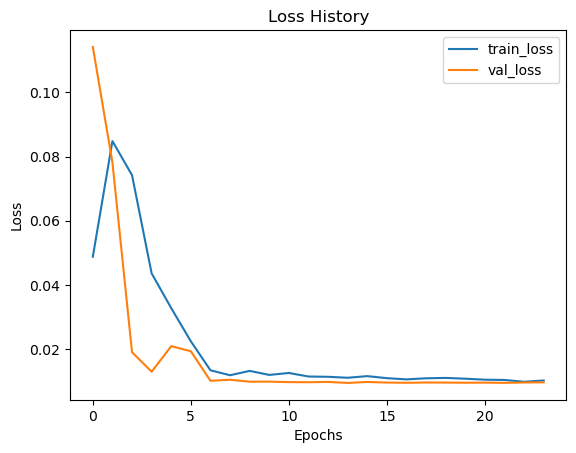

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

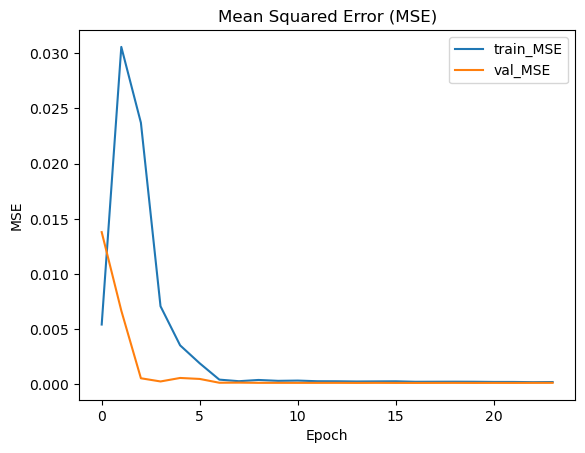

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

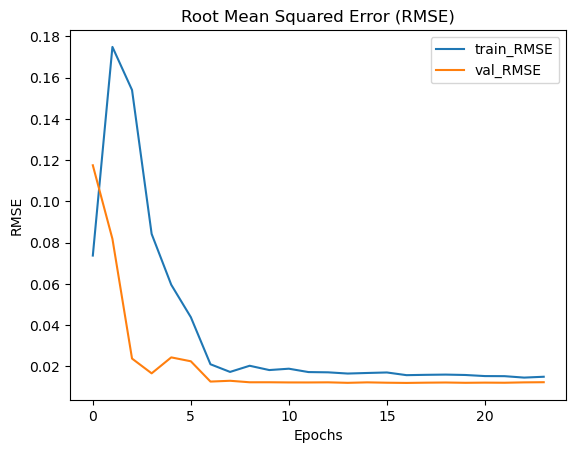

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

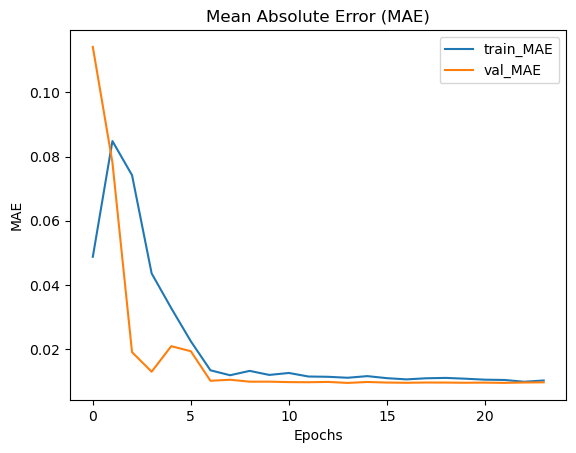

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

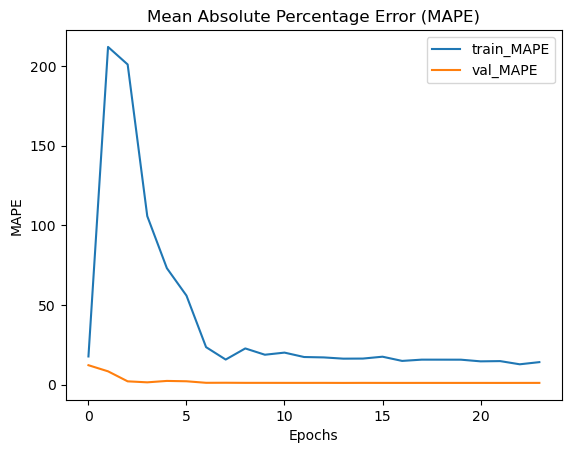

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 01:15:49.528900: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 5)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


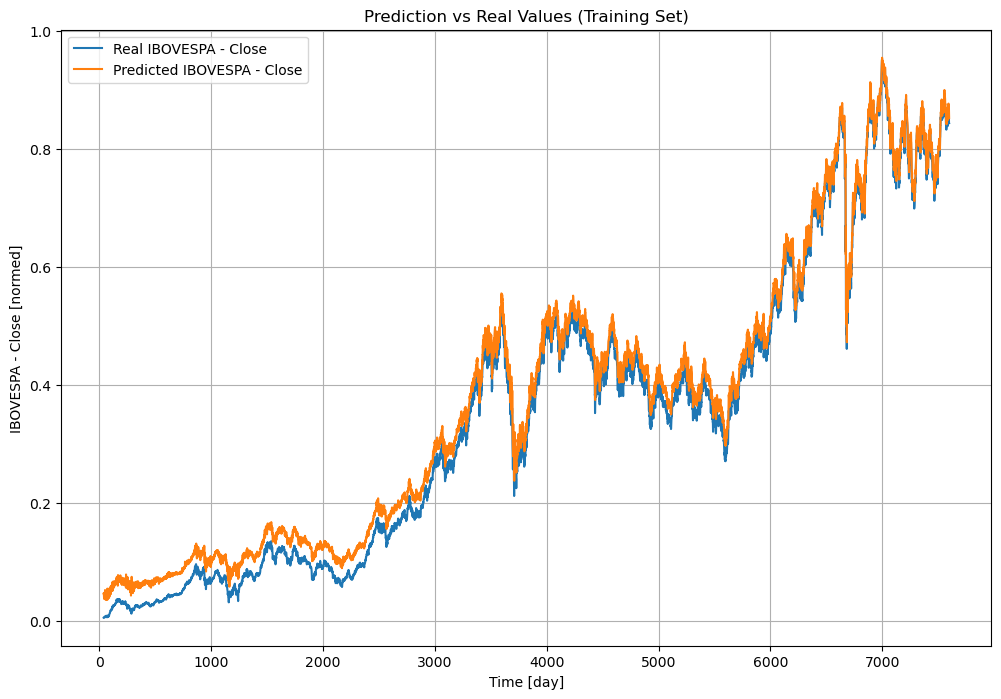

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 5)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


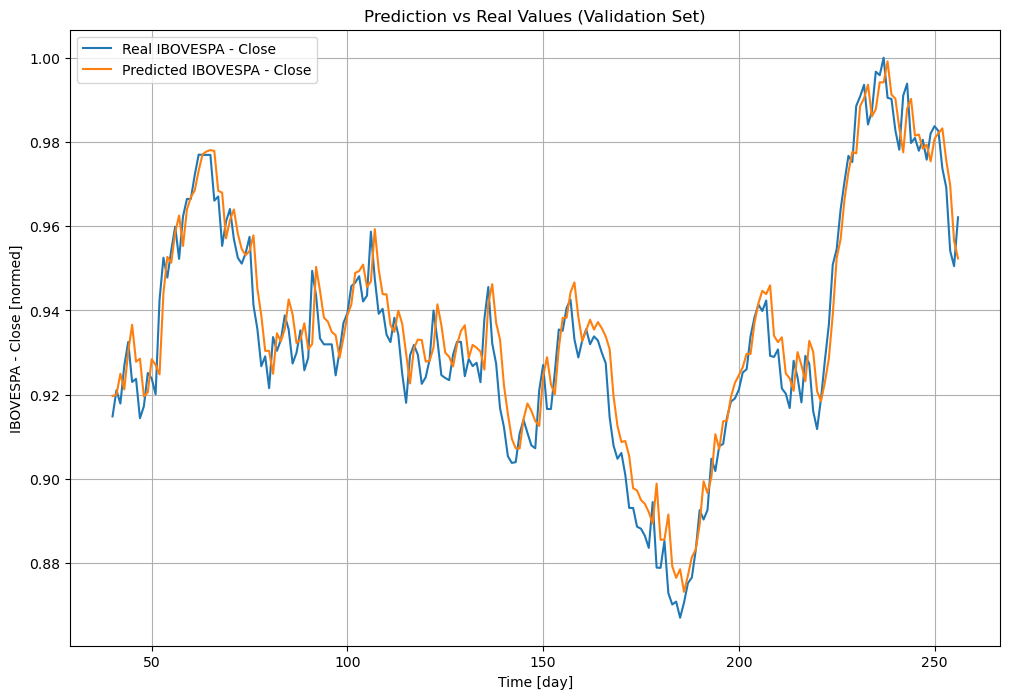

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 5)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


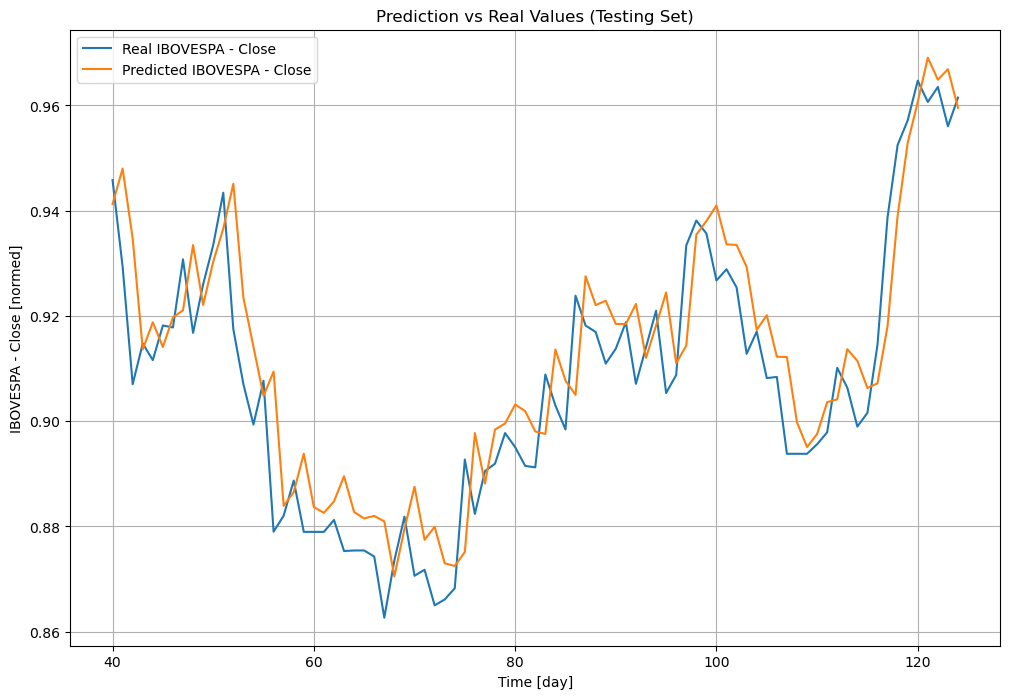

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

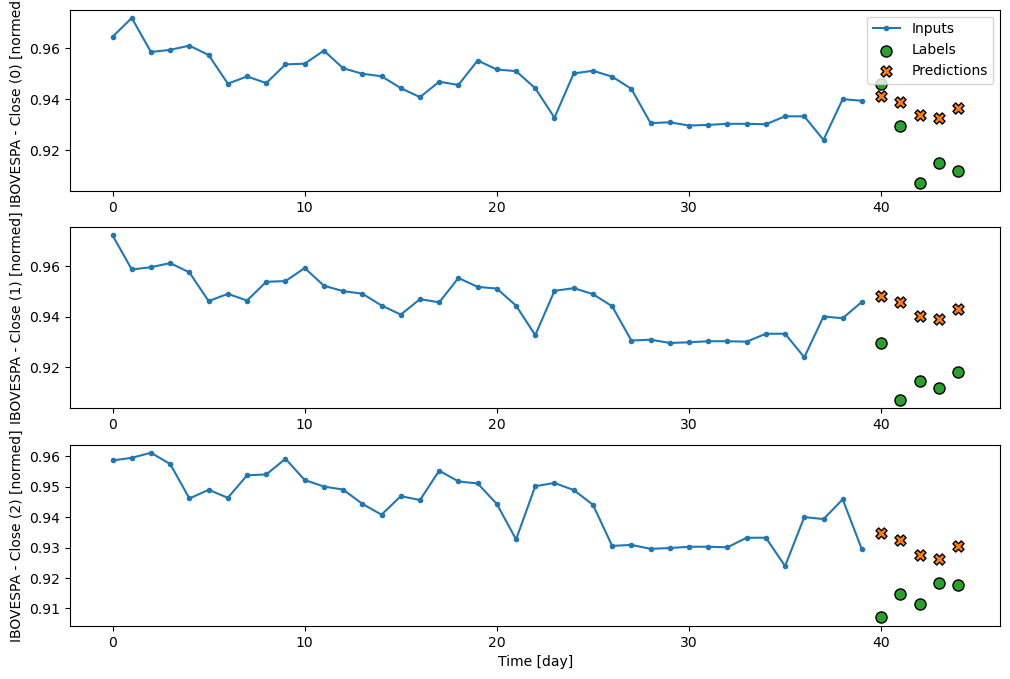

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:50s:776ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[[0.941262  , 0.941262  , 0.941262  , ..., 0.941262  ,
         0.941262  , 0.941262  ],
        [0.93900335, 0.93900335, 0.93900335, ..., 0.93900335,
         0.93900335, 0.93900335],
        [0.93370426, 0.93370426, 0.93370426, ..., 0.93370426,
         0.93370426, 0.93370426],
        [0.9324174 , 0.9324174 , 0.9324174 , ..., 0.9324174 ,
         0.9324174 , 0.9324174 ],
        [0.9366628 , 0.9366628 , 0.9366628 , ..., 0.9366628 ,
         0.9366627 , 0.9366627 ]],

       [[0.9479928 , 0.9479928 , 0.9479928 , ..., 0.9479928 ,
         0.9479928 , 0.9479928 ],
        [0.94561195, 0.94561195, 0.94561195, ..., 0.94561195,
         0.94561195, 0.94561195],
        [0.94021297, 0.94021297, 0.94021297, ..., 0.94021297,
         0.94021297, 0.94021297],
        [0.9389895 , 0.9389895 , 0.9389895 , ..., 0.9389895 ,
         0.9389895 , 0.9389895 ],
        [0.94310737, 0.94310737, 0.94310737, ..., 0.94310737,
         0.94310725, 0.94310725]],

       [[0.9347155 , 0.9347155 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')